In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from scipy import stats
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
import seaborn as sns
import urllib.request, json 

from src.data_collection import *
from src.constants import *

In [2]:
def linear_fit(x, a, b):
    return  a*x+b

def country_dynamics(category, country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
    ax.set_yscale('log')
    cum = data[category].copy().T[[country]]
    focus = (cum - cum.shift(1)).iloc[cut:,:]
    
    ax.plot(cum.iloc[cut:,:], alpha=0.8, lw=2, label=category + ' cases in ' + country )
    ax.scatter(focus.index, focus[country], c='gray', s=5)
    
    for i,(a,b) in enumerate(days):
        slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
        ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
        ax.annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=20, c=('C'+str(i+1)))                    
            
    ax.legend(prop={'size': 20})
    ax.tick_params(labelsize=20)
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    plt.tight_layout()
    return fig, ax

def country_dynamics_all(country, cut, days):
    fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(12,12))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax[i].set_yscale('log')
        cum = data[category].copy().T[[country]]
        focus = (cum - cum.shift(1)).iloc[cut:,:]

        ax[i].plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax[i].scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()
        
def country_dynamics_all_in_one(country, cut, days):
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(12,10))
    fig.subplots_adjust(wspace=0, hspace=0)
    
    for i,category in enumerate(data.keys()):
        ax.set_yscale('log')
        focus = (cum - cum.shift(1)).iloc[cut:,:]

#         ax.plot(cum.iloc[cut:,:], alpha=0.5, lw=2, label=category + ' cases in ' + country )
        ax.scatter(focus.index, focus[country], c='gray', s=5)

        for j,(a,b) in enumerate(days[i]):
            slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus[country].values[a:b]+1))[0]
            ax[i].plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(j+1)))
            ax[i].annotate(np.round(np.exp(slope),2), 
                    xy=((a+b-2)/2, np.exp((a+b)/2*slope + intercept)), fontsize=14, c=('C'+str(j+1)))  

        ax[i].legend(prop={'size': 12})
        ax[i].tick_params(labelrotation=90, labelsize=14)
        # ax.xaxis.set_major_locator(plt.MaxNLocator(15))
        plt.tight_layout()

        
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region')
death = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')
recover = pd.read_csv('data/JH/recover_agg.csv').set_index('Country/Region')
data = {'Confirmed':confirm, 'Death':death, 'Recovered':recover}

# New York vs rest of US

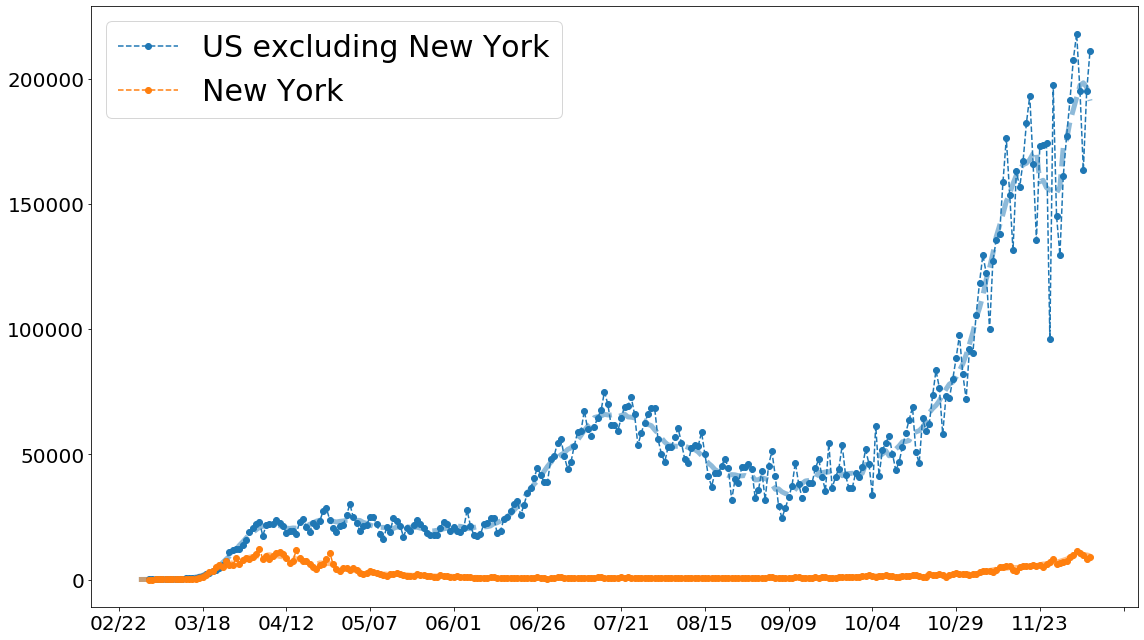

In [3]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
ax.plot(df.sum(axis=1)-df['New York'], 'o--', label='US excluding New York')

window = 7
df['average1'] = (df.sum(axis=1)-df['New York']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average1, color='C0',ls='--', lw=5, alpha=0.5)

ax.plot(df['New York'], 'o--', label='New York')
df['average2'] = (df['New York']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average2, color='C1',ls='--', lw=5, alpha=0.5)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/NY_vs_US.png' , dpi=600)

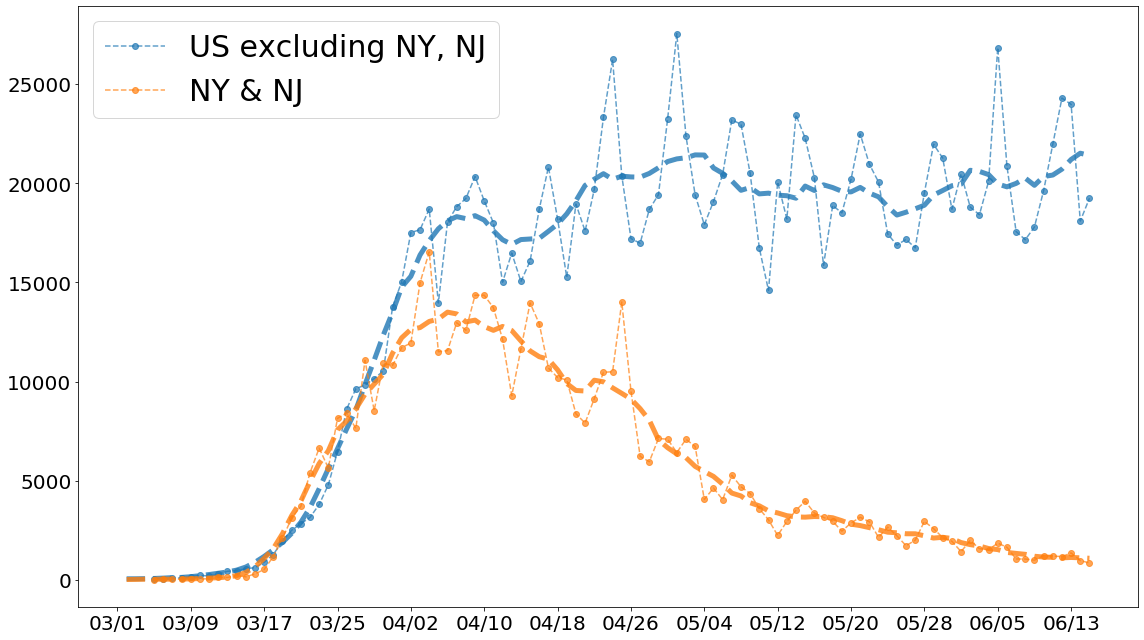

In [7]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
ax.plot(df.sum(axis=1)-df['New York']-df['New Jersey'], 'o--', label='US excluding NY, NJ',  alpha=0.7)

window = 7
df['average1'] = (df.sum(axis=1)-df['New York']-df['New Jersey']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average1, color='C0',ls='--', lw=5, alpha=0.8)

ax.plot(df['New York']+df['New Jersey'], 'o--', label='NY & NJ', alpha=0.7)
df['average2'] = (df['New York']+df['New Jersey']).rolling(window=window, min_periods=1, center=True).mean()
ax.plot(df.index, df.average2, color='C1',ls='--', lw=5, alpha=0.8)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/NYNJ_vs_US.png' , dpi=100)

# US by party

In [929]:
# by 2016 election
dem = 'Hawaii,Vermont,New York,Rhode Island,Maryland,Massachusetts,California,Delaware,Illinois,Connecticut,New Jersey,Maine,Oregon,Washington,Michigan,New Mexico,Minnesota,Nevada,Wisconsin,Colorado,Iowa,New Hampshire,Pennsylvania'.split(',')
rep = 'Ohio,Florida,North Carolina,Indiana,Missouri,Georgia,Arizona,Montana,South Carolina,Mississippi,North Dakota,South Dakota,Texas,Alaska,Kansas,Louisiana,Nebraska,Tennessee,Kentucky,West Virginia,Alabama,Arkansas,Idaho,Oklahoma,Utah,Wyoming'.split(',')

In [931]:
# by current governor
dem = 'Hawaii,New York,Rhode Island,California,Delaware,Connecticut,Oregon,Washington,Minnesota,Colorado,Pennsylvania,Virginia,Montana,Louisiana,West Virginia,North Carolina'.split(',')
rep = 'Vermont,New Hampshire,Missouri,Maryland,Massachusetts,Illinois,New Jersey,Maine,Michigan,New Mexico,Nevada,Wisconsin,Iowa,Ohio,Florida,Indiana,Georgia,Arizona,South Carolina,Mississippi,North Dakota,South Dakota,Texas,Kansas,Nebraska,Tennessee,Kentucky,Alabama,Arkansas,Idaho,Oklahoma,Utah,Wyoming'.split(',')

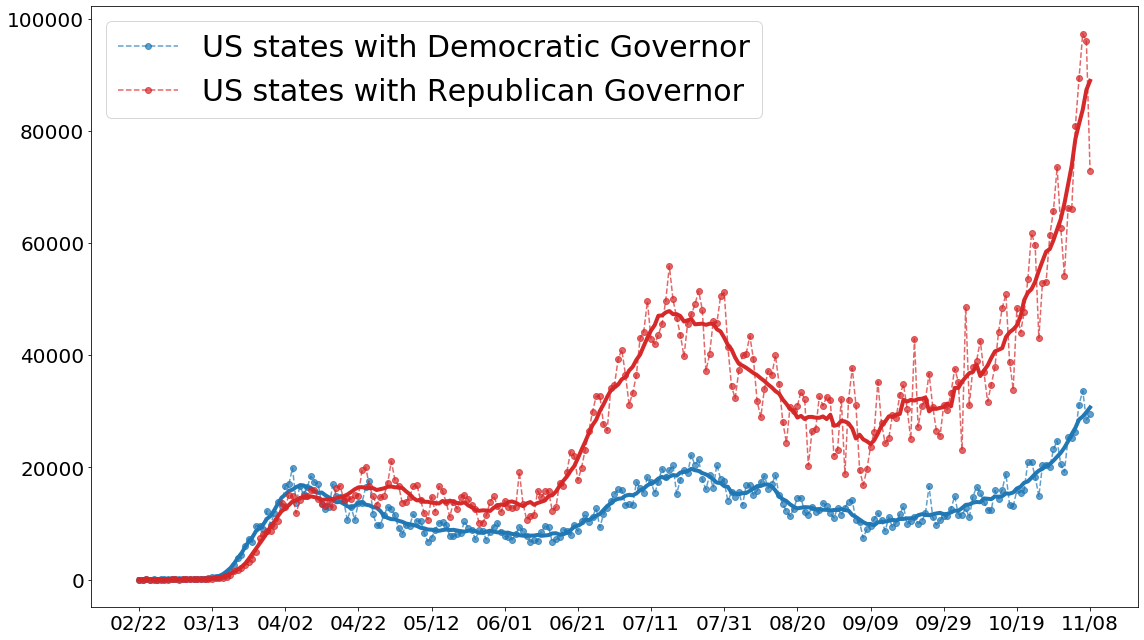

In [932]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
    
ax.plot(df[dem].sum(axis=1), 'o--', label='US states with Democratic Governor',  alpha=0.7)
ax.plot(df[dem].sum(axis=1).rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C0', alpha=3)

ax.plot(df[rep].sum(axis=1), 'o--', label='US states with Republican Governor',  alpha=0.7, c='C3')
ax.plot(df[rep].sum(axis=1).rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C3', alpha=3)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/Dem_Rep.png' , dpi=600)

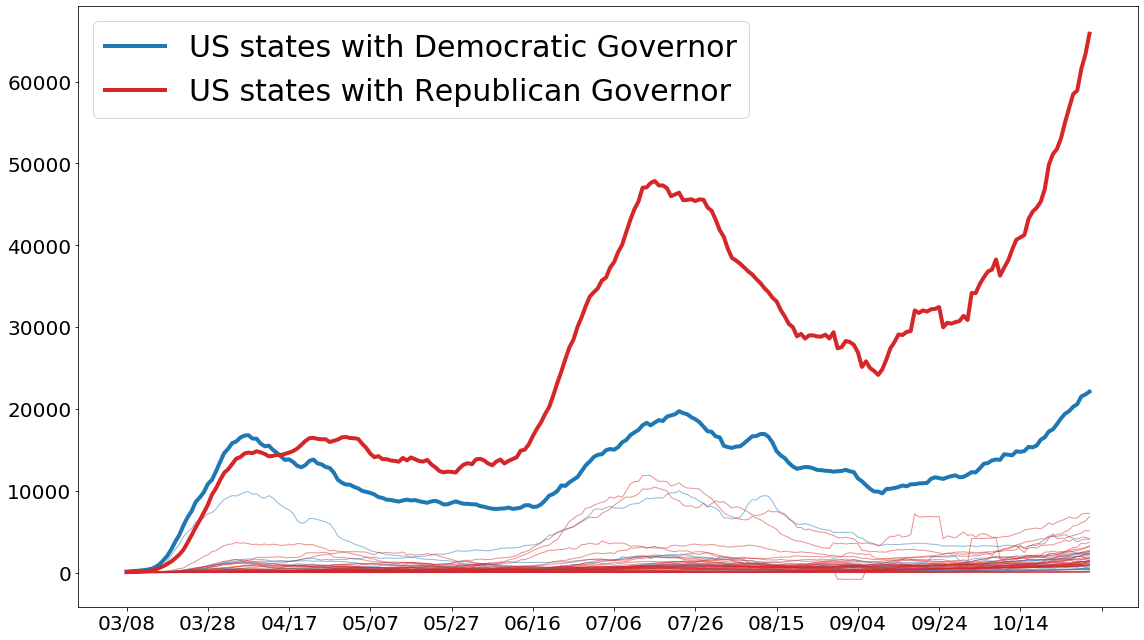

In [784]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date').iloc[15:]
df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
for i in list(df):
    df[i] = df[i] - df[i].shift(1)
    
ax.plot(df[dem].sum(axis=1).rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C0',label='US states with Democratic Governor')
for i in dem:
    ax.plot(df[i].rolling(window=7, min_periods=1, center=True).mean(), lw=1,c='C0', alpha=0.5)


ax.plot(df[rep].sum(axis=1).rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C3',label='US states with Republican Governor')
for i in rep:
    ax.plot(df[i].rolling(window=7, min_periods=1, center=True).mean(), lw=1,c='C3', alpha=0.5)

# ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)
# ax.set_yscale('log')

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/NYNJ_vs_US.png' , dpi=600)

# States dymamics

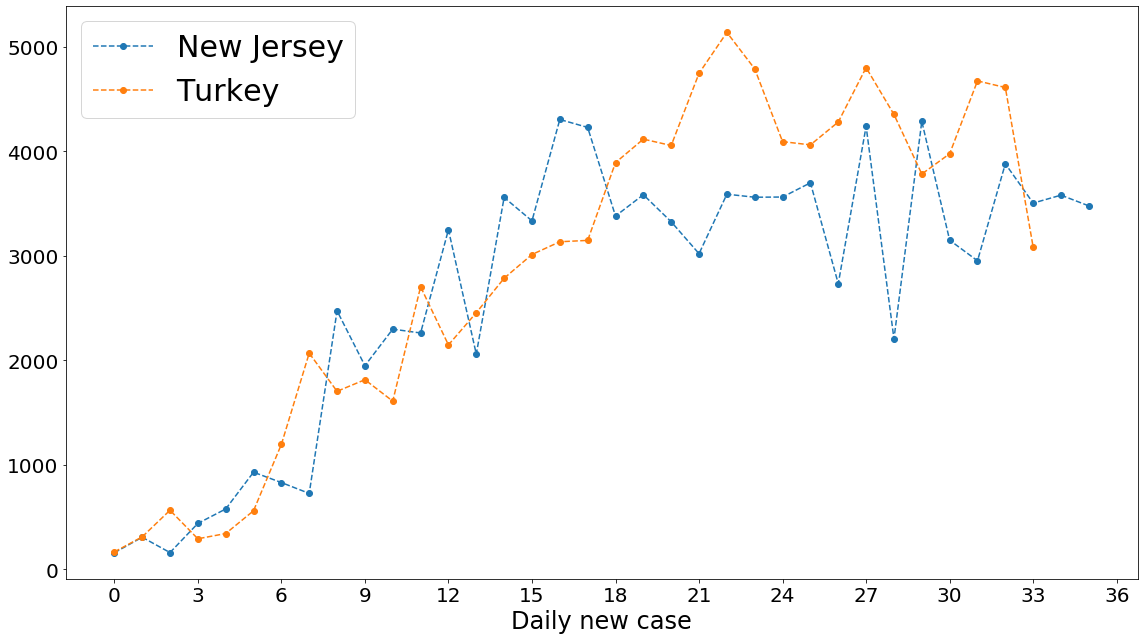

In [517]:
state = 'New Jersey'
country = 'Turkey'
threshold = 100
window = 7

df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
s1 = df[state]

df = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
s2  = df[country]

s1 = s1 - s1.shift(1)
s2 = s2 - s2.shift(1)

s1 = s1.fillna(0).astype(int).values
s2 = s2.fillna(0).astype(int).values
s1 = s1[s1>threshold]
s2 = s2[s2>threshold]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(s1, 'o--', label=state)
ax.plot(s2, 'o--', label=country)
# ax.set_yscale('log')

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)
ax.set_xlabel('Days after more cumulates more than 100 cases', fontsize=24)
ax.set_xlabel('Daily new case', fontsize=24)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
plt.savefig('figures/Daily_misc_4_23.png', dpi=600)

# Country comparisons

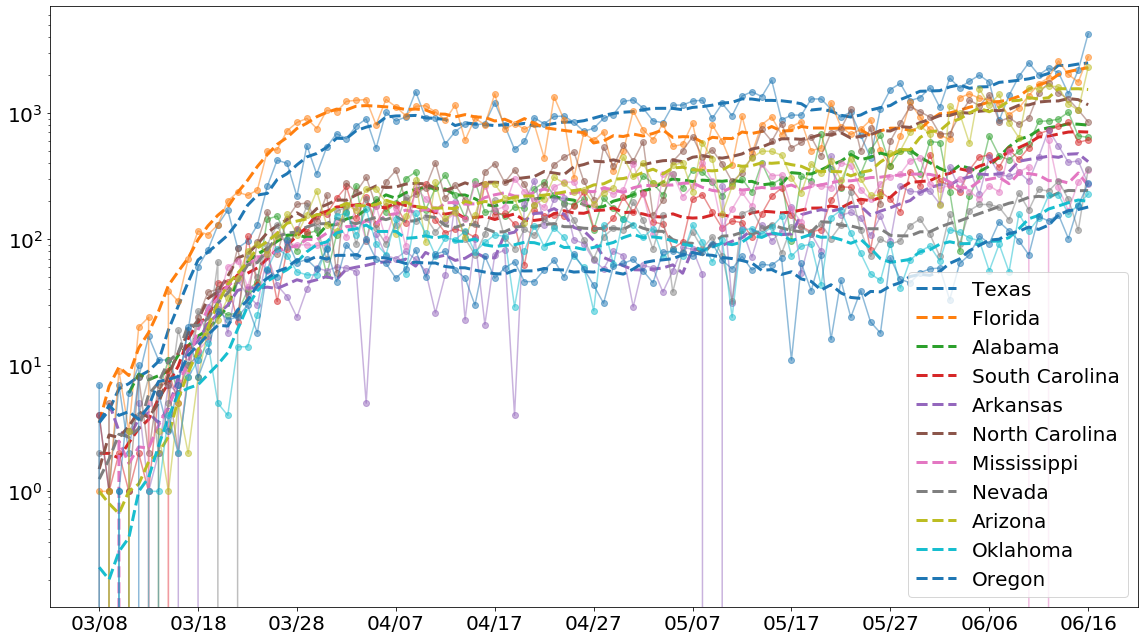

In [56]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
for i in list(df):
    df[i] = df[i] - df[i].shift(1)

focus = df[[
    'Texas',
    'Florida',
    'Alabama',
    'South Carolina',
    'Arkansas',
    'North Carolina',
    'Mississippi',
    'Nevada',
    'Arizona',
    'Oklahoma',
#     'New Mexico',
    'Oregon'
]].copy().iloc[15:]
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

# focus.at['04/24','Ecuador'] = np.nan
# focus.at['04/30','Peru'] = 3045
# focus.at['04/30','Brazil'] = 6019
# focus.at['04/30','Chile'] = 1138
# focus.at['04/30','Mexico'] = 1047

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for j, i in enumerate(list(focus)):
    ax.plot(focus[i], 'o-',c='C'+str(j), alpha=0.5)
    ax.plot(focus[i].rolling(window=7, min_periods=1, center=True).mean(), lw=3, ls='--', label=i)
    

ax.set_yscale('log')
ax.tick_params(labelsize=20)
ax.legend(loc=0, fontsize=20)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
plt.savefig('figures/States_comparison_6_17a.png', dpi=600)

In [5]:
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]
state_names

['Alaska',
 'Alabama',
 'Arkansas',
 'American Samoa',
 'Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'District ',
 'of Columbia',
 'Delaware',
 'Florida',
 'Georgia',
 'Guam',
 'Hawaii',
 'Iowa',
 'Idaho',
 'Illinois',
 'Indiana',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Massachusetts',
 'Maryland',
 'Maine',
 'Michigan',
 'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
 'North Dakota',
 'Nebraska',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'Nevada',
 'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Puerto Rico',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Virgin Islands',
 'Vermont',
 'Washington',
 'Wisconsin',
 'West Virginia',
 'Wyoming']

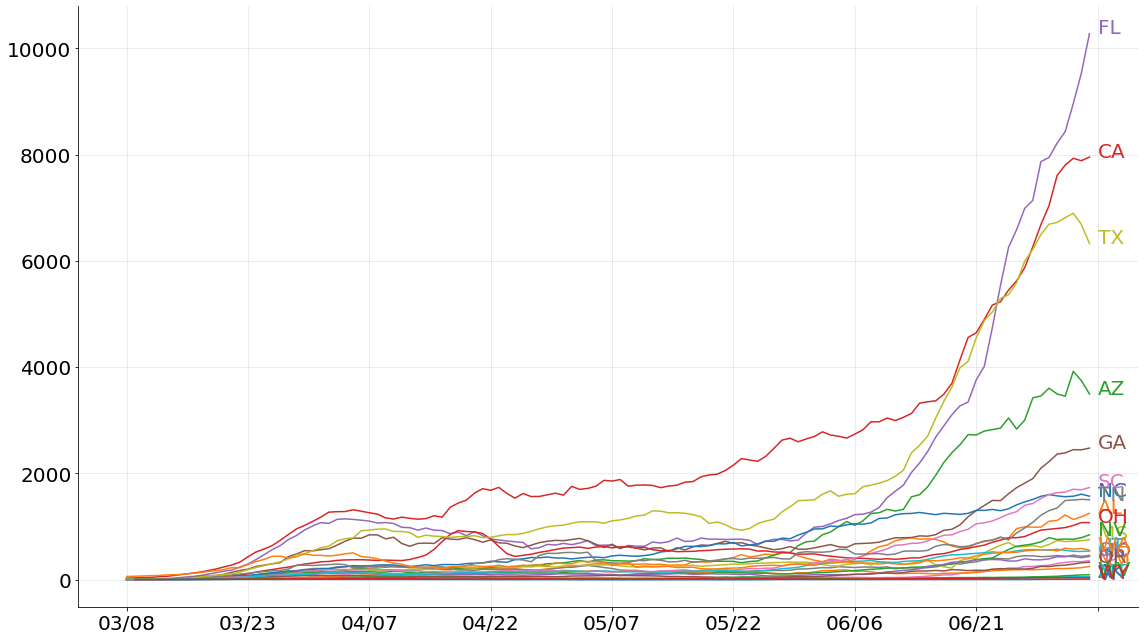

In [53]:
df = pd.read_csv('data/Country detailed/US by state.csv').set_index('date')
for i in list(df):
    df[i] = df[i] - df[i].shift(1)

focus = df[[
'Alaska',
 'Alabama',
#  'Arkansas',
 'Arizona',
 'California',
#  'Colorado',
#  'Connecticut',
#  'District of Columbia',
#  'Delaware',
 'Florida',
 'Georgia',
#  'Guam',
#  'Hawaii',
#  'Iowa',
 'Idaho',
#  'Illinois',
#  'Indiana',
#  'Kansas',
#  'Kentucky',
#  'Louisiana',
#  'Massachusetts',
#  'Maryland',
#  'Maine',
#  'Michigan',
#  'Minnesota',
 'Missouri',
 'Mississippi',
 'Montana',
 'North Carolina',
#  'North Dakota',
#  'Nebraska',
#  'New Hampshire',
#  'New Jersey',
 'New Mexico',
 'Nevada',
#  'New York',
 'Ohio',
 'Oklahoma',
 'Oregon',
#  'Pennsylvania',
#  'Puerto Rico',
#  'Rhode Island',
 'South Carolina',
#  'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
#  'Virginia',
 'Virgin Islands',
#  'Vermont',
 'Washington',
#  'Wisconsin',
 'West Virginia',
 'Wyoming'    
]].copy().iloc[15:]
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

# focus.at['04/24','Ecuador'] = np.nan
# focus.at['04/30','Peru'] = 3045
# focus.at['04/30','Brazil'] = 6019
# focus.at['04/30','Chile'] = 1138
# focus.at['04/30','Mexico'] = 1047

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for j, i in enumerate(list(focus)):
#     ax.plot(focus[i], 'o-',c='C'+str(j), alpha=0.5)
    ax.plot(focus[i].rolling(window=7, min_periods=1, center=True).mean(), label=i)
    ax.annotate(us_state_abbrev[i], 
                xy=(len(focus), focus[i].rolling(window=7, min_periods=1, center=True).mean().values[-1]), 
                fontsize=20, c='C'+str(j))

# ax.set_yscale('log')
# ax.set_ylim(bottom=50)
ax.tick_params(labelsize=20)
# ax.legend(loc=0, fontsize=20)
ax.grid(alpha=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
ax.grid(alpha=0.3)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# plt.savefig('figures/States_comparison_7_3.png', dpi=100)

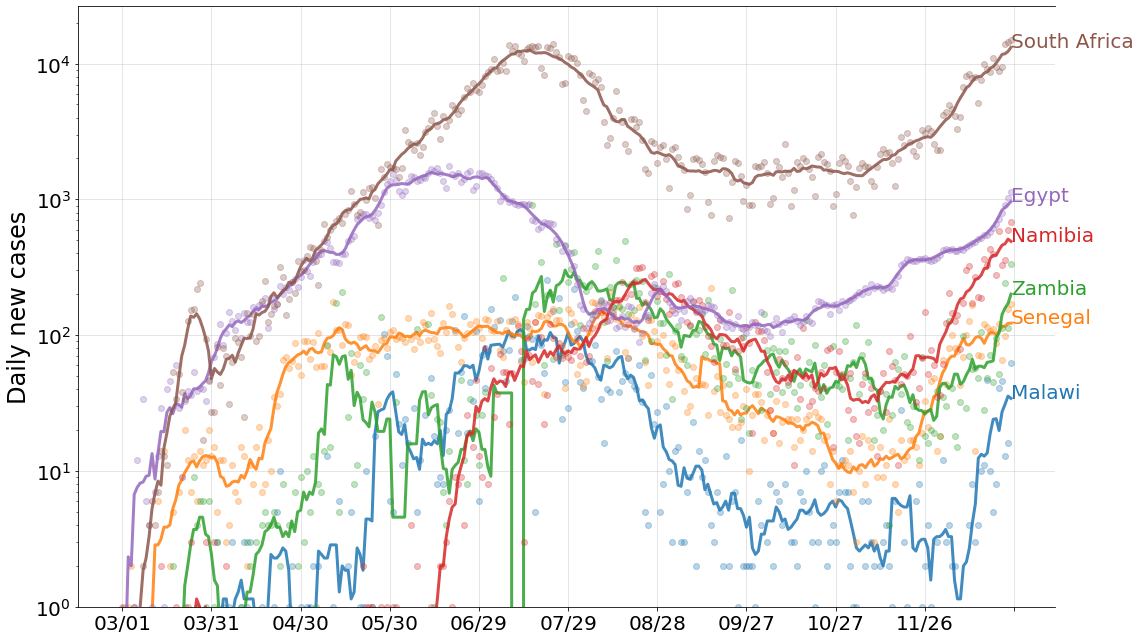

In [139]:
df = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T.diff()

df = df.iloc[-300:]
focus = df[
    [
        'Malawi',
        'Senegal',
        'Zambia',
        'Namibia',
        'Egypt',
        'South Africa',

    ]
].copy()
focus['time'] = pd.to_datetime(focus.index)
focus.index = focus.time.dt.strftime('%m/%d')
focus.drop('time',axis=1,inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for j, i in enumerate(list(focus)):
    ax.plot(focus[i], 'o',alpha=0.3, c='C'+str(j))
    ax.plot(focus[i].rolling(window=7, min_periods=1, center=True).mean(), lw=3, ls='-', label=i, alpha=0.85, c='C'+str(j))
    ax.annotate(i, xy=(focus.index[-1], focus[i].rolling(window=7, min_periods=1, center=True).mean().values[-1]), fontsize=20, c='C'+str(j))
    
ax.set_yscale('log')
ax.set_ylim(bottom=1)
ax.tick_params(labelsize=20)
# ax.legend(loc=0, fontsize=24)
ax.grid(alpha=0.4)
ax.set_ylabel('Daily new cases', fontsize=24)
ax.set_ylim()
ax.spines['right'].set_visible(False)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
# plt.savefig('figures/Daily_misc_12_26a.png', dpi=100)

# US state trailing tally

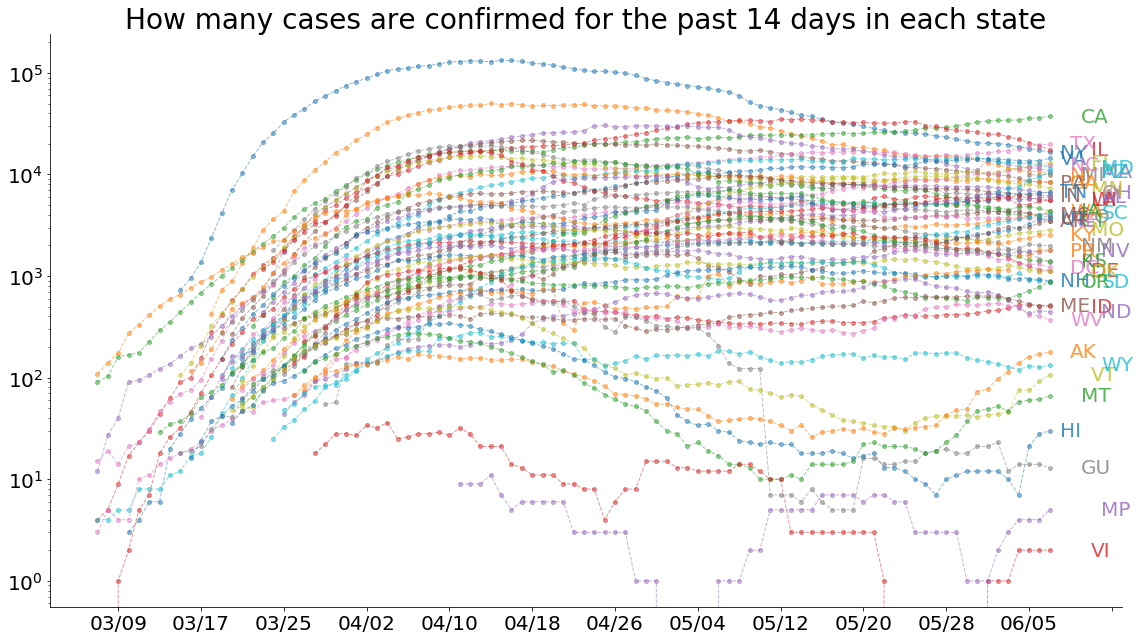

In [682]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df = df.pivot(index='date',columns='state',values='cases').iloc[32:]
df = df[df.iloc[-1].sort_values(ascending=False).index]
df.index.rename('US', inplace=True)

df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for i,state in enumerate(df):
    ax.plot(df[state] - df[state].shift(14), 'o--', c='C'+str(i), lw=1, markersize=4, alpha=0.5)
    ax.annotate(us_state_abbrev[state], xy=(len(df)+i%5,(df[state] - df[state].shift(14))[-1]), 
                va='center',color='C'+str(i), size=20, alpha=0.8)
    
ax.tick_params(labelsize=20)
# ax.legend(loc=0, fontsize=30)
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.format_xdata = mdates.DateFormatter('%m-%d')
ax.set_xlim(right=len(df)+6)
ax.set_yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('How many cases are confirmed for the past 14 days in each state', fontsize=28)
plt.tight_layout()

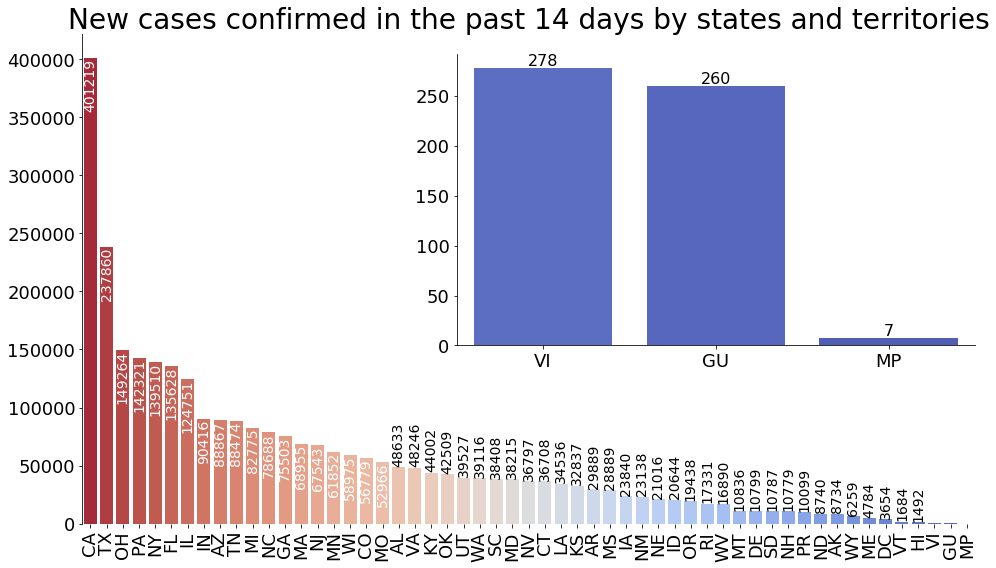

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')
df = df.pivot(index='date',columns='state',values='cases').iloc[32:]
df = df[df.iloc[-1].sort_values(ascending=False).index]
df.index.rename('US', inplace=True)

focus = (df.iloc[-1] - df.iloc[-15]).sort_values(ascending=False)
focus.index = [us_state_abbrev[i] for i in focus.index]

fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))
sns.barplot(x=focus.index, y=focus.values, palette=sns.color_palette("coolwarm_r", len(focus)))


ax2 = plt.axes([0.45, 0.4, 0.45, 0.45])
cutoff = (focus < 1000).sum()

sns.barplot(x=focus.index[-cutoff:], y=focus.values[-cutoff:], palette=sns.color_palette("coolwarm_r", len(focus))[-cutoff:], ax=ax2)


for i,v in enumerate(focus.values[:-cutoff]):
    if v > 50000:
        ax.annotate(int(v), xy=(i,v), ha='center', va='top',fontsize=14,rotation=90,c='w')
#     elif v> 20000:
#         ax.annotate(int(v), xy=(i,v), ha='center', va='top',fontsize=14,rotation=90)
    else:
        ax.annotate(int(v), xy=(i,v+1000), ha='center', va='bottom',fontsize=14,rotation=90)
    
for i,v in enumerate(focus.values[-cutoff:]):
    ax2.annotate(int(v), xy=(i,v+cutoff), ha='center',fontsize=16)

        
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.tick_params(labelsize=18)
ax.tick_params(axis='x',rotation=90)
ax2.tick_params(labelsize=18)

ax.set_title('New cases confirmed in the past 14 days by states and territories', fontsize=28)
plt.savefig('figures/Daily_misc_12_16a.png',dpi=100)

# Fall plot main street

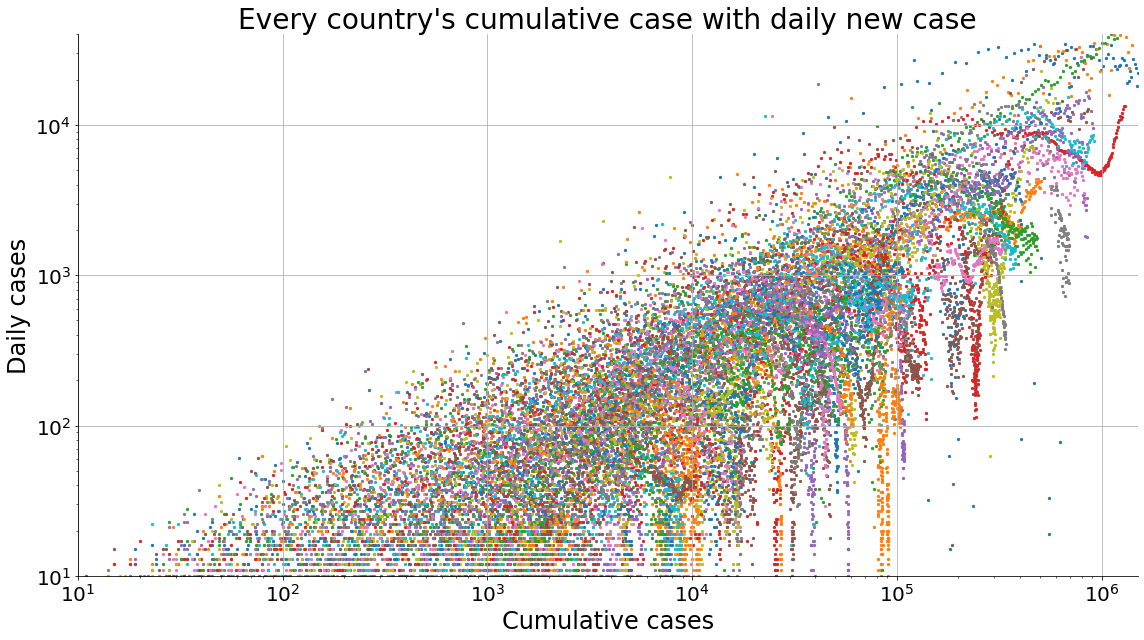

In [310]:
df = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T

df['time'] = pd.to_datetime(df.index)
df.index = df.time.dt.strftime('%m/%d')
df.drop('time', axis=1, inplace=True)
df = df[df.sum().sort_values(ascending=False).index]


fig, ax=plt.subplots(nrows=1, ncols=1, figsize=(16,9))

for country in list(df):
    focus = df[[country]].copy()
    focus['new'] = focus[country].diff()

    ax.scatter(focus[country], focus['new'],s=5)

ax.set_ylim(bottom=10,top=40000)
ax.set_xlim(left=10, right=1500000)
ax.set_xscale('log')
ax.set_yscale('log')

ax.tick_params(labelsize=20)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Every country\'s cumulative case with daily new case', fontsize=28)
ax.set_xlabel('Cumulative cases', fontsize=24)
ax.set_ylabel('Daily cases', fontsize=24)
ax.grid()
plt.tight_layout()

# US partisan growth

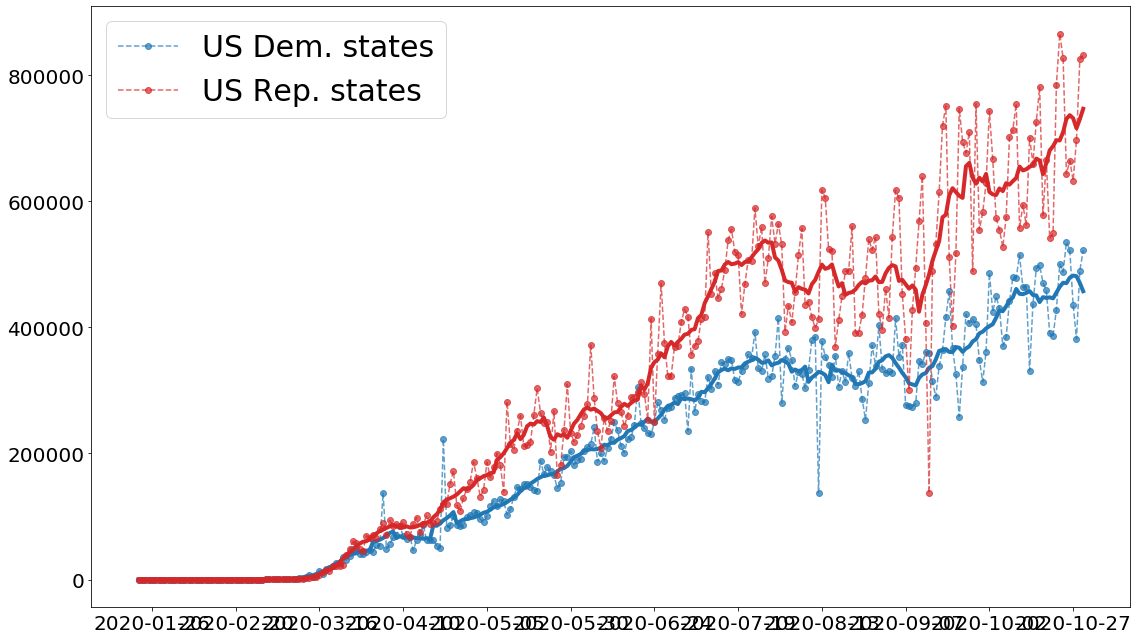

In [742]:
import urllib.request, json 

with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')
df.iloc[0]['date']

# by current governor
dem = 'Hawaii,New York,Rhode Island,California,Delaware,Connecticut,Oregon,Washington,Minnesota,Colorado,Pennsylvania,Virginia,Montana,Louisiana,West Virginia,North Carolina'.split(',')
rep = 'Vermont,New Hampshire,Missouri,Maryland,Massachusetts,Illinois,New Jersey,Maine,Michigan,New Mexico,Nevada,Wisconsin,Iowa,Ohio,Florida,Indiana,Georgia,Arizona,South Carolina,Mississippi,North Dakota,South Dakota,Texas,Kansas,Nebraska,Tennessee,Kentucky,Alabama,Arkansas,Idaho,Oklahoma,Utah,Wyoming'.split(',')

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

dem_abb = [us_state_abbrev[i] for i in dem]
rep_abb = [us_state_abbrev[i] for i in rep]

dem_test = df.set_index('state').loc[dem_abb].groupby('date').sum()['totalTestResultsIncrease']
rep_test = df.set_index('state').loc[rep_abb].groupby('date').sum()['totalTestResultsIncrease']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

ax.plot(dem_test, 'o--', label='US Dem. states',  alpha=0.7)
ax.plot(dem_test.rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C0', alpha=3)

ax.plot(rep_test, 'o--', label='US Rep. states',  alpha=0.7, c='C3')
ax.plot(rep_test.rolling(window=7, min_periods=1, center=True).mean(), lw=4, c='C3', alpha=3)

ax.tick_params(labelsize=20)
ax.legend(loc="upper left", fontsize=30)

plt.tight_layout()
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
# plt.savefig('figures/NYNJ_vs_US.png' , dpi=600)

# Declining phase

In [374]:
from scipy import optimize

def linear_fit(x, a, b):
    return  a*x+b

confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
confirm['time'] = pd.to_datetime(confirm.index)
confirm.index = confirm.time.dt.strftime('%m/%d')

Global cases (total) by country fetched for 11-21


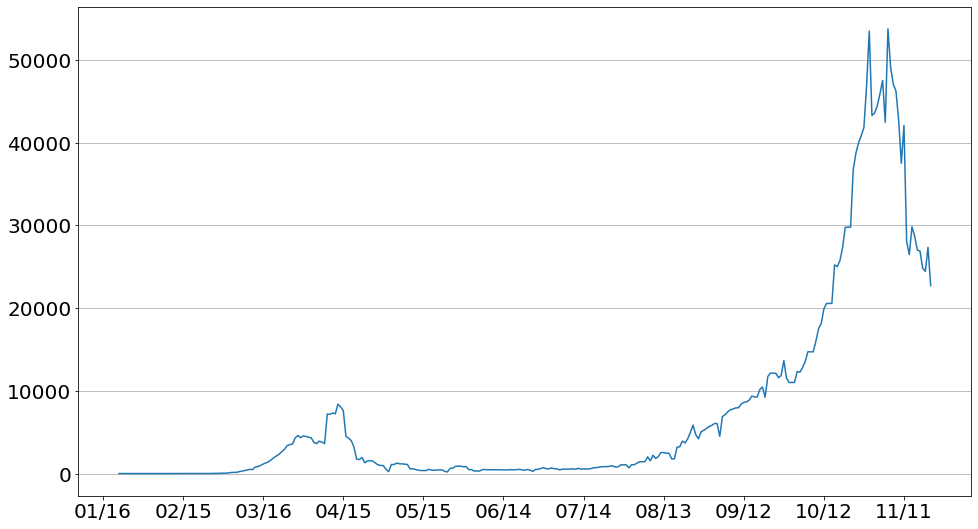

In [402]:
focus = get_global_cases_total()['France'].diff().fillna(0).astype(int)
focus = focus.rolling(window=7, min_periods=1, center=True).mean()
country = 'France'

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
ax.plot(focus)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.grid(axis='y')

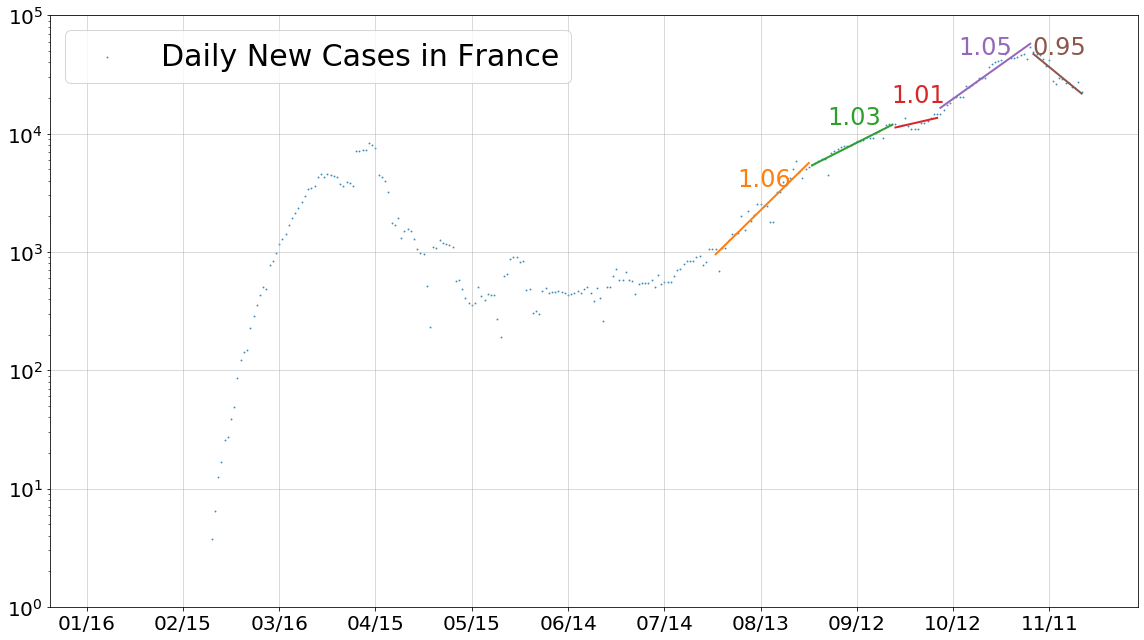

In [400]:
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
ax.set_yscale('log')
ax.set_ylim(top=100000, bottom=1)

ax.scatter(focus.index, focus.values, label='Daily New Cases in %s'%country, c='C0', s=1, alpha=0.7)
# ax.plot(focus)

days = [(190,220),(220,246),(246,260),(260,289),(289,305)]
for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(focus.index[a:b], np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)), lw=2)
    ax.annotate(np.round(np.exp(slope),2), 
                xy=(focus.index[(a+b)//2], np.exp((a+b)/2*slope + intercept + 0.3)), va='bottom', ha='center', fontsize=24, c=('C'+str(i+1)))                    

# ax.annotate(int(focus[0]), xy=(0, int(focus[0]* 0.7)), va='top', ha='center', fontsize=22)
# ax.annotate(int(focus[-1]), xy=(len(focus)-1, int(focus[-1]* 0.7)), va='top', ha='center', fontsize=22)

ax.legend(prop={'size': 30})
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

ax.grid(alpha=0.6)
plt.tight_layout()

# plt.savefig(r'figures/for paper/decline trend/%s.png'%country, dpi=100)

In [325]:
country = 'Italy'
focus = confirm[country].rolling(window=7, min_periods=1, center=True).mean().clip(lower=1).diff()

offset = 64
focus = focus.iloc[offset:]

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
ax.set_yscale('log')

ax.scatter(focus.index, focus.values, label='Daily New Cases in %s\n7-day average'%country, c='gray', alpha=0.7)

days = [(0,33),(33,60),(60,64)]
for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)), lw=2)
    ax.annotate(np.round(np.exp(slope),2), 
                xy=((a+b)/2, np.exp((a+b)/2*slope + intercept + 0.3)), va='bottom', ha='center', fontsize=24, c=('C'+str(i+1)))                    

ax.annotate(int(focus[0]), xy=(0, int(focus[0]* 0.7)), va='top', ha='center', fontsize=22)
ax.annotate(int(focus[-1]), xy=(len(focus)-1, int(focus[-1]* 0.7)), va='top', ha='center', fontsize=22)

ax.legend(prop={'size': 30})
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.format_xdata = mdates.DateFormatter('%m-%d')
ax.grid(alpha=0.6)
plt.tight_layout()

# plt.savefig(r'figures/for paper/decline trend/%s.png'%country, dpi=100)

ValueError: Cannot convert -80000 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

ValueError: Cannot convert -80000 to a date.  This often happens if non-datetime values are passed to an axis that expects datetime objects.

<Figure size 1152x648 with 1 Axes>

# US states comparing to two weeks ago

In [772]:
df.iloc[-8] - df.iloc[-15]

state
Texas                       39600
California                  28224
Florida                     23343
New York                    10672
Illinois                    28915
Georgia                     11440
North Carolina              13502
Tennessee                   17508
Arizona                      6402
New Jersey                   7626
Wisconsin                   24827
Ohio                        14957
Pennsylvania                11474
Michigan                    12984
Alabama                     10542
Missouri                    13103
Louisiana                    4877
Virginia                     7160
Indiana                     14230
South Carolina               6296
Massachusetts                5939
Minnesota                   10467
Maryland                     4363
Iowa                         7850
Oklahoma                     8548
Mississippi                  4621
Utah                         9608
Washington                   4656
Arkansas                     6596
Kentucky

US cases by state fetched for 2020-12-15


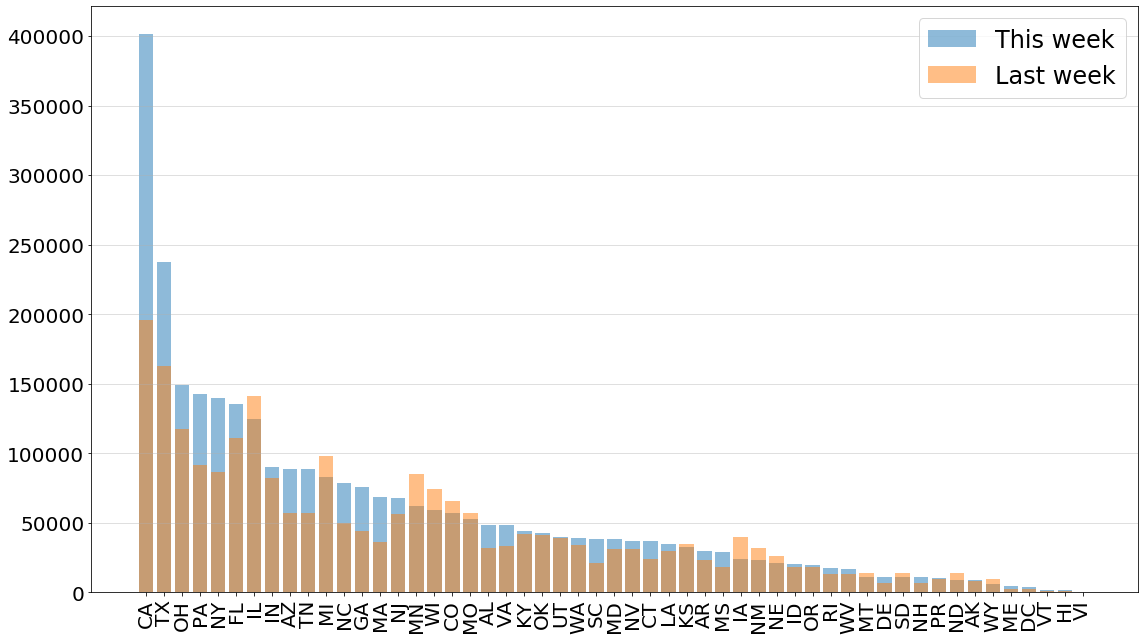

In [17]:
df = np.cumsum(get_US())
period = 14
t1 = df.iloc[-1] - df.iloc[-1-period]
t2 = df.iloc[-1-period] - df.iloc[-1-period*2]

t2 = t2[t1.sort_values(ascending=False).index][:-2]
t1 = t1[t1.sort_values(ascending=False).index][:-2]

fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(t1.index, t1.values, alpha=0.5, label='This week', )
ax.bar(t2.index, t2.values, alpha=0.5, label='Last week')

ax.tick_params(labelsize=20)
ax.tick_params(axis='x', labelrotation=90)
ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')

ax.set_xticklabels([us_state_abbrev[i] for i in t1.index])
fig.tight_layout()
# plt.savefig('figures/Daily_misc_11_23.png', dpi=100)

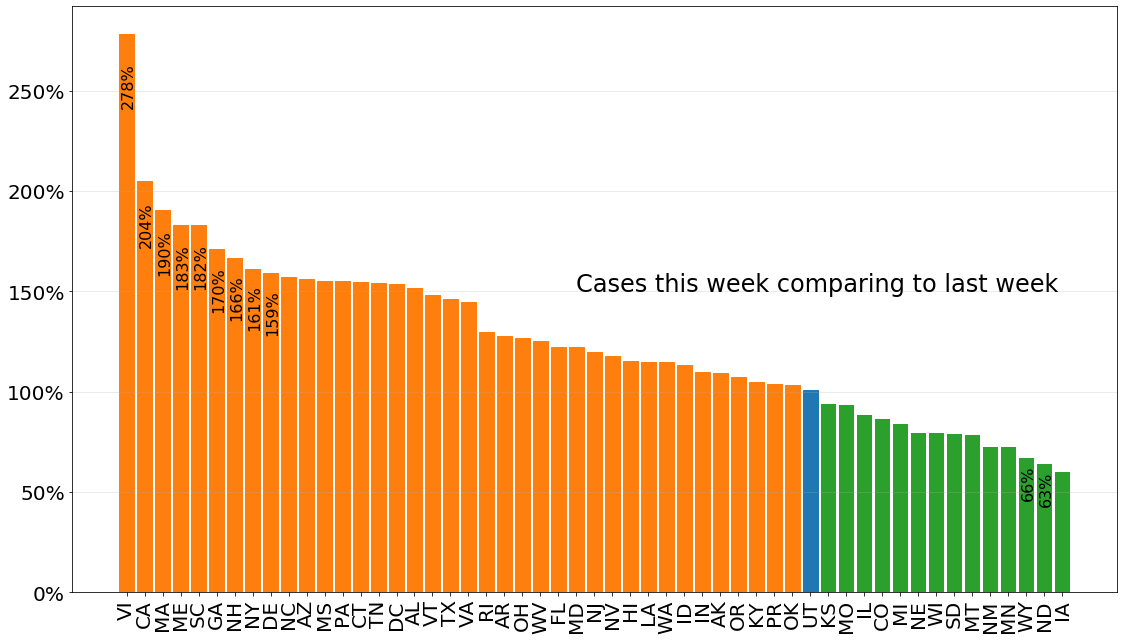

In [18]:
t = (t1/t2).sort_values(ascending=False) * 100
fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(t.index, t.values, color='C2')
sep1 = t.index.get_loc(t[t<103].index[0])
sep2 = t.index.get_loc(t[t<97].index[0])

for i in range(sep1):
    bars[i].set_color('C1')
for i in range(sep1, sep2):
    bars[i].set_color('C0')
    
for i in [0,1,2,3,4,5,6,7,8,50,51]:
    ax.annotate(str(int(t.values[i])) + '%', xy=(i+0.1,t.values[i]*0.95), ha='center',va='top', fontsize=16, rotation=90)

ax.tick_params(labelsize=20)
ax.tick_params(axis='x', labelrotation=90)
# ax.legend(fontsize=24)
ax.text(x=25,y=150, s='Cases this week comparing to last week', fontsize=24)
ax.grid(alpha=0.3, axis='y')

ax.set_xticklabels([us_state_abbrev[i] for i in t.index])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.tight_layout()
# plt.savefig('figures/Daily_misc_10_11a.png', dpi=100)

# Continental lineplot

Global cases (total) by country fetched for 12-25


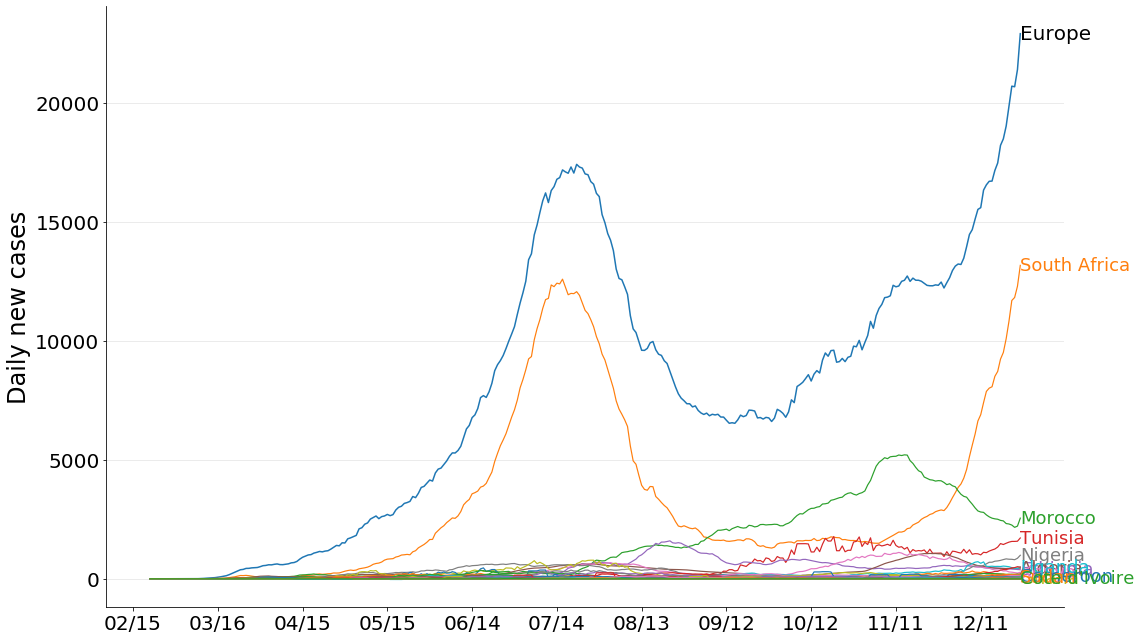

In [140]:
confirm = get_global_cases_total()
df = confirm[set(africa) -set(['Puerto Rico', 'French Guiana','Western Sahara'])]
# df = confirm[set(europe) - set(['Kazakhstan','Turkey',])]
# df = confirm[set(middle_east)-set(['Israel'])]
# df = confirm[america]

df = df.T.sort_values(df.index[-1], ascending=False).T.diff()[30:]
df = df[df.sum().sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(df.sum(axis=1).rolling(window=7, min_periods=1, center=True).mean(), label='Daiy cases in Africa')
# ax.scatter(df.index, df.sum(axis=1), alpha=0.3)
ax.annotate('Europe', xy=(df.index[-1],df.sum(axis=1).rolling(window=7, min_periods=1, center=True).mean().values[-1]), ha='left', va='center', fontsize=20)

for j, i in enumerate(df.columns):
    ax.plot(df[i].rolling(window=7, min_periods=1, center=True).mean(), lw=1.2)
    if j < 12:
        ax.annotate(i, xy=(df.index[-1],df[i].rolling(window=7, min_periods=1, center=True).mean().values[-1]),
                    ha='left',va='center', fontsize=18, c='C'+str(j+1))

# ax.legend(fontsize=24)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.grid(axis='y', alpha=0.3)
ax.set_ylabel('Daily new cases', fontsize=24)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.set_yscale('log')
# ax.set_ylim(top=2000)
plt.tight_layout()

# plt.savefig('figures/Daily_misc_12_26.png', dpi=100)

# Continental increase/decrease by month

In [986]:
confirm = get_global_cases_total()
# df = confirm[africa].drop(['Lesotho','Sudan','Niger'], axis=1)
# df = confirm[europe].drop(['Armenia','Azerbaijan','Kazakhstan','Turkey','Liechtenstein'], axis=1)
df = confirm[america].drop(['Trinidad and Tobago'], axis=1)
# df = confirm[asia]

def truncate(s, threshold):
    if len(s) > threshold:
        return s[:threshold-2] + '..'
    else:
        return s

df.columns = [truncate(s, 11) for s in df.columns]

too_small = list(df.columns[(df.iloc[-31] - df.iloc[-61]) < 1])
df = df.drop(too_small, axis=1)
df = df.iloc[:]

Global cases (total) by country fetched for 12-02


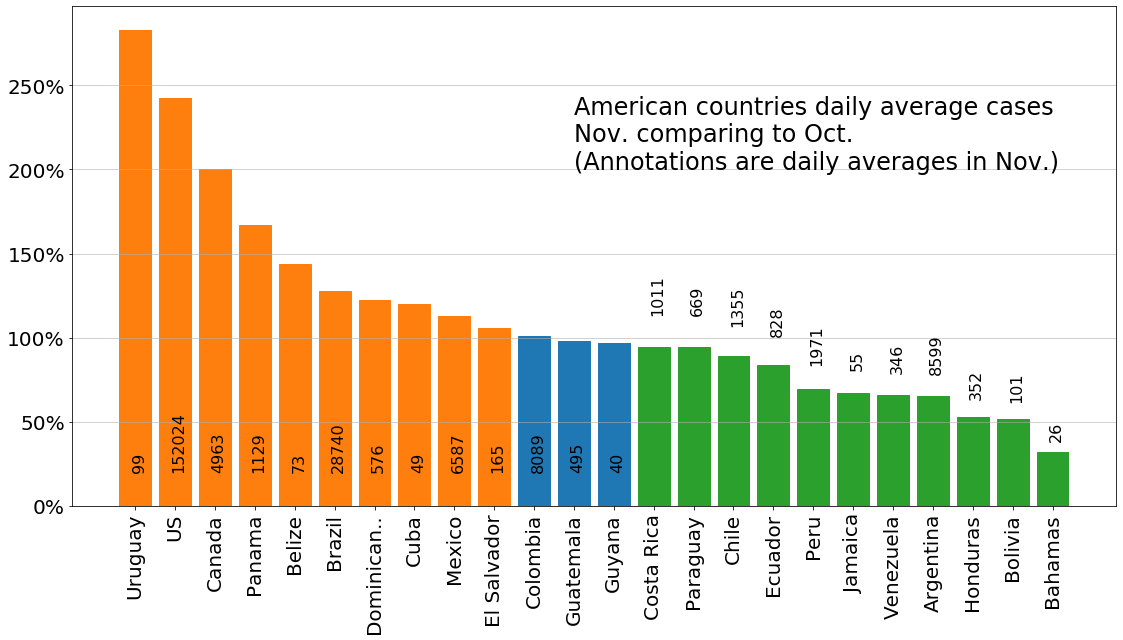

In [989]:
period = 31
# offset = 1
daily = ((df.iloc[-1] - df.iloc[-1-period])/ period).astype(int)
df = df.drop(daily[daily<=10].index, axis=1)

t = ((df.iloc[-1] - df.iloc[-1-period]) / (df.iloc[-1-period] - df.iloc[-1-2*period])).sort_values(ascending=False) * 100

fig, ax = plt.subplots(figsize=(16, 9))


bars = ax.bar(t.index, t.values, color='C2')
if t.min() < 97:
    sep1 = t.index.get_loc(t[t<103].index[0])
    sep2 = t.index.get_loc(t[t<97].index[0])
else:
    sep1, sep2 = len(t), len(t)

# for i in range(sep1):
#     bars[i].set_color('C1')
# for i in range(sep1, sep2):
#     bars[i].set_color('C0')
  
for i in range(sep1):
    ax.annotate(daily[t.index[i]], xy=(i+0.1,20), ha='center',va='bottom', fontsize=16, rotation=90)
    bars[i].set_color('C1')
for i in range(sep1, sep2):
    ax.annotate(daily[t.index[i]], xy=(i+0.1,20), ha='center',va='bottom', fontsize=16, rotation=90)
    bars[i].set_color('C0')
for i in range(sep2, len(t)):
    ax.annotate(daily[t.index[i]], xy=(i+0.1,1.2*t[i]), ha='center',va='bottom', fontsize=16, rotation=90)
    bars[i].set_color('C2')

ax.tick_params(labelsize=20)
ax.tick_params(axis='x', labelrotation=90)
# # ax.legend(fontsize=24)
ax.text(x=11,y=200, s='American countries daily average cases\nNov. comparing to Oct.\n(Annotations are daily averages in Nov.)', fontsize=24)
ax.grid(alpha=0.7, axis='y',)

# ax.set_xticklabels([us_state_abbrev[i] for i in t.index])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.tight_layout()
plt.savefig('figures/Daily_misc_12_3American.png', dpi=100)

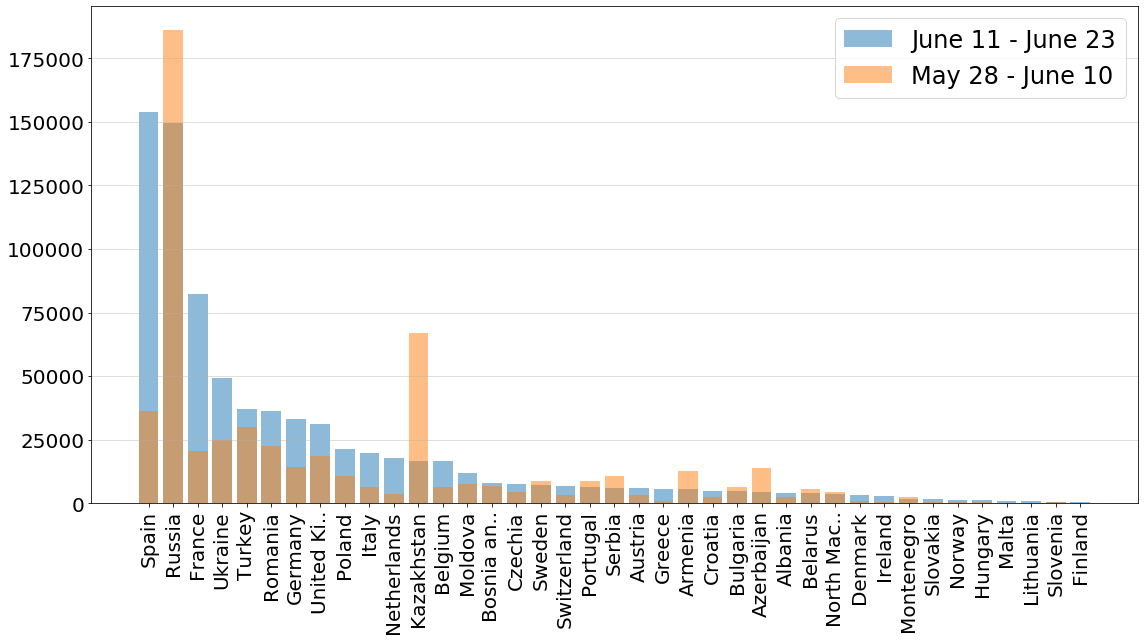

In [389]:
t1 = df.iloc[-1] - df.iloc[-31]
t2 = df.iloc[-31] - df.iloc[-61]

t2 = t2[t1.sort_values(ascending=False).index]
t1 = t1[t1.sort_values(ascending=False).index]

fig, ax = plt.subplots(figsize=(16, 9))

ax.bar(t1.index, t1.values, alpha=0.5, label='June 11 - June 23', )
ax.bar(t2.index, t2.values, alpha=0.5, label='May 28 - June 10')

ax.tick_params(labelsize=20)
ax.tick_params(axis='x', labelrotation=90)
ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')

# ax.set_yscale('log')
fig.tight_layout()
# plt.savefig('figures/Daily_misc_6_25.png', dpi=100)

# US ICU and death

In [ ]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

c = df.groupby('date').agg('sum').iloc[45:]

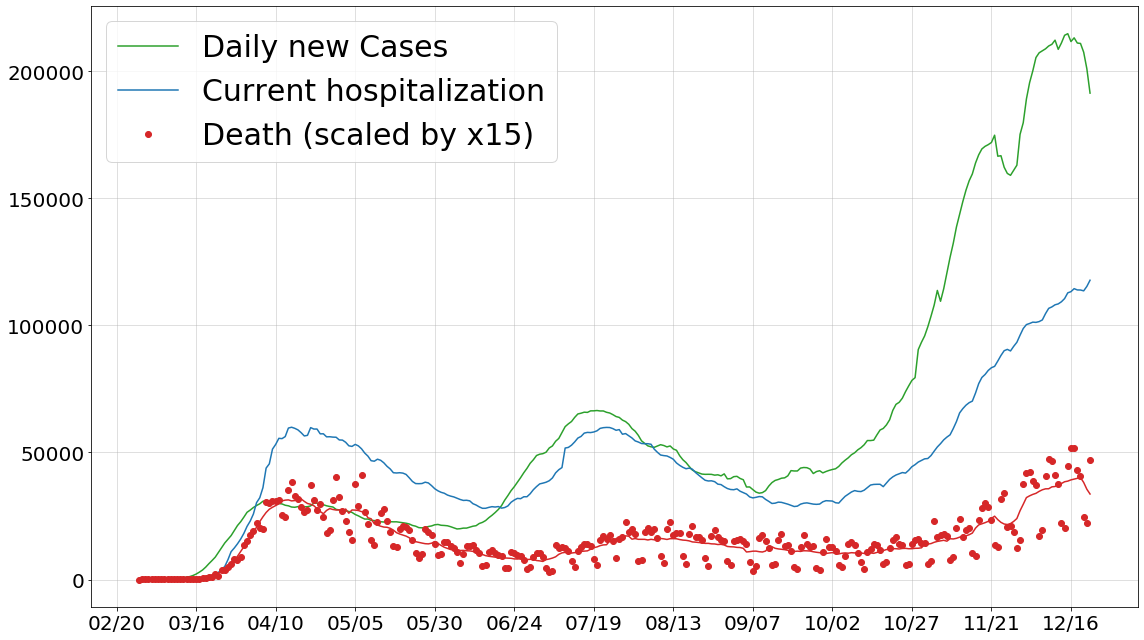

In [63]:
# with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
#     data = json.loads(url.read().decode())
# df = pd.DataFrame(data)
# df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

# c = df.groupby('date').agg('sum').iloc[45:]

fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot((c.positive - c.recovered - c.death).rolling(window=7, min_periods=1, center=True).mean()*0.1, label='New Cases')
ax.plot(c.positive.diff().rolling(window=7, min_periods=1, center=True).mean(), label='Daily new Cases', c='C2')
# ax.axvline(c.index[89],ymax=0.5, ls='--', lw=2, alpha=0.7, c='C2')

ax.plot(c.hospitalizedCurrently, label='Current hospitalization')
# ax.plot(c.inIcuCurrently*2, label='ICU (scaled by x2)')
ax.plot(c.deathIncrease*15, 'o', label='Death (scaled by x15)', c='C3', )
ax.plot(c.deathIncrease.rolling(window=7, min_periods=1, center=True).mean()*15, c='C3', )

ax.legend(loc=0, fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid(alpha=0.5)
# ax.axvline(c.index[99],ymax=0.43, ls='--', lw=2, alpha=0.7, c='C0')
# ax.axvline(c.index[106],ymax=0.34, ls='--', lw=2, alpha=0.7, c='C1')
plt.tight_layout()
# plt.savefig('figures/Daily_misc_12_17a.png', dpi=100)

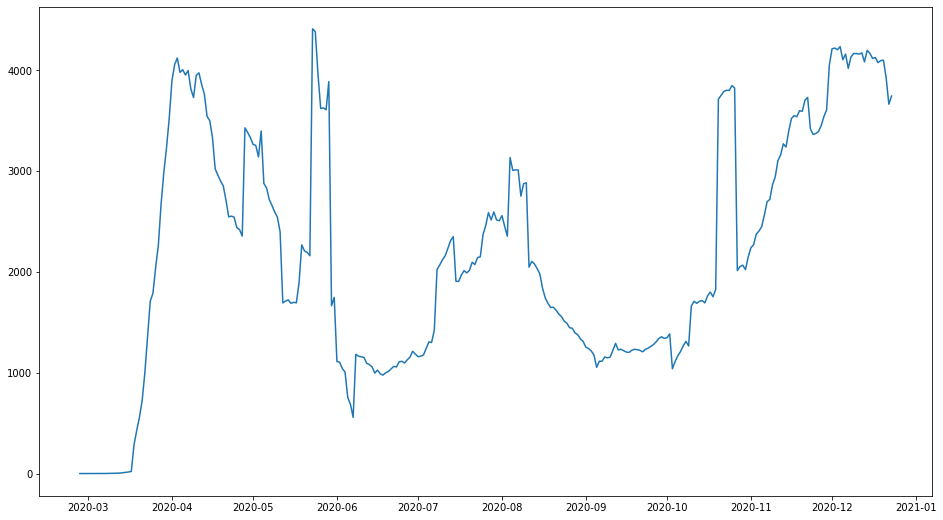

In [74]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(c['hospitalizedIncrease'].rolling(window=7, min_periods=1, center=True).mean())
# ax.plot(c['hospitalizedCumulative'].diff().rolling(window=7, min_periods=1, center=True).mean())

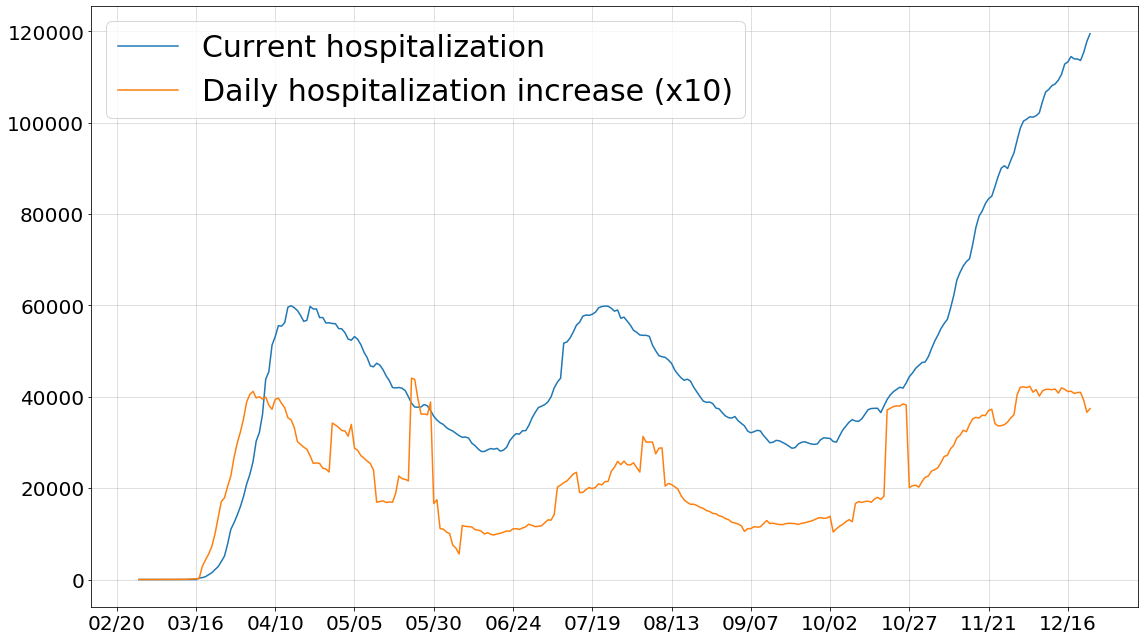

In [75]:
# with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
#     data = json.loads(url.read().decode())
# df = pd.DataFrame(data)
# df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

# c = df.groupby('date').agg('sum').iloc[45:]

fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot((c.positive - c.recovered - c.death).rolling(window=7, min_periods=1, center=True).mean()*0.1, label='New Cases')
# ax.plot(c.positive.diff().rolling(window=7, min_periods=1, center=True).mean(), label='Daily new Cases', c='C2')
# ax.axvline(c.index[89],ymax=0.5, ls='--', lw=2, alpha=0.7, c='C2')

ax.plot(c.hospitalizedCurrently, label='Current hospitalization')
ax.plot(c['hospitalizedIncrease'].rolling(window=7, min_periods=1, center=True).mean() * 10, label='Daily hospitalization increase (x10)')
# ax.plot(c.inIcuCurrently*2, label='ICU (scaled by x2)')
# ax.plot(c.deathIncrease*15, 'o', label='Death (scaled by x15)', c='C3', )
# ax.plot(c.deathIncrease.rolling(window=7, min_periods=1, center=True).mean()*15, c='C3', )

ax.legend(loc=0, fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid(alpha=0.5)
# ax.axvline(c.index[99],ymax=0.43, ls='--', lw=2, alpha=0.7, c='C0')
# ax.axvline(c.index[106],ymax=0.34, ls='--', lw=2, alpha=0.7, c='C1')
plt.tight_layout()
plt.savefig('figures/Daily_misc_12_23a.png', dpi=100)

In [76]:
c.T.iloc[:,-5:]

date                          2020-12-19   2020-12-20   2020-12-21  \
positive                      17453876.0   17649893.0   17828084.0   
probableCases                  1000264.0    1015265.0    1027562.0   
negative                     179328378.0  180548744.0  182161378.0   
pending                          12420.0      12410.0      12425.0   
totalTestResults             230340472.0  232122652.0  234199026.0   
hospitalizedCurrently           113929.0     113601.0     115351.0   
hospitalizedCumulative          641484.0     643866.0     647080.0   
inIcuCurrently                   21688.0      21763.0      21899.0   
inIcuCumulative                  34949.0      35030.0      35178.0   
onVentilatorCurrently             7790.0       7695.0       7776.0   
onVentilatorCumulative            3529.0       3530.0       3539.0   
recovered                      6882996.0    6935156.0    7043814.0   
death                           307850.0     309483.0     310968.0   
hospitalized                    641484.0     643866.0     647080.0   
totalTestsViral              181050517.0  182341359.0  184174526.0   
positiveTestsViral             8102635.0    8178545.0    8265768.0   
negativeTestsViral            44821803.0   45042656.0   45416940.0   
positiveCasesViral            15236799.0   15403524.0   15555280.0   
deathConfirmed                  151548.0     152263.0     152983.0   
deathProbable                    13426.0      13523.0      13639.0   
totalTestEncountersViral      66445715.0   66986904.0   67427433.0   
totalTestsPeopleViral         44123028.0   44351710.0   44578132.0   
totalTestsAntibody             3280901.0    3294879.0    3310109.0   
positiveTestsAntibody           298953.0     301534.0     303840.0   
negativeTestsAntibody          1011514.0    1012223.0    1015613.0   
totalTestsPeopleAntibody       1233372.0    1234566.0    1235549.0   
positiveTestsPeopleAntibody     117768.0     117796.0     117858.0   
negativeTestsPeopleAntibody     873142.0     873204.0     873258.0   
totalTestsPeopleAntigen         976297.0     984438.0     990597.0   
positiveTestsPeopleAntigen      186083.0     187461.0     189161.0   
totalTestsAntigen              4474367.0    4532021.0    4651747.0   
positiveTestsAntigen            278682.0     283999.0     289644.0   
positiveIncrease                202812.0     196017.0     178191.0   
negativeIncrease               1186906.0    1220366.0    1612634.0   
total                        196794674.0  198211047.0  200001887.0   
totalTestResultsIncrease       1739586.0    1782180.0    2076374.0   
posNeg                       196782254.0  198198637.0  199989462.0   
deathIncrease                     2723.0       1633.0       1485.0   
hospitalizedIncrease              3337.0       2382.0       3214.0   
commercialScore                      0.0          0.0          0.0   
negativeRegularScore                 0.0          0.0          0.0   
negativeScore                        0.0          0.0          0.0   
positiveScore                        0.0          0.0          0.0   
score                                0.0          0.0          0.0   

date                          2020-12-22   2020-12-23  
positive                      18018016.0   18238850.0  
probableCases                  1050731.0    1077282.0  
negative                     183394494.0  184590344.0  
pending                           9934.0      13784.0  
totalTestResults             235906804.0  237655825.0  
hospitalizedCurrently           117761.0     119463.0  
hospitalizedCumulative          651618.0     656447.0  
inIcuCurrently                   22207.0      22489.0  
inIcuCumulative                  35428.0      35695.0  
onVentilatorCurrently             7838.0       7819.0  
onVentilatorCumulative            3554.0       3579.0  
recovered                      7127027.0    7234883.0  
death                           314134.0     317513.0  
hospitalized                    651618.0     656447.0  
totalTest

In [125]:
c.death.diff()

date
2020-03-07       NaN
2020-03-08       4.0
2020-03-09       4.0
2020-03-10       2.0
2020-03-11       6.0
               ...  
2020-11-16     637.0
2020-11-17    1555.0
2020-11-18    1869.0
2020-11-19    1971.0
2020-11-20    1862.0
Name: death, Length: 259, dtype: float64

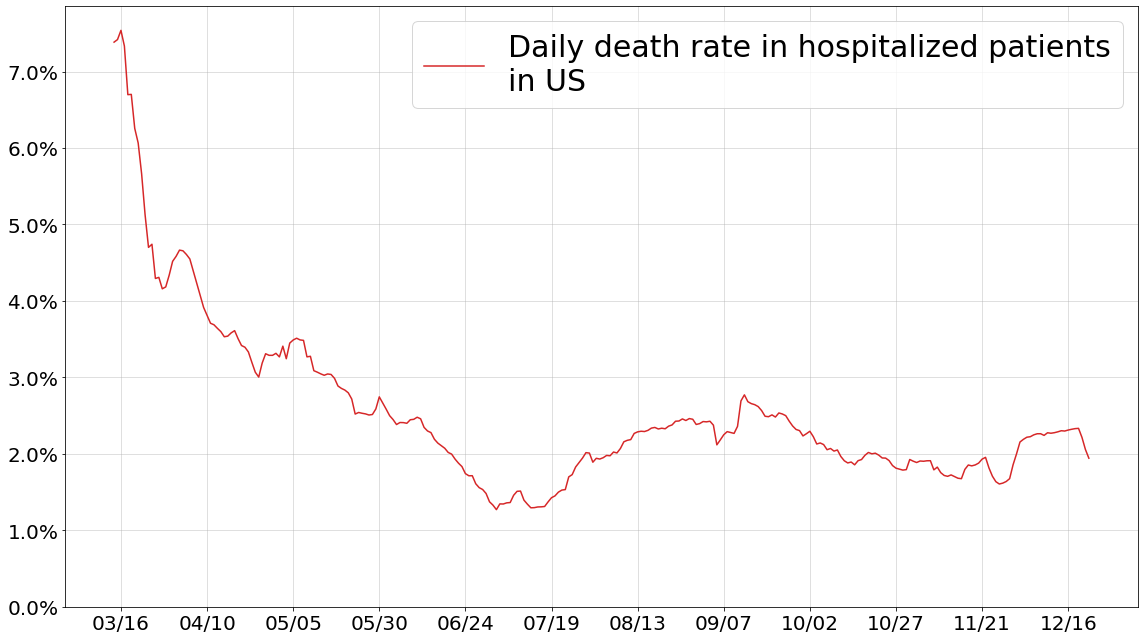

In [66]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((c.death.diff()/ c.hospitalizedCurrently).rolling(window=7, min_periods=1, center=True).mean() * 100, label='Daily death rate in hospitalized patients\nin US', c='C3')

ax.legend(loc=0, fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid(alpha=0.5)
# ax.axvline(c.index[99],ymax=0.43, ls='--', lw=2, alpha=0.7, c='C0')
# ax.axvline(c.index[106],ymax=0.34, ls='--', lw=2, alpha=0.7, c='C1')
ax.set_ylim(bottom=0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.tight_layout()

# plt.savefig('figures/Daily_misc_11_20.png', dpi=100)

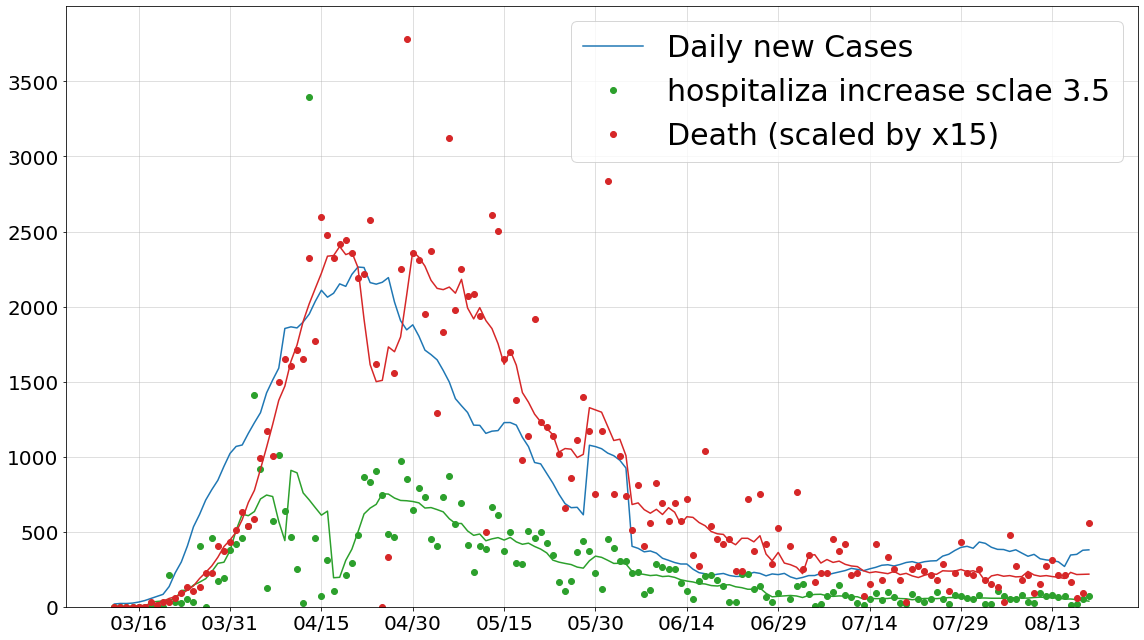

In [48]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

# c = df.groupby('date').agg('sum').iloc[45:]
c = df.query('state=="MA"').set_index('date').sort_index()

fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot((c.positive - c.recovered - c.death).rolling(window=7, min_periods=1, center=True).mean()*0.1, label='New Cases')
ax.plot(c.positive.diff().rolling(window=7, min_periods=1, center=True).mean(), label='Daily new Cases', c='C0')
# ax.axvline(c.index[89],ymax=0.5, ls='--', lw=2, alpha=0.7, c='C2')

# ax.plot(c.hospitalizedCurrently*0.5, label='Current hospitalization (scaled by x0.5)')
ax.plot(c.hospitalizedIncrease*3.5, 'o', label='hospitaliza increase sclae 3.5', c='C2')
ax.plot(c.hospitalizedIncrease.rolling(window=7, min_periods=1, center=True).mean()*3.5, c='C2')

ax.plot(c.deathIncrease*15, 'o', label='Death (scaled by x15)', c='C3', )
ax.plot(c.deathIncrease.rolling(window=7, min_periods=1, center=True).mean()*15, c='C3', )

ax.legend(loc=0, fontsize=30)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.grid(alpha=0.5)
# ax.axvline(c.index[99],ymax=0.43, ls='--', lw=2, alpha=0.7, c='C0')
# ax.axvline(c.index[106],ymax=0.34, ls='--', lw=2, alpha=0.7, c='C1')
ax.set_ylim(bottom=0)
plt.tight_layout()
# plt.savefig('figures/Daily_misc_7_10.png', dpi=100)

# US state single day increase

US cases by state fetched for 2020-12-15


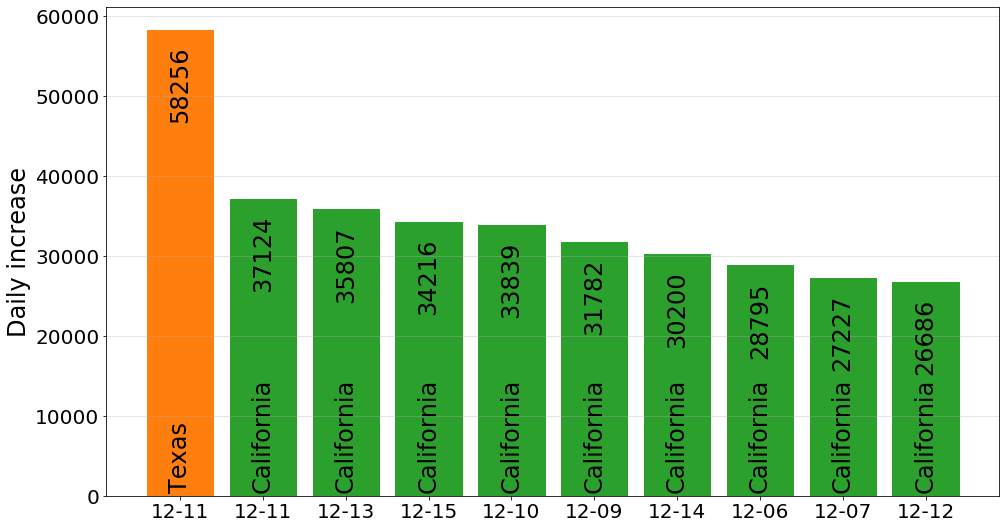

In [13]:
df = get_US()
t = df.unstack().sort_values(ascending=False).head(10)
labels = [i[0] + '_' + i[1].strftime('%m-%d') for i in t.index]

fig, ax = plt.subplots(figsize=(16, 9))

bars = ax.bar(labels, t.values, color='C2')

for i, state in enumerate(t.index.get_level_values('state')):
    bars[i].set_color('C'+str(['New York','Texas','California','Florida','Georgia','Ohio','Michigan'].index(state)))
# #     bars[i].set_color('C'+str(t.index.get_level_values('state').unique().get_loc(state)))
    ax.annotate(state, xy=(i, 1000), rotation=90, fontsize=24, ha='center')
    ax.annotate(t.values[i], xy=(i, t.values[i]-2000), rotation=90, fontsize=24, ha='center', va='top')
    
ax.grid(axis='y', alpha=0.4)
ax.tick_params(labelsize=20)
ax.set_ylabel('Daily increase', fontsize=24)
ax.set_xticklabels([i.split('_')[1] for i in labels])
# plt.savefig('figures/Daily_misc_7_17.png', dpi=100)
plt.show()

# US death

US deaths by state fetched for 2020-09-19
6
Index(['Missouri', 'Hawaii', 'Montana', 'North Dakota', 'South Dakota',
       'West Virginia', 'Puerto Rico'],
      dtype='object', name='state')


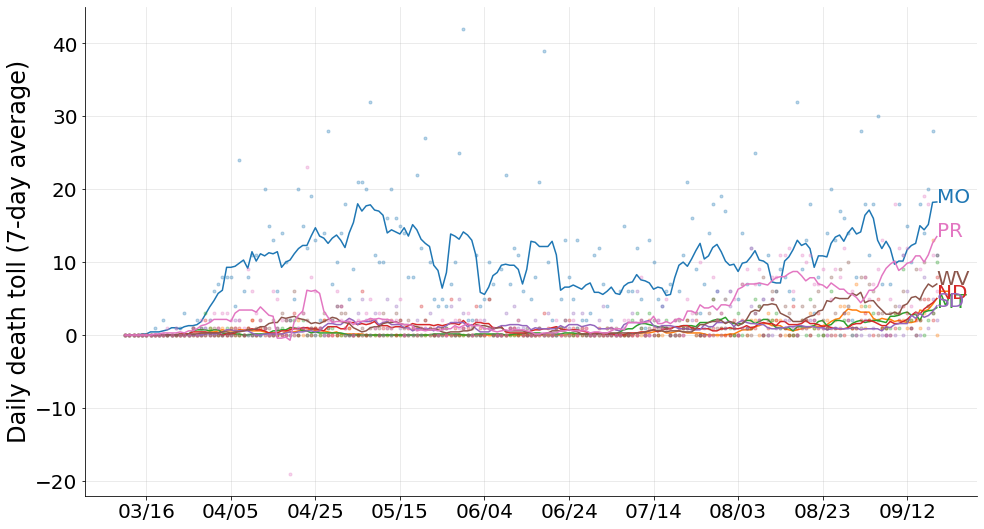

In [287]:
df = get_US_death().iloc[50:]
death_mean = df.rolling(window=7, min_periods=1, center=True).mean()

t = (death_mean / death_mean.max()).T.sort_values(death_mean.index[-1], ascending=False).T

fig, ax = plt.subplots(figsize=(16,9))

for i, state in enumerate(t.columns[:(t.iloc[-1] >= 1).sum()]):
    ax.plot(death_mean[state], c='C'+str(i))
    ax.plot(df[state], 'o', c='C'+str(i), alpha=0.3, markersize=3)
    ax.annotate(s=us_state_abbrev[state], xy=(df.index[-1], death_mean[state].values[-1]), 
                c='C'+str(i), fontsize=20)

print(i)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.tick_params(labelsize=20)
ax.grid(alpha=0.3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Daily death toll (7-day average)', fontsize=24)
ax.set_ylim()
# plt.savefig('figures/Daily_misc_7_28.png', dpi=100)

print(t.T[t.T[t.index[-1]] == 1].index)

# Israel R

$$\text{Infection}_{t} = \frac{R}{\text{GAMMA}}\times\sum_{i=1}^{GAMMA}\text{Infection}_{t-i}$$

# Would growth

In [447]:
a = confirm['US'].rolling(window=7, min_periods=1, center=True).mean()
b = confirm['India'].rolling(window=7, min_periods=1, center=True).mean()

In [459]:
(a>b)[-90:].head(15)

2020-07-22     True
2020-07-23     True
2020-07-24     True
2020-07-25     True
2020-07-26     True
2020-07-27     True
2020-07-28     True
2020-07-29     True
2020-07-30     True
2020-07-31     True
2020-08-01     True
2020-08-02     True
2020-08-03    False
2020-08-04    False
2020-08-05    False
dtype: bool

In [708]:
confirm.rolling(window=7, min_periods=1, center=True).mean().T.sort_values(confirm.index[-1]).tail(10)

2020-03-03  2020-03-04  2020-03-05   2020-03-06   2020-03-07  \
Country/Region                                                                 
Argentina             0.50         1.6    2.000000     1.714286     2.285714   
Poland                1.25         1.0    1.833333     2.285714     3.142857   
Russia                2.50         2.0    2.333333     2.000000     2.428571   
Spain                70.00        76.0   92.166667   136.142857   218.571429   
Italy               650.00       769.4  889.833333  1019.428571  1092.428571   
Brazil                2.75         2.2    3.000000     3.285714     4.142857   
United Kingdom       60.00        59.0   58.166667    70.857143   100.000000   
France              116.25       153.6  157.500000   146.857143   227.142857   
India                 6.50         5.8    5.666667     5.428571     7.285714   
US                   45.50        69.6   77.333333    77.000000   101.142857   

                 2020-03-08   2020-03-09   2020-03-10   2020-03-11  \
Country/Region                                                       
Argentina          2.571429     2.571429     4.142857     3.714286   
Poland             4.285714     6.857143     9.000000    14.000000   
Russia             2.428571     3.428571     4.571429     6.571429   
Spain            293.571429   412.428571   690.285714   841.571429   
Italy           1339.000000  1607.857143  1860.571429  2182.000000   
Brazil             4.857143     6.857143    19.714286    19.714286   
United Kingdom   150.714286    42.142857   270.857143   315.000000   
France           286.428571   356.571429   432.142857   505.285714   
India              4.857143     6.142857     7.285714     9.714286   
US               148.571429   200.285714   283.142857   367.857143   

                 2020-03-12  ...    2020-10-18    2020-10-19    2020-10-20  \
Country/Region               ...                                             
Argentina          4.714286  ...  15051.142857  14941.000000  14822.714286   
Poland            15.428571  ...   8682.142857   9254.714286  10101.428571   
Russia             6.571429  ...  15056.428571  15363.285714  15669.000000   
Spain           1017.857143  ...  13891.285714  14986.714286  15653.142857   
Italy           2481.714286  ...  10978.428571  12017.714286  13322.571429   
Brazil            20.285714  ...  22558.428571  22034.857143  21908.000000   
United Kingdom   129.714286  ...  19247.857143  19570.857143  20271.142857   
France           485.142857  ...  25713.285714  27284.857143  29759.571429   
India             10.571429  ...  57121.285714  55834.857143  54571.714286   
US               384.714286  ...  59997.000000  61146.714286  63229.142857   

                  2020-10-21    2020-10-22    2020-10-23    2020-10-24  \
Country/Region                                                           
Argentina       14602.428571  14415.571429  14234.142857  13944.285714   
Poland          10673.714286  11131.714286  11525.857143  12527.142857   
Russia          15891.428571  16118.285714  16304.714286  16338.142857   
Spain           15653.142857  15653.142857  17695.857143  18345.142857   
Italy           14567.571429  15934.428571  17030.142857  18618.428571   
Brazil          22324.714286  24252.285714  22732.428571  23669.571429   
United Kingdom  21249.285714  21649.714286  21945.428571  22168.142857   
France          29763.142857  29772.000000  36721.571429  38709.571429   
India           52894.285714  51383.714286  49909.428571  48459.285714   
US              66969.857143  68768.000000  69967.142857  71864.571429   

                  2020-10-25  2020-10-26  2020-10-27  
Country/Region                                        
Argentina       13214.000000     12591.8    11810.25  
Poland          12941.666667     13108.6    12977.75  
Russia          16487.166667     16643.8    16535.50  
Spain           18573.833333     18091.4    17651.50  
Italy           19188.333333     19810.4    19977.25  
Bra

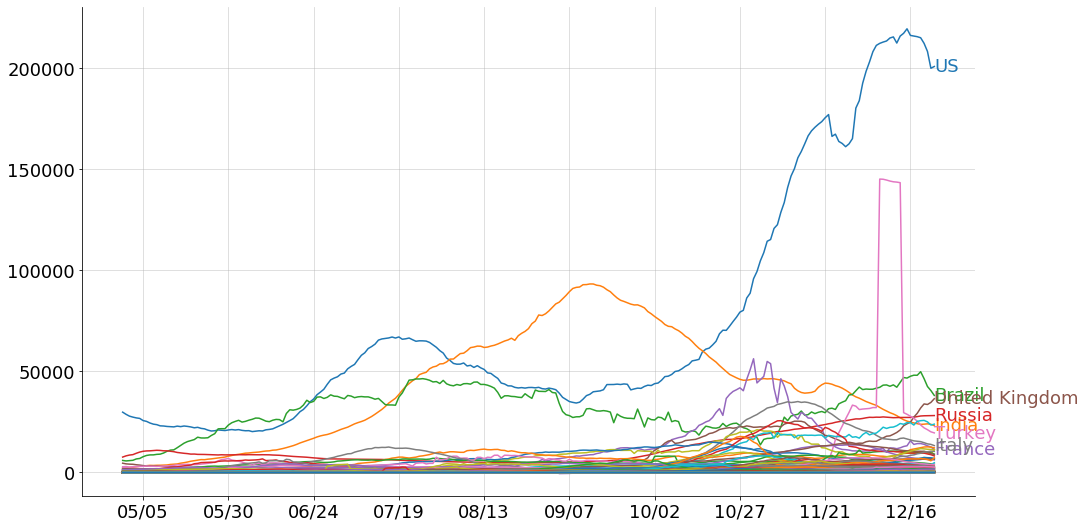

In [129]:
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region')
confirm = confirm.sort_values(confirm.columns[-1], ascending=False).T.diff().iloc[-240:]
confirm.index = pd.to_datetime(confirm.index)

confirm = confirm[:-1]

fig, ax = plt.subplots(figsize=(16,9))

# ax.plot(confirm.sum(axis=1).rolling(window=7, min_periods=1, center=True).mean())
for i, country in enumerate(confirm.columns):
# for i, country in enumerate([i for i in confirm.columns if i in africa]):    
    ax.plot(confirm[country].rolling(window=7, min_periods=1, center=True).mean())
    if i < 8:
        ax.annotate(country, xy=(confirm.index[-1], confirm[country].rolling(window=7, min_periods=1, center=True).mean().values[-1]),
                   fontsize=18, va='center', c='C'+str(i))

# ax.legend(fontsize=20)

ax.tick_params(labelsize=18)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(alpha=0.5)
# plt.savefig('figures/daily_misc_11_14.png', dpi=100)

Global deaths (total) by country fetched for 11-02


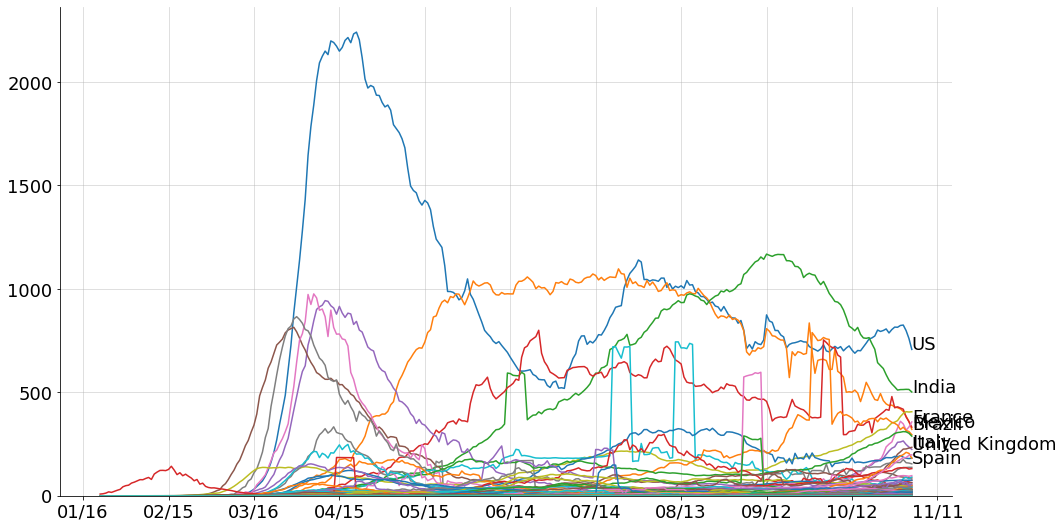

In [846]:
confirm = get_global_deaths_total().diff().drop('Global', axis=1)
# confirm = confirm.sort_values(confirm.columns[-1], ascending=False).T.diff().iloc[-240:].drop('Global')
confirm.index = pd.to_datetime(confirm.index)

# confirm = confirm[:-1]

fig, ax = plt.subplots(figsize=(16,9))

# ax.plot(confirm.sum(axis=1).rolling(window=7, min_periods=1, center=True).mean())
for i, country in enumerate(confirm.columns):
# for i, country in enumerate([i for i in confirm.columns if i in africa]):    
    ax.plot(confirm[country].rolling(window=7, min_periods=1, center=True).mean())
    if i < 8:
        ax.annotate(country, xy=(confirm.index[-1], confirm[country].rolling(window=7, min_periods=1, center=True).mean().values[-1]),
                   fontsize=18)

# ax.legend(fontsize=20)

ax.tick_params(labelsize=18)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylim(bottom=0)
ax.grid(alpha=0.5)

In [438]:
565*0.0277

15.6505

In [443]:
565*1905*7.5/(11*13.5)/1000000

0.05435984848484849

# Target Line Segemented Regression

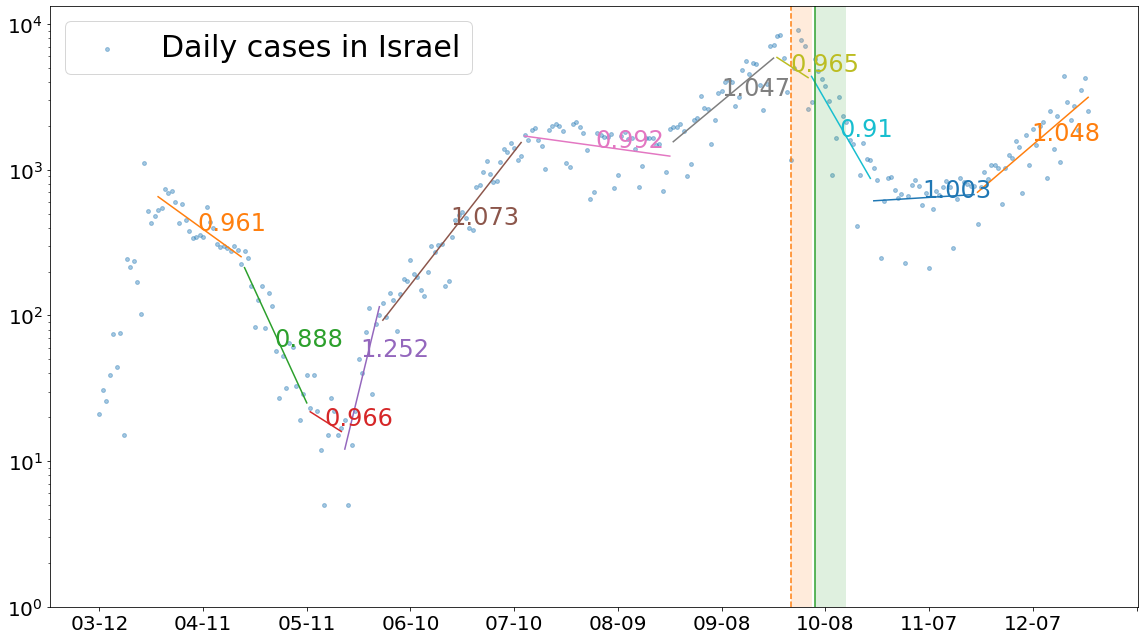

In [128]:
def linear_fit(x, a, b):
    return  a*x+b


title = 'Israel'
days = [(17,42),(42,61),(61,71),(71,82),(82,123),(123,166),(166,196),(196,206),(206,224),(224,254),(254,287)]


confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
focus = confirm['Israel'].diff()[50:]
focus.index = pd.to_datetime(focus.index).strftime('%m-%d')
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.scatter(focus.index, focus.values, c='C0', s=15, alpha=0.4, label=r'Daily cases in %s'%title)
# ax.bar(x=focus.index, height=focus.values, alpha=0.3, label=r'Daily cases in %s'%title)

# ax.plot(focus.rolling(window=3, min_periods=1, center=True).mean(), c='green',alpha=0.3)

for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
    ax.annotate(np.round(np.exp(slope),3), 
                xy=((a+b-2)/2, np.exp((a+b+2)/2*slope + intercept)), fontsize=24, c=('C'+str(i+1)))                    

ax.legend(prop={'size': 30})
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.format_xdata = mdates.DateFormatter('%m-%d')
ax.set_yscale('log')
ax.set_ylim(bottom=1, )
ax.axvline(x=focus.index[200], ls='--', c='C1')
ax.axvspan(xmin=focus.index[200],  xmax=focus.index[206], facecolor='C1', alpha=0.15)
ax.axvline(x=focus.index[207], c='C2')
ax.axvspan(xmin=focus.index[207],  xmax=focus.index[216], facecolor='C2', alpha=0.15)

plt.tight_layout()

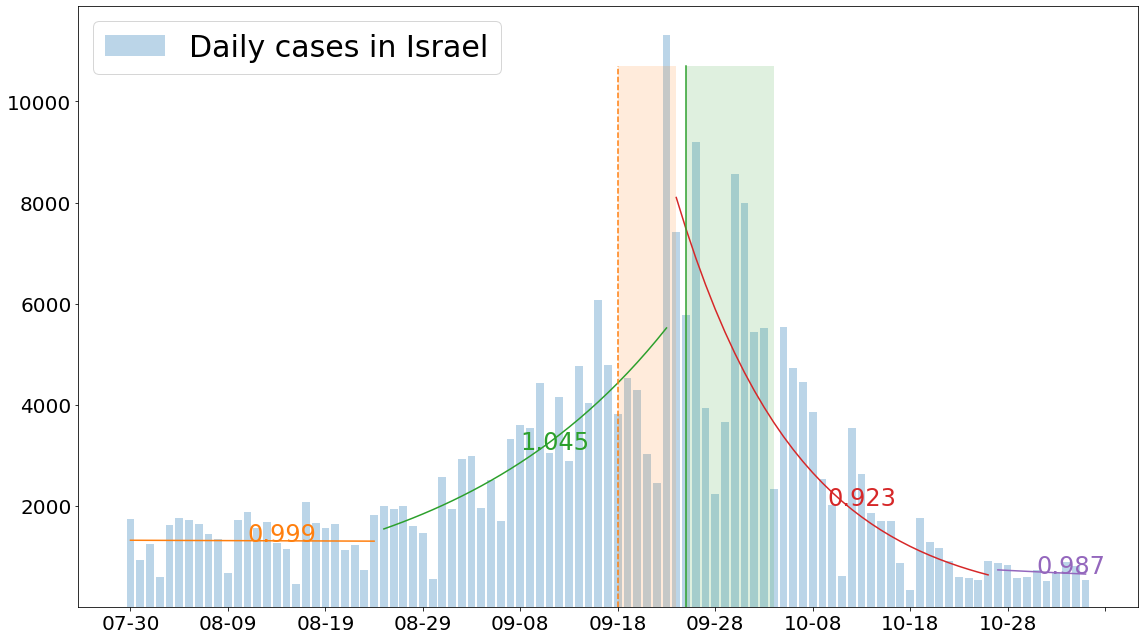

In [901]:
def linear_fit(x, a, b):
    return  a*x+b


title = 'Israel'
days = [(0,26),(26,56),(56,66),(66,89),(89,99)]

confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
focus = confirm['Israel'].diff()[190:]
# focus = focus.rolling(window=3, min_periods=1, center=True).mean()
focus.index = pd.to_datetime(focus.index).strftime('%m-%d')
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.scatter(focus.index, focus.values, c='C0', s=15, alpha=0.6, label=r'Daily cases in %s'%title)
ax.bar(x=focus.index, height=focus.values, alpha=0.3, label=r'Daily cases in %s'%title)
# ax.plot(focus.rolling(window=3, min_periods=1, center=True).mean(), c='green',alpha=0.3)

for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
    ax.annotate(np.round(np.exp(slope),3), 
                xy=((a+b-2)/2, np.exp((a+b+2)/2*slope + intercept)), fontsize=24, c=('C'+str(i+1)))                    

ax.legend(prop={'size': 30}, loc=2)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.format_xdata = mdates.DateFormatter('%m-%d')
# ax.set_yscale('log')
ax.set_ylim(bottom=1, )
ax.axvline(x=focus.index[50], ls='--', c='C1', ymax=0.9)
ax.axvspan(xmin=focus.index[50],  xmax=focus.index[56], facecolor='C1', ymax=0.9, alpha=0.15)
ax.axvline(x=focus.index[57], c='C2', ymax=0.9)
ax.axvspan(xmin=focus.index[57],  xmax=focus.index[66], facecolor='C2', ymax=0.9, alpha=0.15)


a = np.array([5500])
to_date = days[-1][-1]-55
for i in range(to_date):
    a = np.append(a, a[-1]*1.045)
ax.plot(np.arange(55,55+to_date+1), a, ls='-.', c='C2')
ax.annotate(s='Today(%s) \n%s'%(confirm.index[-1][:-5], int(a[-1])), xy=(55+to_date, a[-1]+100), fontsize=20, va='bottom', ha='center', c='C2')
ax.set_ylim(top=a[-1]*1.1)

b = np.array([450])
while b[-1] > 10:
    b = np.append(b, b[-1]*(1+slope))
ax.plot(np.arange(55+to_date,55+to_date+len(b)), b, ls='-.', c='C4')
ax.annotate(s=str(len(b))+' days', xy=(79+len(b), 100), fontsize=20, ha='center', c='C4')

plt.tight_layout()



In [553]:
focus.index[100]

'06-10'

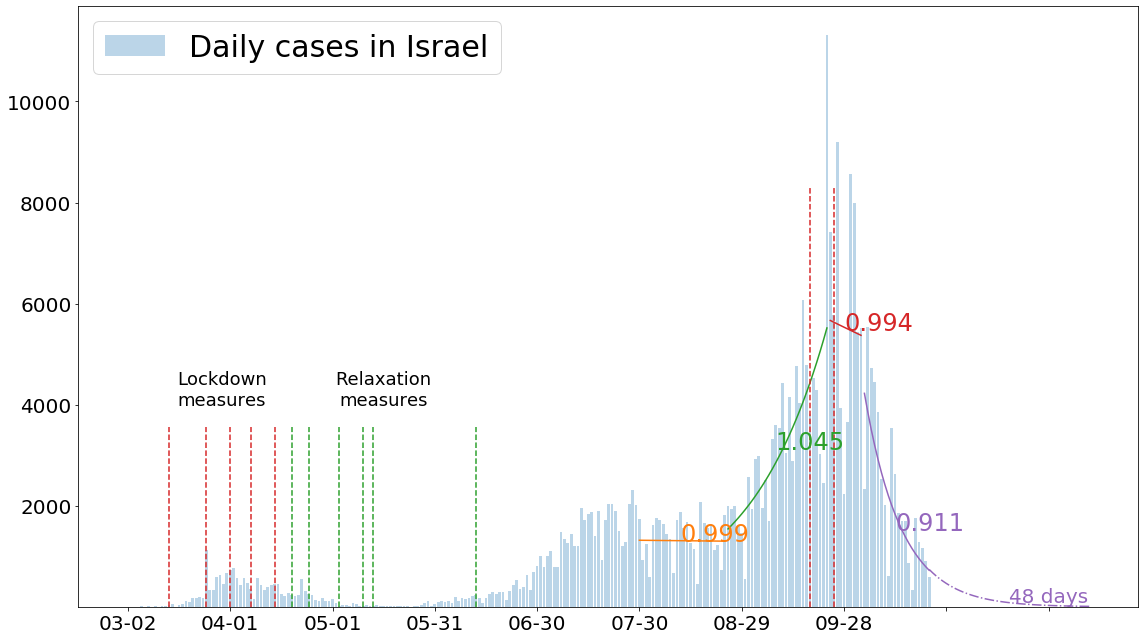

In [598]:
def linear_fit(x, a, b):
    return  a*x+b


title = 'Israel'
days = [(150,176),(176,206),(206,216),(216,236)]


confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
focus = confirm['Israel'].diff()[40:]
# focus = focus.rolling(window=3, min_periods=1, center=True).mean()
focus.index = pd.to_datetime(focus.index).strftime('%m-%d')
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.scatter(focus.index, focus.values, c='C0', s=15, alpha=0.6, label=r'Daily cases in %s'%title)
ax.bar(x=focus.index, height=focus.values, alpha=0.3, label=r'Daily cases in %s'%title)
# ax.plot(focus.rolling(window=3, min_periods=1, center=True).mean(), c='green',alpha=0.3)

for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
    ax.annotate(np.round(np.exp(slope),3), 
                xy=((a+b-2)/2, np.exp((a+b+2)/2*slope + intercept)), fontsize=24, c=('C'+str(i+1)))                    

ax.legend(prop={'size': 30})
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.format_xdata = mdates.DateFormatter('%m-%d')
# ax.set_yscale('log')
ax.set_ylim(bottom=1, )
ax.axvline(x=focus.index[200], ls='--', c='C3', ymax=0.7)
# ax.axvspan(xmin=focus.index[200],  xmax=focus.index[206], facecolor='C1', ymax=0.7, alpha=0.15)
ax.axvline(x=focus.index[207], ls='--', c='C3', ymax=0.7)
# ax.axvspan(xmin=focus.index[207],  xmax=focus.index[216], facecolor='C3', ymax=0.7, alpha=0.15)

for i in [12,23,30,36,43]:
    ax.axvline(x=focus.index[i], ls='--', c='C3', ymax=0.3)
for i in [48,53,62,69,72,102]:
    ax.axvline(x=focus.index[i], ls='--', c='C2', ymax=0.3)



ax.text(x=27.5, y=4000, s='Lockdown\nmeasures', fontsize=18, ha='center')
ax.text(x=75, y=4000, s='Relaxation\nmeasures', fontsize=18, ha='center')

# a = np.array([5500])
# for i in range(28):
#     a = np.append(a, a[-1]*1.045)
# ax.plot(np.arange(205,234), a, ls='-.', c='C2')
# ax.annotate(s='Today(Oct.21) \n%s'%int(a[-1]), xy=(205+26, a[-1]+100), fontsize=20, va='bottom', ha='center', c='C2')
# ax.set_ylim(top=a[-1]*1.1)

b = np.array([740])
while b[-1] > 10:
    b = np.append(b, b[-1]*.911)
ax.plot(np.arange(235,235+len(b)), b, ls='-.', c='C4')
ax.annotate(s=str(len(b))+' days', xy=(222+len(b), 100), fontsize=20, ha='center', c='C4')

plt.tight_layout()



711.5

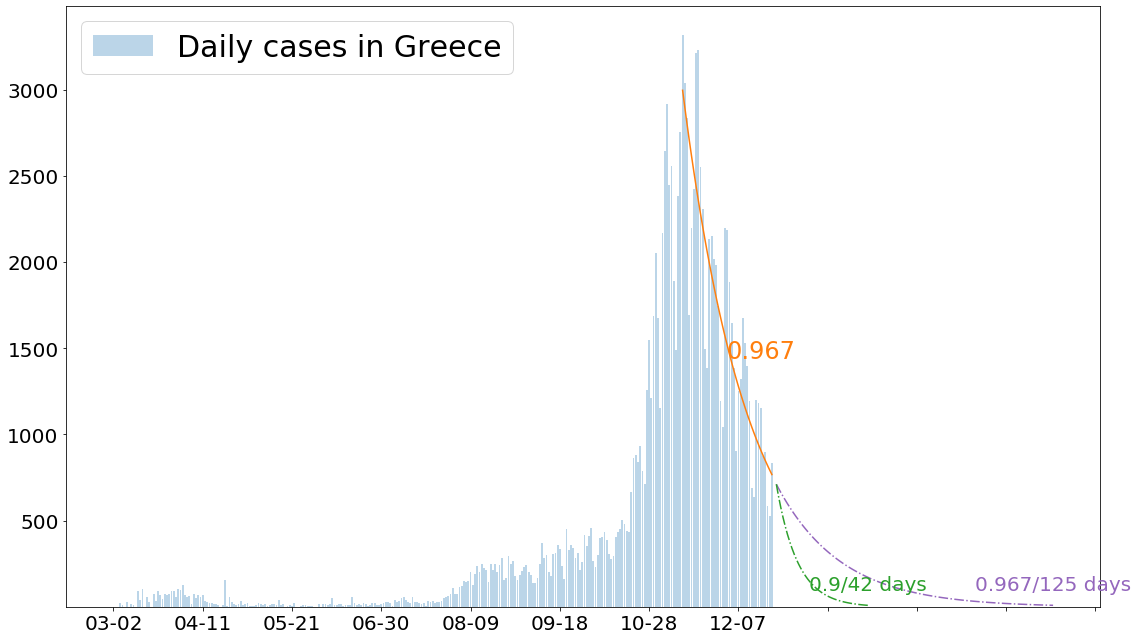

In [107]:
def linear_fit(x, a, b):
    return  a*x+b


country = 'Greece'
days = [(255,296)]


confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T
focus = confirm[country].diff()[40:]
# focus = focus.rolling(window=3, min_periods=1, center=True).mean()
focus.index = pd.to_datetime(focus.index).strftime('%m-%d')
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.scatter(focus.index, focus.values, c='C0', s=15, alpha=0.6, label=r'Daily cases in %s'%title)
ax.bar(x=focus.index, height=focus.values, alpha=0.3, label=r'Daily cases in %s'%title)
# ax.plot(focus.rolling(window=3, min_periods=1, center=True).mean(), c='green',alpha=0.3)

for i,(a,b) in enumerate(days):
    slope, intercept = optimize.curve_fit(linear_fit, np.arange(a,b), np.log(focus.values[a:b]+1))[0]
    ax.plot(np.arange(a,b), np.exp(np.arange(a,b)*slope + intercept), c=('C'+str(i+1)))
    ax.annotate(np.round(np.exp(slope),3), 
                xy=((a+b-2)/2, np.exp((a+b+2)/2*slope + intercept)), fontsize=24, c=('C'+str(i+1)))                    

ax.legend(prop={'size': 30})
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.format_xdata = mdates.DateFormatter('%m-%d')
# ax.set_yscale('log')
ax.set_ylim(bottom=1, )



b = np.array([focus.rolling(window=7, min_periods=1, center=True).mean()[-1]])
while b[-1] > 10:
    b = np.append(b, b[-1]*(1+slope))
ax.plot(np.arange(297,297+len(b)), b, ls='-.', c='C4')
ax.annotate(s=str(0.967) +'/'+ str(len(b))+' days', xy=(296+len(b), 100), fontsize=20, ha='center', c='C4')


b = np.array([focus.rolling(window=7, min_periods=1, center=True).mean()[-1]])
while b[-1] > 10:
    b = np.append(b, b[-1]*(0.9))
ax.plot(np.arange(297,297+len(b)), b, ls='-.', c='C2')
ax.annotate(s=str(0.900) +'/'+ str(len(b))+' days', xy=(296+len(b), 100), fontsize=20, ha='center', c='C2')



plt.tight_layout()



# France - alternative source

In [648]:
df = pd.read_csv('https://raw.githubusercontent.com/ronanren/Covid19bot/master/data/dataFrance.csv', thousands='.')
focus = df.set_index('Date')
focus.index = pd.to_datetime(focus.index)

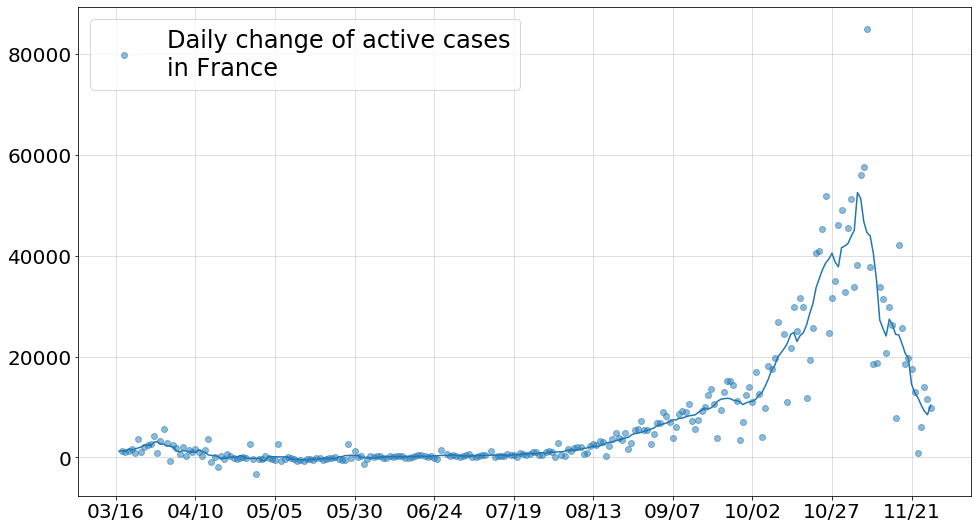

In [663]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(focus['Active Cases'].diff(), 'o', alpha=0.5, label='Daily change of active cases\nin France')
ax.plot(focus['Active Cases'].diff().rolling(window=7, min_periods=1, center=True).mean(), c='C0')

ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


ax.legend(fontsize=24)
ax.grid(alpha=0.5)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# plt.tight_layout()
plt.savefig('figures/Daily_misc_11_27a.png', dpi=100)

# Spain -alternative source

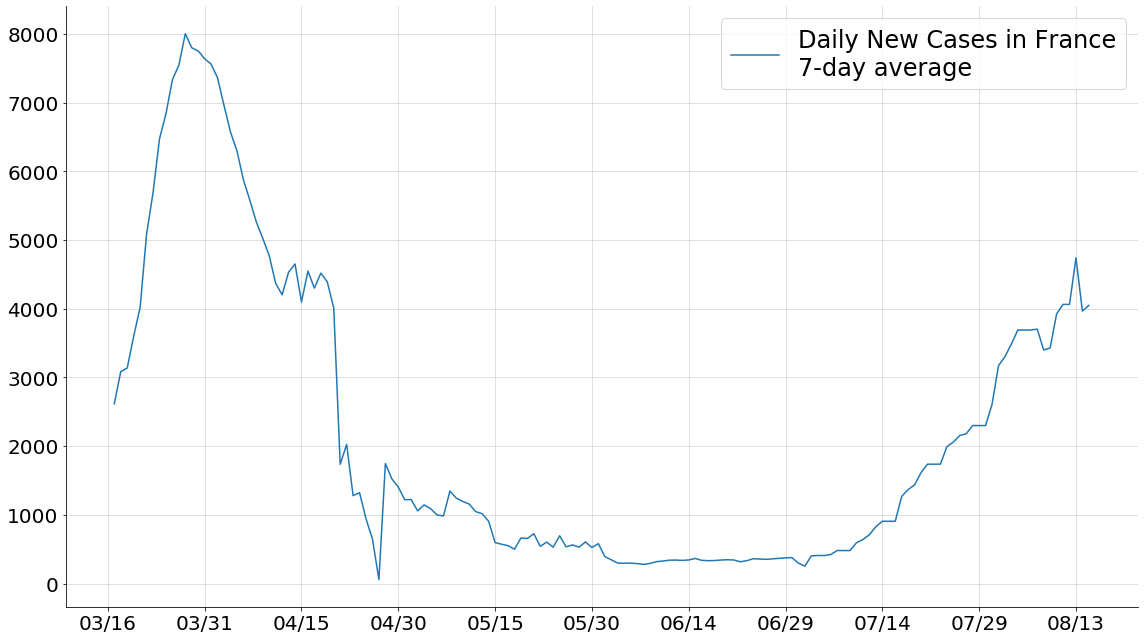

In [411]:
df = pd.read_csv('https://raw.githubusercontent.com/davidjayjackson/COVID-19-Camino/master/spain_daily.csv').set_index('date')
df.index = pd.to_datetime(df.index)
t = df['confirmed'].diff()[45:]

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(t.rolling(window=7, min_periods=1, center=True).mean(), label='Daily New Cases in France\n7-day average')

ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))


ax.legend(fontsize=24)
ax.grid(alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tight_layout()
# plt.savefig('figures/Daily_misc_8_29.png', dpi=100)

# US 6M

2020-05-20 00:00:00
2020-06-09 00:00:00
2020-07-05 00:00:00
2020-07-29 00:00:00
2020-08-14 00:00:00
2020-08-25 00:00:00
2020-09-10 00:00:00
2020-09-27 00:00:00
2020-10-31 00:00:00
2020-12-22 00:00:00


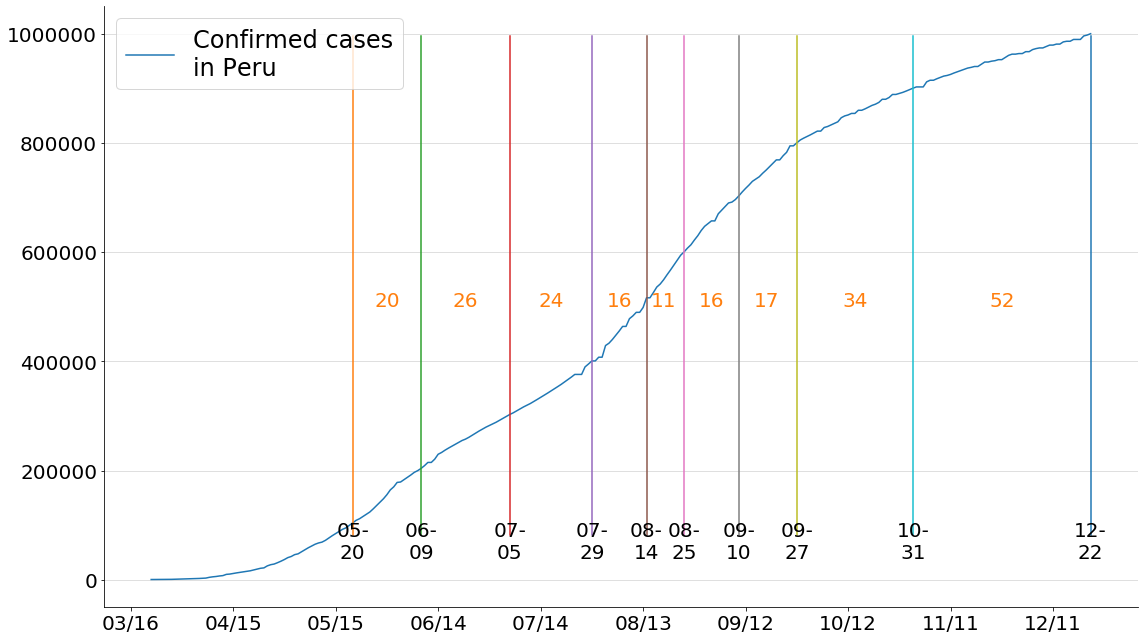

In [72]:
confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region')
# confirm = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')

country = 'Peru'
t = confirm.T[country][60:]
# t = confirm.sum()
# t.values[-1] = 1000000
t.index = pd.to_datetime(t.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.plot(t, label='Confirmed cases\nin %s'%country)

unit = 100000
for i in range(1, t[-1]//unit+1):
    date = t[t.ge(i * unit)].index[0]
    if i < t[-1]//unit:
        next_date = t[t.ge(i * unit+unit)].index[0]
        delta = (next_date - date)/np.timedelta64(1,'D')
        ax.annotate(str(int(delta)), xy=(date+pd.DateOffset(int(delta/2)), 500000), ha='center', fontsize=20, c='C1')
        
    print(date)
    ax.axvline(x=date, c='C'+str(i), ymin=0.12, ymax=.95)
    if i not in [11,12,14,15,16,17]:
        ax.annotate(date.strftime('%m-\n%d'), xy=(date, 40000), ha='center', fontsize=20)
    


ax.legend(fontsize=24, loc=2)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
plt.savefig('figures/Daily_misc_12_23.png', dpi=100)

2020-05-23 00:00:00
2020-09-21 00:00:00


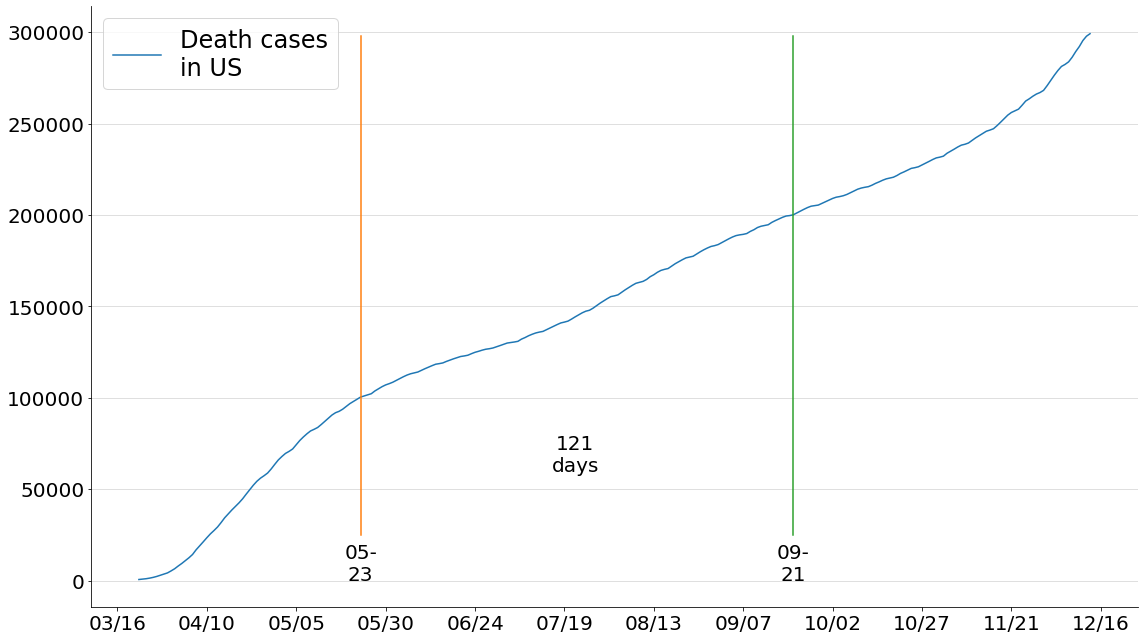

In [39]:
death = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')
# confirm = pd.read_csv('data/JH/death_agg.csv').set_index('Country/Region')

country = 'US'
t = death.T[country][60:]
# t = confirm.sum()
t.index = pd.to_datetime(t.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.plot(t, label='Death cases\nin %s'%country)

unit = 100000
for i in range(1, t[-1]//unit+1):
    date = t[t.ge(i * unit)].index[0]
    if i < t[-1]//unit:
        next_date = t[t.ge(i * unit+unit)].index[0]
        delta = (next_date - date)/np.timedelta64(1,'D')
        ax.annotate(str(int(delta))+'\ndays', xy=(date+pd.DateOffset(int(delta/2)), 60000), ha='center', fontsize=20)
        
    print(date)
    ax.axvline(x=date, c='C'+str(i), ymin=0.12, ymax=.95)
    ax.annotate(date.strftime('%m-\n%d'), xy=(date, 40), ha='center', fontsize=20)
    


ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
# plt.savefig('figures/Daily_misc_11_11a.png', dpi=100)

# France deatiled

In [64]:
df

Total Cases  New Cases  Total Deaths  New Deaths  Total Recovered  \
Date                                                                            
2020-03-17         7730       1097           175          27              602   
2020-03-18         9134       1404           264          89             1000   
2020-03-19        10995       1861           372         108             1300   
2020-03-20        12612       1617           450          78             1587   
2020-03-21        14459       1847           562         112             1811   
...                 ...        ...           ...         ...              ...   
2020-11-14      1954599      32095         44246         354           139140   
2020-11-15      1981827      27228         44548         302           139810   
2020-11-16      1991233       9406         45054         506           140880   
2020-11-17      2036755      14524         46273         625           143152   
2020-11-18      2065138      28383         46698         425           145391   

            Active Cases  Critical  New Recovered  New Active  New Critical  \
Date                                                                          
2020-03-17          6953       699              0           0             0   
2020-03-18          8268       771            398        1315           232   
2020-03-19          9328      1002            300        1060           191   
2020-03-20         10575      1297            287        1247           175   
2020-03-21         12310      1525            224        1735           228   
...                  ...       ...            ...         ...           ...   
2020-11-14       1771213      4871           1985       29756           -32   
2020-11-15       1797469      4896            670       26256            25   
2020-11-16       1805299      4896           1070        7830             0   
2020-11-17       1847330      4854           2272       42031           -42   
2020-11-18       1873049      4775           2239       25719           -79   

            PlaceInWorld  Total Tests  New Tests  
Date                                              
2020-03-17             7            0          0  
2020-03-18             6            0          0  
2020-03-19             7            0          0  
2020-03-20             7            0          0  
2020-03-21             7            0          0  
...                  ...          ...        ...  
2020-11-14             4     18792403      37972  
2020-11-15             4     19005625     213222  
2020-11-16             4     19191764     186139  
2020-11-17             4     19275371      83607  
2020-11-18             4     19339461      64090  

[244 rows x 13 columns]

No handles with labels found to put in legend.


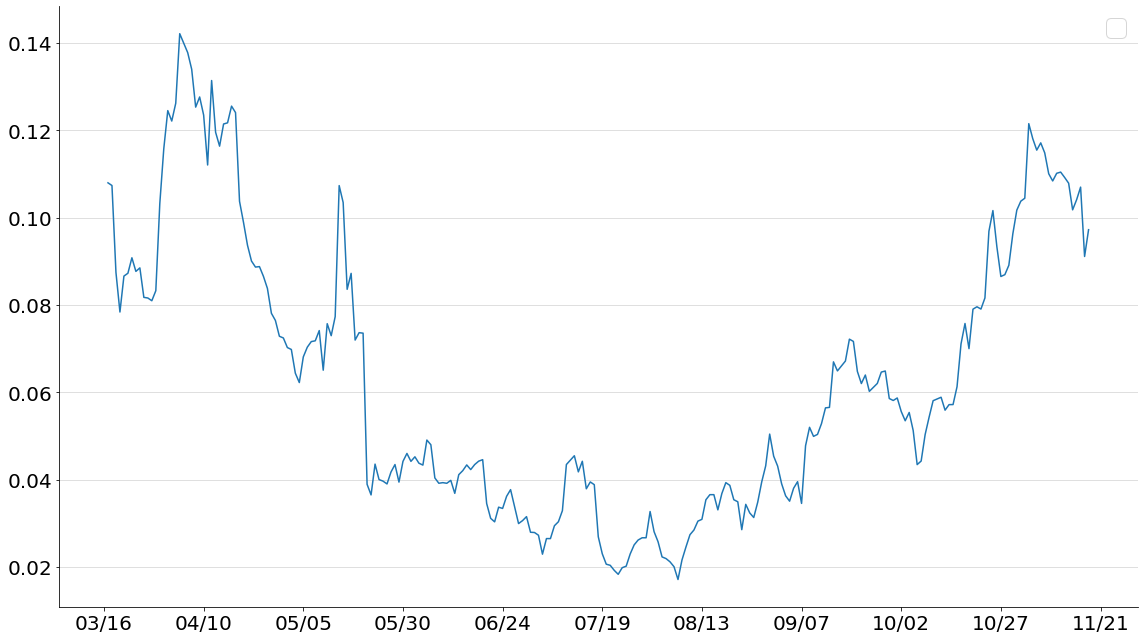

In [86]:
df = pd.read_csv('https://raw.githubusercontent.com/ronanren/Covid19bot/master/data/dataFrance.csv', thousands='.').set_index('Date')
df.index = pd.to_datetime(df.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

# ax.plot(df['Total Cases'].diff(), 'o', label='Confirmed cases\nin France', markersize=5, alpha=0.4)
# ax.plot(df['Total Cases'].diff().rolling(window=7, min_periods=1, center=True).mean(), c='C0')

# ax.plot(df['Critical'], 'o', label='Current critical cases \nin France', markersize=5, alpha=0.4)
# ax.plot(10*df['New Deaths'], 'o', label='Daily deaths in France\nscaled by x10', markersize=5, alpha=0.6, c='C3')
# ax.plot(10*df['New Deaths'].rolling(window=7, min_periods=1, center=True).mean(), alpha=0.5, c='C3')

ax.plot(df['New Deaths'].rolling(window=7, min_periods=1, center=True).mean()/df['Critical'])

ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
# ax.set_ylim(bottom=-10)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.tight_layout()
# plt.savefig('figures/Daily_misc_11_18.png', dpi=100)

# Gompertz function

In [356]:
from scipy.optimize import curve_fit

def gompertz(x,a,b,c):
    return a*np.exp(-b*np.exp(-c*x))  

confirm = pd.read_csv('data/JH/confirm_agg.csv').set_index('Country/Region').T

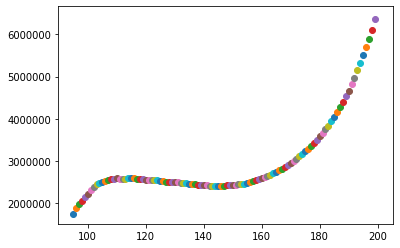

In [380]:
for end in range(95,200):


    country = 'Italy'
    t = confirm[country][:end]

    xdata = t.reset_index().index.tolist()
    ydata = t.values

    popt, pcov = curve_fit(gompertz, xdata, ydata)

    # y_est = ngompertz(i, popt[0], popt[1], popt[2]) for i 
    def fn(x):
        return gompertz(x, popt[0], popt[1], popt[2]) 

    error = np.power((np.array(list(map(fn, xdata))) - ydata), 2)
    mse = error.sum()/end
    plt.scatter(x=end, y=mse)
# mse

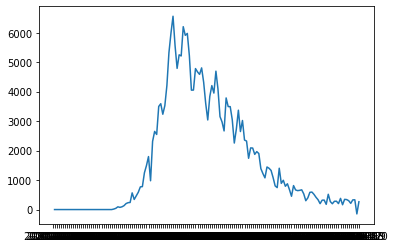

In [381]:
country = 'Italy'
t = confirm[country][:-95]
plt.plot(t.diff())

In [336]:
xdata = t.reset_index().index.tolist()
ydata = t.values

popt, pcov = curve_fit(gompertz, xdata, ydata)

# y_est = ngompertz(i, popt[0], popt[1], popt[2]) for i 
def fn(x):
    return gompertz(x, popt[0], popt[1], popt[2]) 

s = np.power((np.array(list(map(fn, xdata))) - ydata), 2)

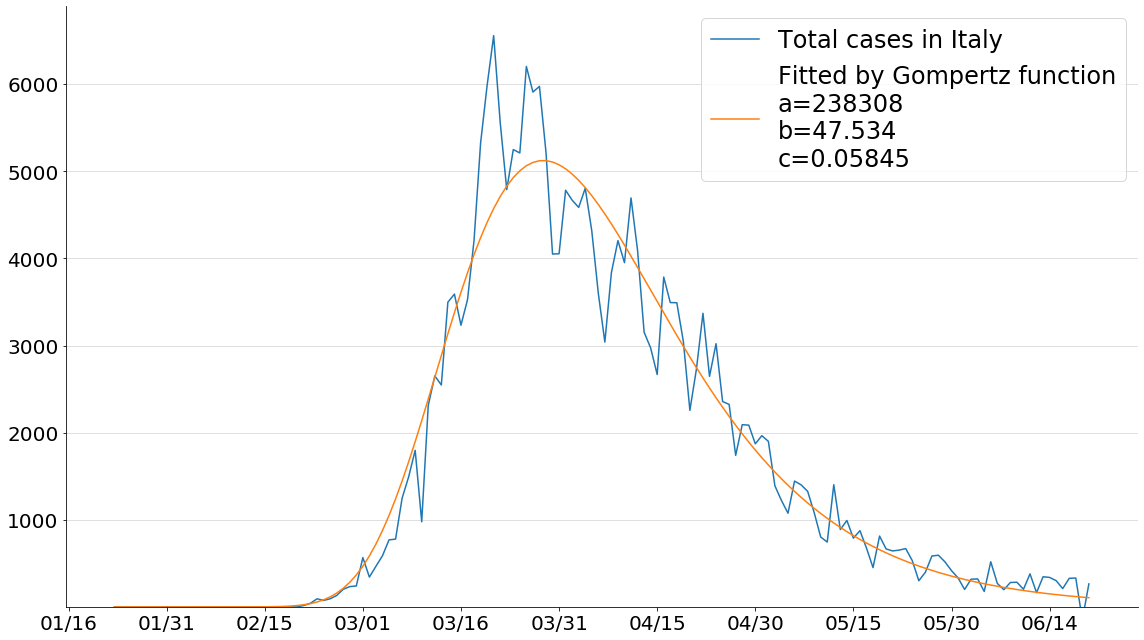

In [383]:
xdata = t.reset_index().index.tolist()
ydata = t.values

popt, pcov = curve_fit(gompertz, xdata, ydata)

k = pd.DataFrame(t)
k['fit'] = [gompertz(x, popt[0], popt[1], popt[2]) for x in xdata]
k.index = pd.to_datetime(k.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.plot(k[country].diff(), label='Total cases in %s'%country)
ax.plot(k['fit'].diff(), label='Fitted by Gompertz function\na=%s\nb=%s\nc=%s'%(int(popt[0]), np.round(popt[1], 3), np.round(popt[2], 6)))

ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=1)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
# ax.set_yscale('log')
plt.tight_layout()
# plt.savefig('figures/Daily_misc_Gompertz_%s.png'%country, dpi=100)

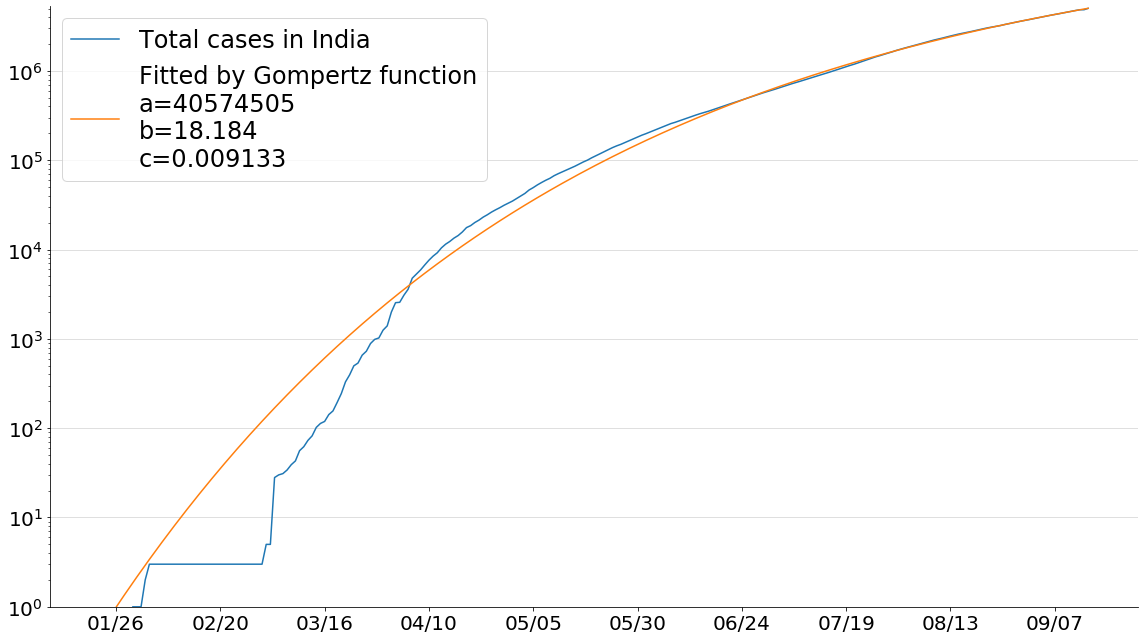

In [263]:
xdata = t.reset_index().index.tolist()
ydata = t.values

popt, pcov = curve_fit(gompertz, xdata, ydata)

k = pd.DataFrame(t)
k['fit'] = [gompertz(x, popt[0], popt[1], popt[2]) for x in xdata]
k.index = pd.to_datetime(k.index)

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))

ax.plot(k[country], label='Total cases in %s'%country)
ax.plot(k['fit'], label='Fitted by Gompertz function\na=%s\nb=%s\nc=%s'%(int(popt[0]), np.round(popt[1], 3), np.round(popt[2], 6)))

ax.legend(fontsize=24)
ax.grid(alpha=0.5, axis='y')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.set_ylim(bottom=1)
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('figures/Daily_misc_Gompertz_%s.png'%country, dpi=100)

# OWID testing data

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv')

test = df.pivot_table(index='Date', columns='Entity', values='Daily change in cumulative total').fillna(0)
test = test.drop(test.columns[['people' in i for i in test.columns]], axis=1).astype(int)
test.columns = [i.split(' -')[0] for i in test.columns]
test.index = pd.to_datetime(test.index)

new_case = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/ecdc/new_cases.csv').set_index('date')[1:]
new_case.index = pd.to_datetime(new_case.index)


In [11]:
test.columns

Index(['Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belarus',
       'Belgium', 'Bolivia', 'Bulgaria', 'Cape Verde', 'Chile', 'Colombia',
       'Cote d'Ivoire', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Dominican Republic',
       'El Salvador', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'Ghana',
       'Greece', 'Hungary', 'Iceland', 'India', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait',
       'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi',
       'Maldives', 'Malta', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia',
       'Nepal', 'New Zealand', 'Nigeria', 'North Macedonia', 'Oman',
       'Pakistan', 'Palestine', 'Panama', 'Paraguay', 'Peru', 'Poland',
       'Portugal', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal',
       'Slovakia', 'Slovenia', 'South Sudan', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Thailand', 'Togo', 'Tunisi

KeyError: 'Serbia'

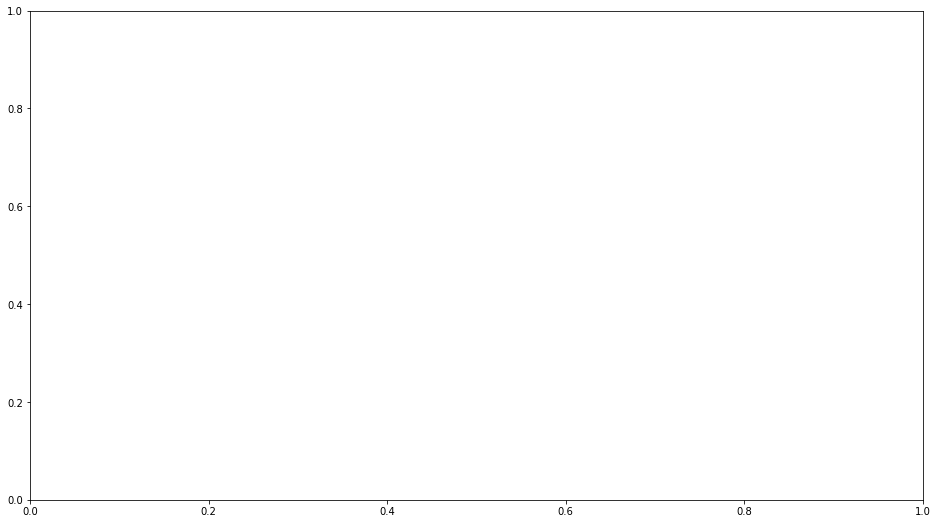

In [142]:
country = 'Serbia'

fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16,9))
ax.plot((new_case[country] / test[country]*100).rolling(window=7, min_periods=1, center=True).mean()[-150:-1], label='Testing positive rate in %s'%country)
ax.plot((new_case[country] / test[country]*100)[-150:], 'o', c='C0', alpha=0.3)
# ax.plot()
ax.legend(fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax.grid(axis='y')
ax.set_ylim(top=40)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# plt.savefig('figures/Daily_misc_12_15.png', dpi=100)

# Alpha_peak

In [512]:
df = pd.read_csv('data/alpha_peak.csv').set_index('Unnamed: 0')

In [514]:
df['peak']/df['pop']

Unnamed: 0
Germany        69.975904
Greece         10.280374
France         57.641791
Australia      16.600000
Russia         73.584775
Ireland        44.693878
Netherlands    42.543353
dtype: float64

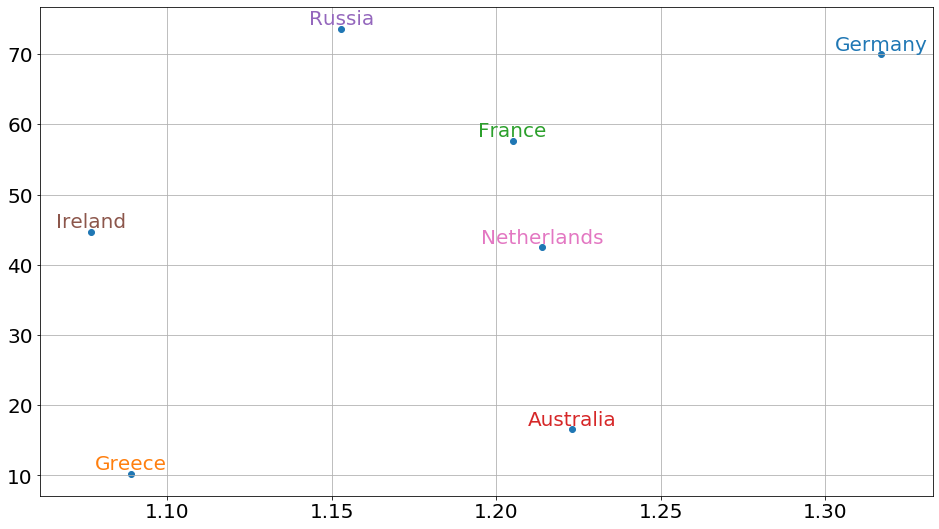

In [519]:
fig, ax = plt.subplots(figsize=(16,9))

ax.scatter(x=df['alpha'], y=(df['peak']/df['pop']))

for i in range(len(df)):
    ax.annotate(df.index[i], (df['alpha'][i], (df['peak']/df['pop'])[i]), va='bottom', ha='center', fontsize=20, c='C'+str(i))
    
ax.tick_params(labelsize=20)
ax.grid()

In [730]:
df = pd.read_csv('data/case_gdp.csv')
df = df[df['GDP Q2'].notnull()].reset_index()
df.columns

Index(['index', 'Country/Other', '#', 'Total Cases', 'Total Deaths',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Population',
       'GDP Q2', 'GDP Q3'],
      dtype='object')

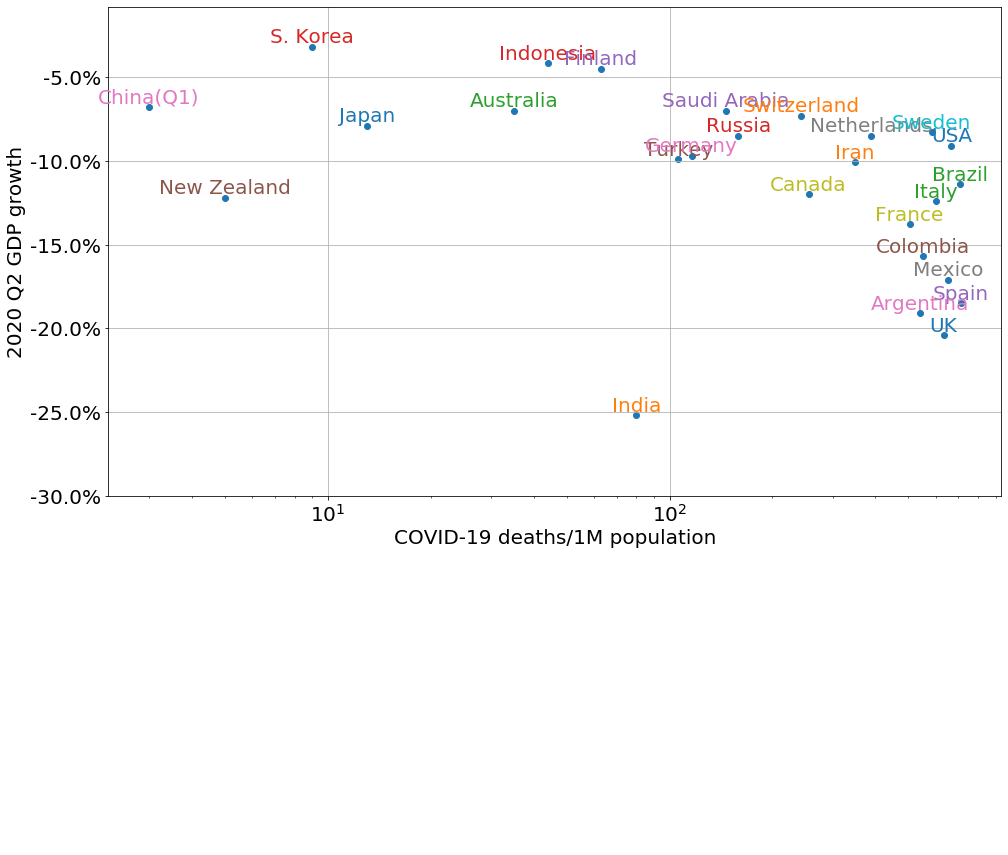

In [741]:
fig, ax = plt.subplots(figsize=(16,9))

v1 = df['Deaths/ 1M pop']
v2 = df['GDP Q2']
ax.scatter(x=v1, y=v2)

for i in range(len(df)):
    ax.annotate(df.replace('China','China(Q1)')['Country/Other'][i], (v1[i], v2[i]), va='bottom', ha='center', fontsize=20, c='C'+str(i))
    
ax.set_xlabel('COVID-19 deaths/1M population', fontsize=20)
ax.set_ylabel('2020 Q2 GDP growth', fontsize=20)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.tick_params(labelsize=20)
ax.set_xscale('log')
ax.set_ylim(bottom=-30)
ax.grid()
plt.savefig('figures/daily_misc_10_30c.png' , dpi=600)

# CFR by age simulation

In [303]:
df = pd.read_csv('data/pure population 60 yrs.csv',index_col='Country Name')
df

level_1  Population ages 00-04, female (% of female population)  \
Country Name                                                                    
Afghanistan    1960.0                                           8.457706        
Afghanistan    1961.0                                           8.674259        
Afghanistan    1962.0                                           8.754564        
Afghanistan    1963.0                                           8.748994        
Afghanistan    1964.0                                           8.732795        
...               ...                                                ...        
Zimbabwe       2014.0                                           8.190695        
Zimbabwe       2015.0                                           8.135115        
Zimbabwe       2016.0                                           8.087403        
Zimbabwe       2017.0                                           7.877043        
Zimbabwe       2018.0                                           7.569563        

              Population ages 00-04, male (% of male population)  \
Country Name                                                       
Afghanistan                                            8.674812    
Afghanistan                                            8.815064    
Afghanistan                                            8.888073    
Afghanistan                                            8.925581    
Afghanistan                                            8.958865    
...                                                         ...    
Zimbabwe                                               8.267903    
Zimbabwe                                               8.215566    
Zimbabwe                                               8.157736    
Zimbabwe                                               7.945662    
Zimbabwe                                               7.642055    

              Population ages 05-09, female (% of female population)  \
Country Name                                                           
Afghanistan                                            6.490554        
Afghanistan                                            6.486996        
Afghanistan                                            6.541419        
Afghanistan                                            6.631958        
Afghanistan                                            6.717797        
...                                                         ...        
Zimbabwe                                               6.933636        
Zimbabwe                                               7.014521        
Zimbabwe                                               7.092495        
Zimbabwe                                               7.196986        
Zimbabwe                                               7.310131        

              Population ages 05-09, male (% of male population)  \
Country Name                                                       
Afghanistan                                            6.654698    
Afghanistan                                            6.732617    
Afghanistan                                            6.817526    
Afghanistan                                            6.890980    
Afghanistan                                            6.938613    
...                                                         ...    
Zimbabwe                                               6.964298    
Zimbabwe                                               7.061030    
Zimbabwe                                               7.137804    
Zimbabwe                                               7.244926    
Zimbabwe                                               7.362496    

              Population ages 10-14, female (% of female population)  \
Country Name                                                           
Afghanistan                                            6.048638        
Afghanistan                          

In [324]:
age = np.append(df.T['Italy'].T.iloc[-1].values[1:], [0,0]).reshape(-1,4).sum(axis=1) / 100

# China
cfr_age = np.array([0, 0.18, 0.32, 0.32, 0.32, 1.3, 3.6, 8, 14.8])
# Italy
cfr_age = np.array([0, 0, 0, 0.26, 0.55, 1.23, 4.02, 11.86, 18.5])
# artificial
# cfr_age = np.array([0,0,0,0,0,0,0,0,10])

In [325]:
# averaged
k = np.dot(cfr_age, age)
cfr_age = np.ones(9) * k

In [329]:
sample = np.random.choice(a=cfr_age, size=1000, p=age) / 100
cfrs = []

for _ in range(10000):
    check = np.random.random(size=len(sample))
    cfr = (sample > check).sum() / len(sample)
    cfrs.append(cfr)
    
cfrs = np.array(cfrs)

In [381]:
cfrs.mean().round(6)

0.09764

In [382]:
cfrs.std().round(6)

0.000992

In [386]:
age = np.ones(9) * 1/9
# age = np.array([0,0,0,0,0,0,0,0.5,0.5])
# age = np.array([0,0,0,0.99,0,0,0,0,0.01])

# cfr_age = np.array([0, 0, 0, 0, 0, 0, 0, 0, 90])
cfr_age = np.array(([10, 10, 10, 10, 10, 10, 10, 10, 10]))

In [383]:
sample = np.random.choice(a=cfr_age, size=100, p=age) / 100
cfrs = []

for _ in range(10000):
    check = np.random.random(size=len(sample))
    cfr = (sample >= check).sum() / len(sample)
    cfrs.append(cfr)
    
cfrs = np.array(cfrs)

In [406]:
t = []
for _ in range(100):
    sample = np.random.choice(a=cfr_age, size=100, p=age) / 100
    check = np.random.random(size=len(sample))
    t.append((sample >= check).sum())
t = np.array(t)

In [409]:
t.std()

2.8421646679951538

# US share

Global cases (total) by country fetched for 11-05
Global deaths (total) by country fetched for 11-05
Global recovers (total) by country fetched for 11-05


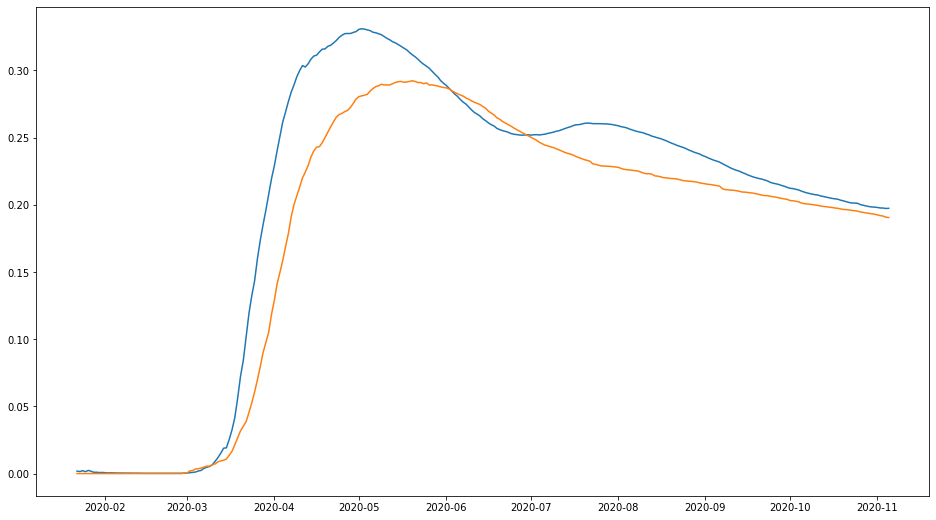

In [908]:
confirm = get_global_cases_total()
death = get_global_deaths_total()
recover = get_global_recovers_total()

t1 = confirm['US'] / confirm['Global']
t2 = death['US'] / death['Global']

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(t1)
ax.plot(t2)

# Global CFR by time

In [8]:
confirm = get_global_cases_total()
death = get_global_deaths_total()

Global cases (total) by country fetched for 12-10
Global deaths (total) by country fetched for 12-10


In [9]:
# only count those with 100+ deaths
cfrs = (death[death>100] / confirm).unstack()
cfrs = cfrs[~np.isnan(cfrs)]

In [10]:
peak_filter = confirm.columns[confirm.diff().idxmax() < pd.to_datetime('2020-10-14')]

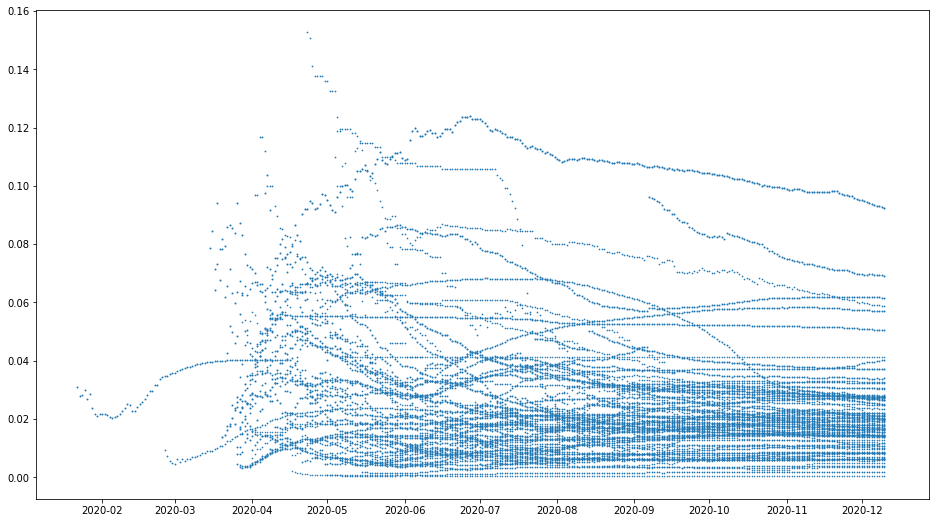

In [11]:
t = (death[death>10].dropna(axis=1, how='all') / confirm).dropna(axis=1, how='all').drop('Yemen', axis=1)
t = t[[i for i in t.columns if i in peak_filter]]

fig, ax = plt.subplots(figsize=(16,9))
for country in t.columns:
    ax.scatter(x=t.index, y=t[country], c='C0', s=np.log(death[country][-1]) / 10)
#     ax.plot(t[country], c='C'+str(int(np.log(death[country][-1]))))
    
# ax.set_yscale('log')

In [12]:
t.T.sort_values(t.index[-1], ascending=False).T.iloc[:,:15]

Country/Region    Mexico   Ecuador   Bolivia      Chad     Egypt     China  \
Global                                                                       
2020-01-22           NaN       NaN       NaN       NaN       NaN  0.031022   
2020-01-23           NaN       NaN       NaN       NaN       NaN  0.027994   
2020-01-24           NaN       NaN       NaN       NaN       NaN  0.028261   
2020-01-25           NaN       NaN       NaN       NaN       NaN  0.029872   
2020-01-26           NaN       NaN       NaN       NaN       NaN  0.026988   
...                  ...       ...       ...       ...       ...       ...   
2020-12-06      0.093309  0.069587  0.061796  0.059130  0.057172  0.050718   
2020-12-07      0.093106  0.069510  0.061768  0.059028  0.057132  0.050667   
2020-12-08      0.092917  0.069403  0.061723  0.058994  0.057117  0.050607   
2020-12-09      0.092642  0.069338  0.061646  0.058891  0.057075  0.050566   
2020-12-10      0.092288  0.069119  0.061536  0.058654  0.057047  0.050497   

Country/Region  Tanzania  Afghanistan      Peru  Guatemala    Gambia  \
Global                                                                 
2020-01-22           NaN          NaN       NaN        NaN       NaN   
2020-01-23           NaN          NaN       NaN        NaN       NaN   
2020-01-24           NaN          NaN       NaN        NaN       NaN   
2020-01-25           NaN          NaN       NaN        NaN       NaN   
2020-01-26           NaN          NaN       NaN        NaN       NaN   
...                  ...          ...       ...        ...       ...   
2020-12-06      0.041257     0.039614  0.037248   0.033851  0.032626   
2020-12-07      0.041257     0.039987  0.037246   0.034009  0.032626   
2020-12-08      0.041257     0.039945  0.037246   0.033889  0.032574   
2020-12-09      0.041257     0.040104  0.037272   0.033911  0.032574   
2020-12-10      0.041257     0.040268  0.037278   0.034002  0.032566   

Country/Region  Australia    Malawi  Sierra Leone   Ireland  
Global                                                       
2020-01-22            NaN       NaN           NaN       NaN  
2020-01-23            NaN       NaN           NaN       NaN  
2020-01-24            NaN       NaN           NaN       NaN  
2020-01-25            NaN       NaN           NaN       NaN  
2020-01-26            NaN       NaN           NaN       NaN  
...                   ...       ...           ...       ...  
2020-12-06       0.032461  0.030573      0.030503  0.028271  
2020-12-07       0.032444  0.030573      0.030478  0.028187  
2020-12-08       0.032437  0.030739      0.030478  0.028079  
2020-12-09       0.032429  0.030739      0.030403  0.028064  
2020-12-10       0.032416  0.030739      0.030390  0.028150  

[324 rows x 15 columns]

In [13]:
y_filter = ['Afghanistan','Antigua and Barbuda', 'Argentina','Australia','Bahamas','Bahrain','Bangladesh','Barbados','Bennin','Bhutan',
           'Bolivia','Botswana','Brazil','Burkina Faso', 'Burma', 'Burundi','Cabo Verde','Cambodia','Cameroon', ]

In [14]:
def get_continent(country):
    if country in europe:
        return 0
    elif country in america:
        return 1
    elif country in asia:
        return 2
    elif country in africa:
        return 3
    elif country in middle_east:
        return 4
    elif country in ['Australia', 'New Zealand']:
        return 5
    else:
        return 6
    
for i in t.columns:
    print(i,'----', ['europe','america','asia','africa','middle east','oceania','???????'][get_continent(i)])

Afghanistan ---- asia
Andorra ---- europe
Australia ---- oceania
Bahamas ---- america
Bahrain ---- asia
Bangladesh ---- asia
Benin ---- africa
Bolivia ---- america
Brazil ---- america
Burkina Faso ---- africa
Burma ---- asia
Cabo Verde ---- africa
Cameroon ---- africa
Central African Republic ---- africa
Chad ---- africa
Chile ---- america
China ---- asia
Colombia ---- america
Congo (Brazzaville) ---- africa
Congo (Kinshasa) ---- africa
Cote d'Ivoire ---- africa
Diamond Princess ---- ???????
Djibouti ---- africa
Dominican Republic ---- america
Ecuador ---- america
Egypt ---- middle east
Equatorial Guinea ---- africa
Eswatini ---- africa
Ethiopia ---- africa
Gabon ---- africa
Gambia ---- africa
Ghana ---- africa
Guatemala ---- america
Guinea ---- africa
Guinea-Bissau ---- africa
Guyana ---- america
Haiti ---- america
Iceland ---- europe
India ---- asia
Iraq ---- asia
Ireland ---- europe
Israel ---- asia
Jamaica ---- america
Kazakhstan ---- europe
Korea, South ---- asia
Kuwait ---- asia


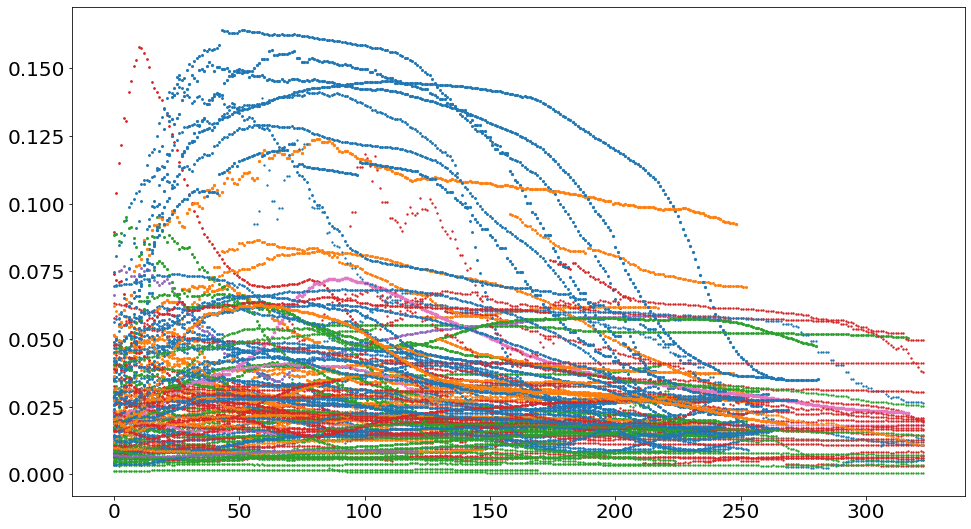

In [15]:
t = (death[death>10].dropna(axis=1, how='all') / confirm).dropna(axis=1, how='all').drop('Yemen', axis=1)
# t = t[[i for i in t.columns if i in peak_filter]]

fig, ax = plt.subplots(figsize=(16,9))
for country in t.columns:
    ax.scatter(x=np.arange(t.shape[0]-np.argmax(death[country]>100)), y=t[country][np.argmax(death[country]>100):], c='C'+str(get_continent(country)), s=np.power(death[country][-1], 1/7))
#     ax.plot(t[country][np.argmax(death[country]>100):].values, c='C'+str(int(np.log(death[country][-1]))))

ax.tick_params(labelsize=20)

0.020746757928756007


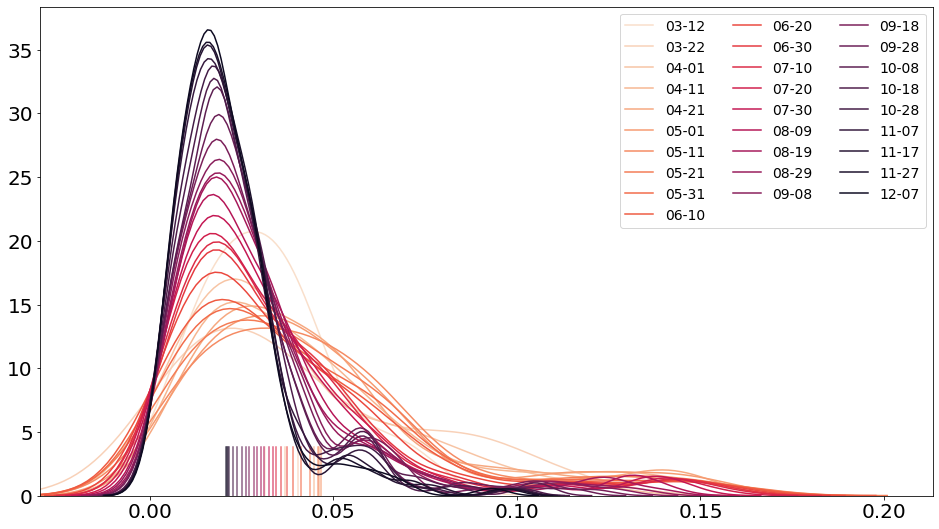

In [17]:
fig, ax = plt.subplots(figsize=(16,9))
# sns.set()


k=-1
total = len(t.index[50::10])
for i in t.index[50::10]:
    k += 1
    sns.kdeplot(t.loc[i].dropna().values, ax=ax, color=sns.color_palette("rocket", total)[total-1-k], label=i.strftime('%m-%d'))
    ax.axvline(x=t.loc[i].dropna().mean(), ymin=0, ymax=.1, color=sns.color_palette("rocket", total)[total-1-k], alpha=0.7)
ax.tick_params(labelsize=20)
ax.legend(fontsize=14, ncol=3)
ax.set_xlim(left=-0.03)
print(t.loc[i].dropna().mean())

In [141]:
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
focus = df.copy().drop(['Lat','Long'], axis=1).set_index(['Country/Region','Province/State'])
confirm = focus.groupby('Country/Region').sum()

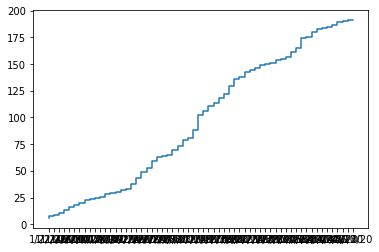

In [142]:
s = (confirm.T>0).idxmax().sort_values()
s1 = s.value_counts().sort_index().cumsum()

plt.step(s1.index, s1.values)

# Victoria timeline

In [171]:
df = get_Australia()
df.index = pd.to_datetime(df.index)
t = df['VIC'][80:]

Australia cases by state fetched for 2020-11-13


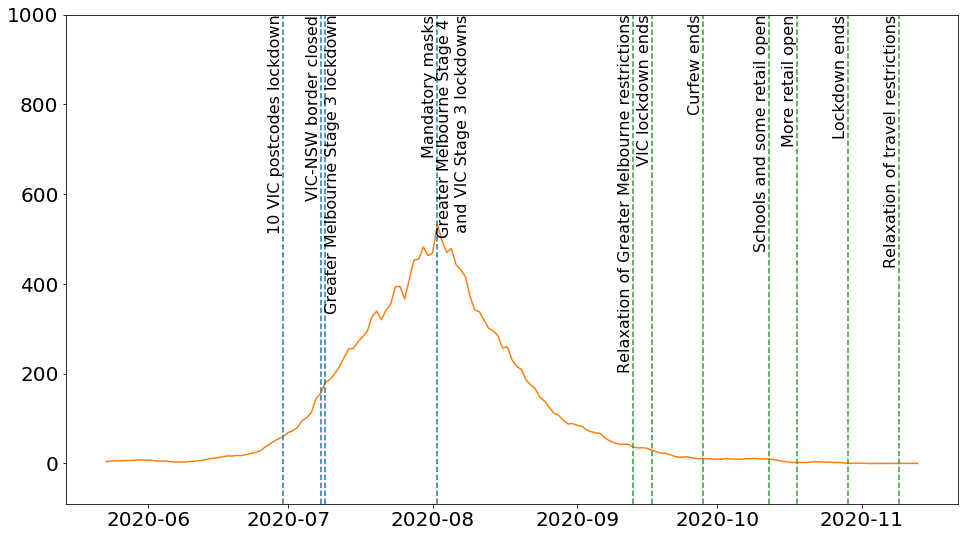

In [204]:
fig, ax = plt.subplots(figsize=(16,9))
ymax=1000
text_size=16

ax.plot(t.rolling(window=7, min_periods=1, center=True).mean(), c='C1')

ax.axvline(x=pd.to_datetime('2020-06-30'), ls='--',)
ax.text(x=pd.to_datetime('2020-06-30'), y=ymax, s='10 VIC postcodes lockdown', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-07-08'), ls='--',)
ax.text(x=pd.to_datetime('2020-07-08'), y=ymax, s='VIC-NSW border closed', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-07-09'), ls='--',)
ax.text(x=pd.to_datetime('2020-07-09'), y=ymax, s='Greater Melbourne Stage 3 lockdown', rotation=90, ha='left', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-08-02'), ls='--',)
ax.text(x=pd.to_datetime('2020-08-02'), y=ymax, s='Mandatory masks', rotation=90, ha='right', va='top', fontsize=text_size)
ax.text(x=pd.to_datetime('2020-08-02'), y=ymax, s='Greater Melbourne Stage 4\n and VIC Stage 3 lockdowns', rotation=90, ha='left', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-09-13'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-09-13'), y=ymax, s='Relaxation of Greater Melbourne restrictions', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-09-17'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-09-17'), y=ymax, s='VIC lockdown ends', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-09-28'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-09-28'), y=ymax, s='Curfew ends', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-10-12'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-10-12'), y=ymax, s='Schools and some retail open', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-10-18'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-10-18'), y=ymax, s='More retail open', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-10-29'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-10-29'), y=ymax, s='Lockdown ends', rotation=90, ha='right', va='top', fontsize=text_size)

ax.axvline(x=pd.to_datetime('2020-11-09'), ls='--',c='C2')
ax.text(x=pd.to_datetime('2020-11-09'), y=ymax, s='Relaxation of travel restrictions', rotation=90, ha='right', va='top', fontsize=text_size)


ax.set_ylim(bottom=-90, top=ymax)
ax.tick_params(labelsize=20)

# European time line

In [287]:
focus = get_global_cases_total().diff()[europe].fillna(0).astype(int)[-90:]
focus.index = pd.to_datetime(focus.index)

Global cases (total) by country fetched for 11-21


In [298]:
def plot_country(country, lockdown, color, focus=focus, ax=ax, text_size=text_size, window=7):
    lockdown = pd.to_datetime(lockdown)
    idx = focus.index.get_loc(lockdown)
    ax.plot(focus.index[:idx+1], focus[country].rolling(window=window, min_periods=1, center=True).mean()[:idx+1], c=color)
    ax.plot(focus.index[idx:], focus[country].rolling(window=window, min_periods=1, center=True).mean()[idx:], ':', c=color)
    ax.annotate(country, xy=(focus.index[-1], focus[country].rolling(window=window, min_periods=1, center=True).mean()[-1]), va='center', fontsize=text_size, c=color)


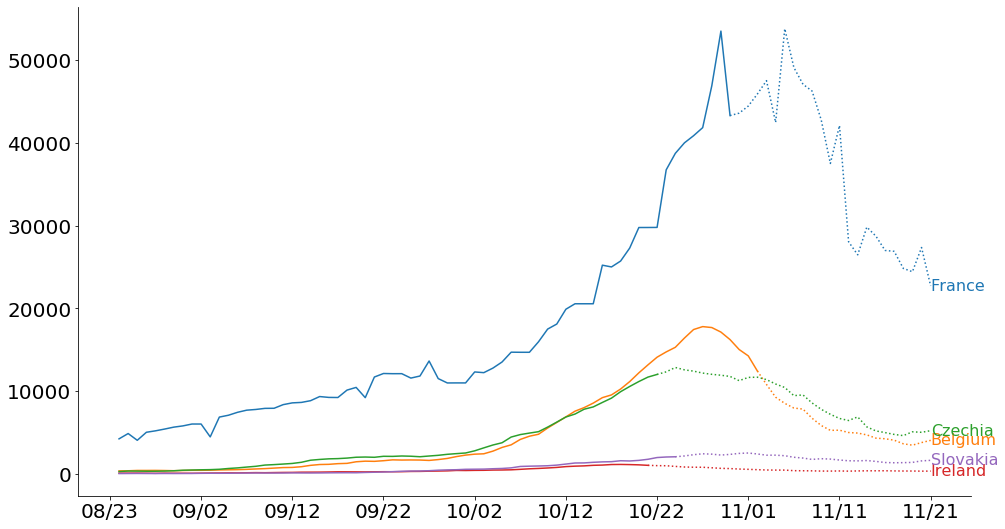

In [303]:
fig, ax = plt.subplots(figsize=(16,9))
ymax=1000
text_size=16

plot_country('France', '2020-10-30', 'C0', ax=ax)
plot_country('Belgium', '2020-11-02', 'C1', ax=ax)
plot_country('Ireland', '2020-10-21', 'C3', ax=ax)
plot_country('Czechia', '2020-10-22', 'C2', ax=ax)
plot_country('Slovakia', '2020-10-24', 'C4', ax=ax)

# ax.set_yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax.xaxis.set_major_locator(plt.MaxNLocator(12))

# Positivity and CFR

In [422]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df.date = pd.to_datetime(df.date,yearfirst=True, format='%Y%m%d')

In [429]:
df.columns

Index(['date', 'state', 'positive', 'probableCases', 'negative', 'pending',
       'totalTestResultsSource', 'totalTestResults', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'inIcuCurrently', 'inIcuCumulative',
       'onVentilatorCurrently', 'onVentilatorCumulative', 'recovered',
       'dataQualityGrade', 'lastUpdateEt', 'dateModified', 'checkTimeEt',
       'death', 'hospitalized', 'dateChecked', 'totalTestsViral',
       'positiveTestsViral', 'negativeTestsViral', 'positiveCasesViral',
       'deathConfirmed', 'deathProbable', 'totalTestEncountersViral',
       'totalTestsPeopleViral', 'totalTestsAntibody', 'positiveTestsAntibody',
       'negativeTestsAntibody', 'totalTestsPeopleAntibody',
       'positiveTestsPeopleAntibody', 'negativeTestsPeopleAntibody',
       'totalTestsPeopleAntigen', 'positiveTestsPeopleAntigen',
       'totalTestsAntigen', 'positiveTestsAntigen', 'fips', 'positiveIncrease',
       'negativeIncrease', 'total', 'totalTestResultsIncrease', 'posNe

In [447]:
focus = df[df['state']=='CA'].set_index('date').sort_index()

a = focus['positiveIncrease']/ focus['totalTestResultsIncrease']*100
b = focus['deathIncrease'] / focus['positiveIncrease'] * 100
a_alpha = pd.Series(index=a.index, data=np.linspace(start=0.2, stop=1, num=len(a)))

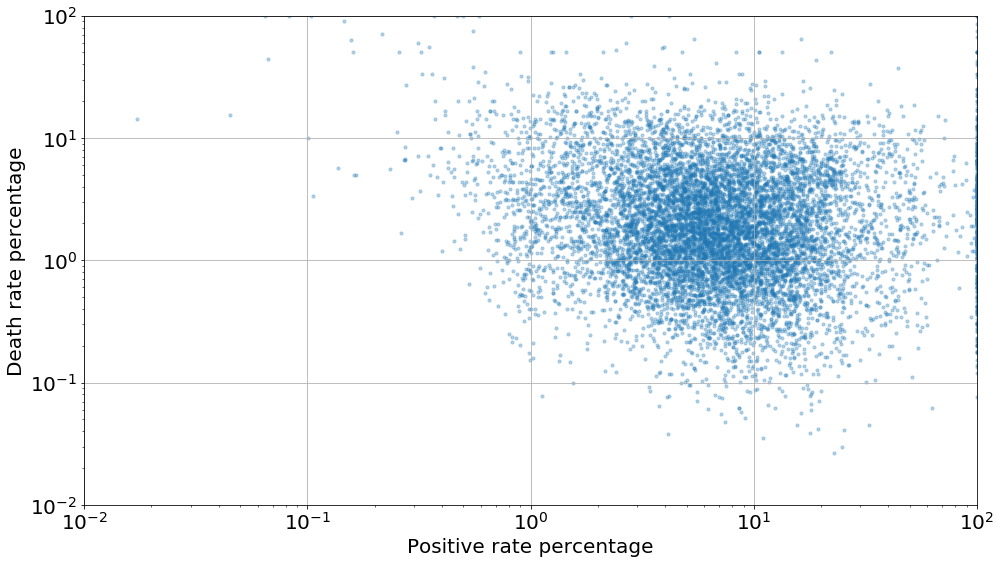

In [471]:
fig, ax = plt.subplots(figsize=(16,9))

for state in df['state'].unique():
    focus = df[df['state']==state].set_index('date').sort_index()
    a = (focus['positiveIncrease']/ focus['totalTestResultsIncrease']*100)
    b = focus['deathIncrease'] / focus['positiveIncrease'] * 100

    ax.scatter(x=a.values, y=b.values, c='C0', alpha=0.3, s=10)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=0.01,right=100)
ax.set_ylim(bottom=0.01,top=100)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

In [478]:
focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum()

date
2020-03-01     0.0
2020-03-02     0.0
2020-03-03     0.0
2020-03-04     0.0
2020-03-05     0.0
              ... 
2020-11-21    88.0
2020-11-22    71.0
2020-11-23    71.0
2020-11-24    71.0
2020-11-25    60.0
Name: deathIncrease, Length: 270, dtype: float64

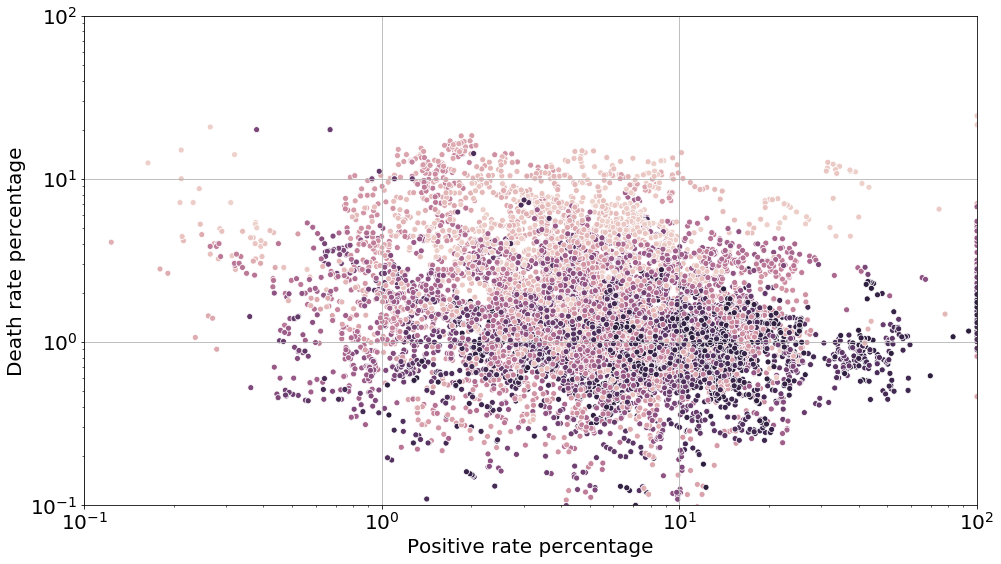

In [500]:
fig, ax = plt.subplots(figsize=(16,9))
window = 7
cutoff = 75

for state in df['state'].unique():
    focus = df[df['state']==state].set_index('date').sort_index()
    a = (focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum()/ focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).sum()*100)[75:]
    b = (focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum() / focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum() * 100)[75:]
    c = pd.DataFrame({'a':a, 'b':b, 'alpha':np.linspace(start=0.2, stop=1, num=len(a))})
    
    
#     ax.scatter(x = c.a, y=c.b, alpha=c.alpha)
    sns.scatterplot(data=c, x='a', y='b', hue='alpha')
    
# ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.get_legend().remove()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=0.1,right=100)
ax.set_ylim(bottom=0.1,top=100)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

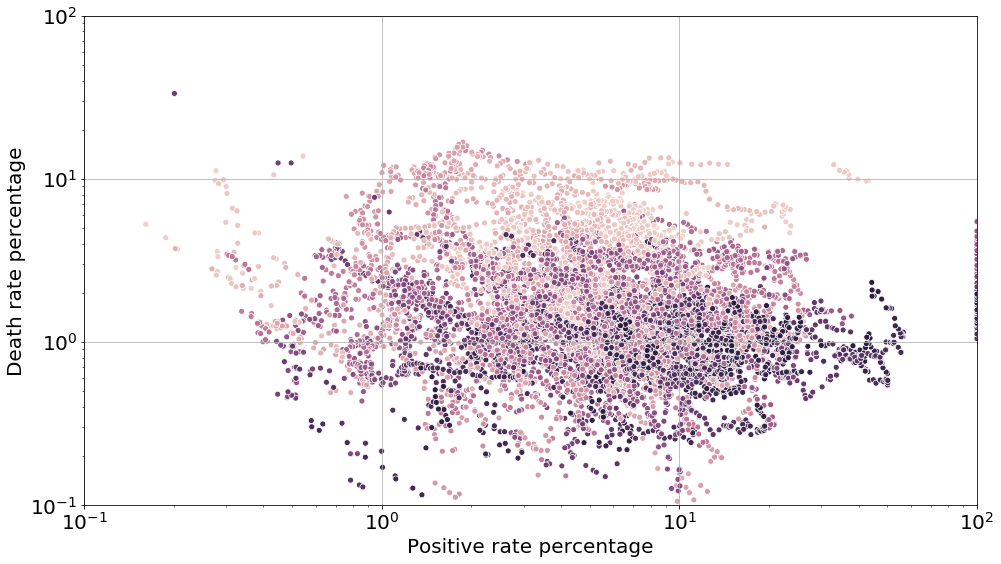

In [502]:
fig, ax = plt.subplots(figsize=(16,9))
window = 14
cutoff = 5

for state in df['state'].unique():
    focus = df[df['state']==state].set_index('date').sort_index()
    a = (focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum()/ focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).sum()*100)[75:]
    b = (focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum() / focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum() * 100)[75:]
    c = pd.DataFrame({'a':a, 'b':b, 'alpha':np.linspace(start=0.2, stop=1, num=len(a))})
    
    
#     ax.scatter(x = c.a, y=c.b, alpha=c.alpha)
    sns.scatterplot(data=c, x='a', y='b', hue='alpha', )
    
# ax.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
ax.get_legend().remove()

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(left=0.1,right=100)
ax.set_ylim(bottom=0.1,top=100)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

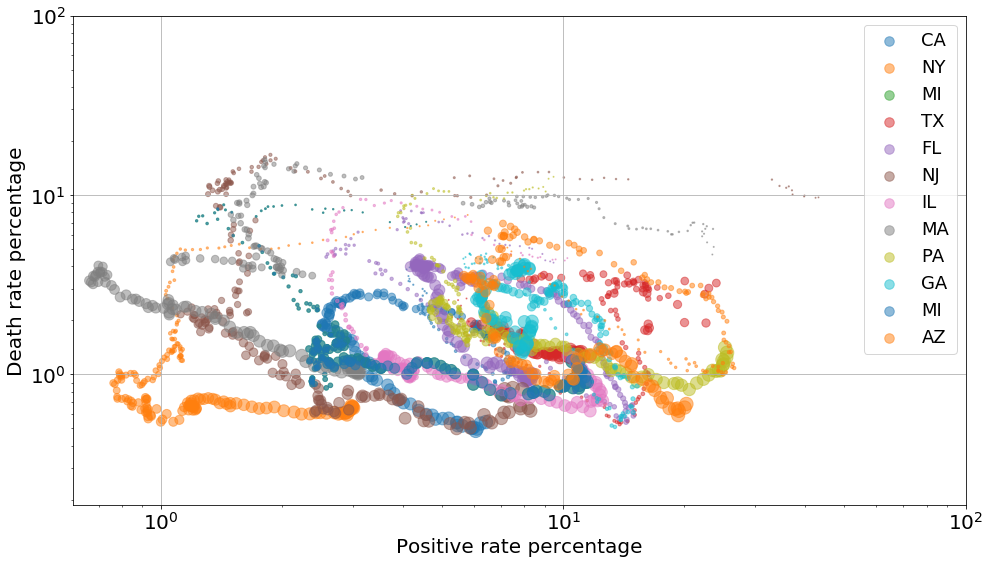

In [525]:
fig, ax = plt.subplots(figsize=(16,9))

# for state in df['state'].unique():
for state in ['CA','NY','MI','TX','FL','NJ','IL','MA','PA','GA','MI','AZ']:
    focus = df[df['state']==state].set_index('date').sort_index()
    a = (focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum()/ focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).sum()*100)[75:]
    b = (focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).sum() / focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).sum() * 100)[75:]
    c = pd.DataFrame({'a':a, 'b':b, 'alpha':np.power(np.linspace(start=1, stop=8, num=len(a)),2.5)})

    ax.scatter(x=c.a, y=c.b, alpha=0.5, s=c.alpha, label=state)
ax.legend(fontsize=18)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(right=100)
ax.set_ylim(top=100)
ax.grid()
ax.set_xlabel('Positive rate percentage', fontsize=20)
ax.set_ylabel('Death rate percentage', fontsize=20)
ax.tick_params(labelsize=20)

# Delayed CFR

In [541]:
confirm = get_global_cases_total()
death = get_global_deaths_total()
c = confirm.diff().fillna(0).astype(int)
d = death.diff().fillna(0).astype(int)

Global cases (total) by country fetched for 11-25
Global deaths (total) by country fetched for 11-25


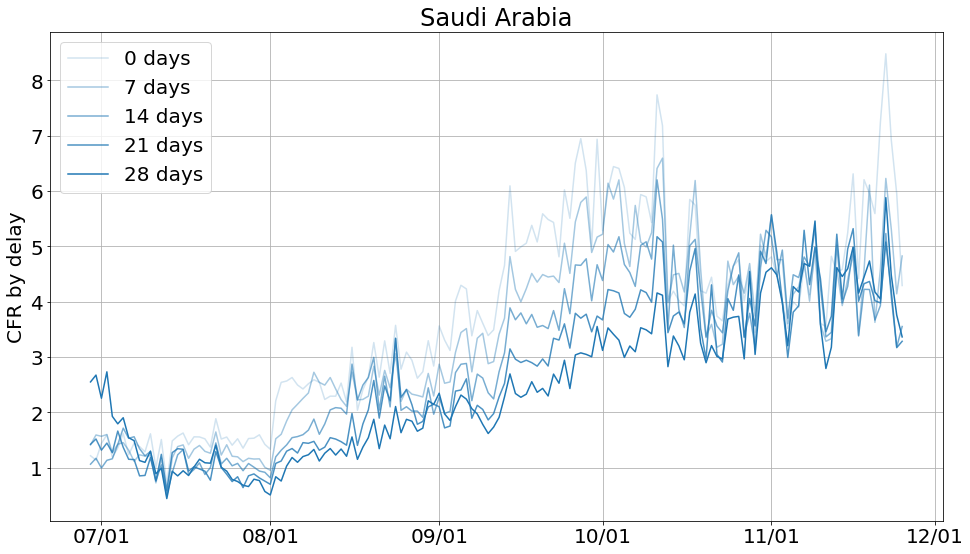

In [610]:
fig, ax = plt.subplots(figsize=(16,9))
country = 'Saudi Arabia'
cutoff = -150

for delay, alpha in zip([0,7,14,21,28],[0.2,0.4,0.6,0.8,1]):
    ax.plot(100*(d[country] / c[country].shift(delay))[cutoff:], c='C0', alpha=alpha, label=str(delay)+' days')
    
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('CFR by delay', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(country, fontsize=24)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

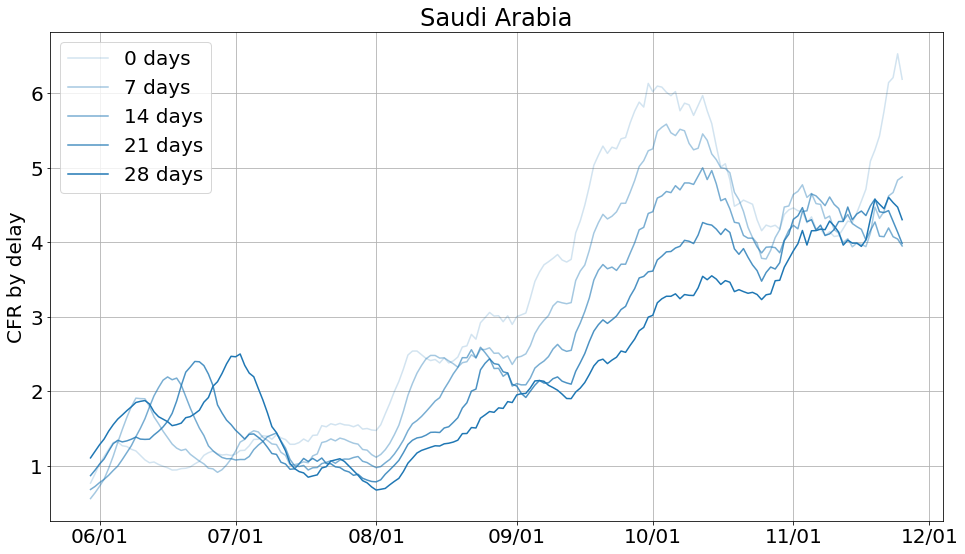

In [621]:
fig, ax = plt.subplots(figsize=(16,9))
country = 'Saudi Arabia'
cutoff = -180

for delay, alpha in zip([0,7,14,21,28],[0.2,0.4,0.6,0.8,1]):
    ax.plot((100*(death-death.shift(7))[country] / (confirm.shift(delay)-confirm.shift(delay+7))[country])[cutoff:], c='C0', alpha=alpha, label=str(delay)+' days')
    
    
ax.legend(fontsize=20)
ax.grid()
ax.set_ylabel('CFR by delay', fontsize=20)
ax.tick_params(labelsize=20)
ax.set_title(country, fontsize=24)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# US state CFR by dealy

In [673]:
c = get_US()
d = get_US_death()

US cases by state fetched for 2020-11-27
US deaths by state fetched for 2020-11-27


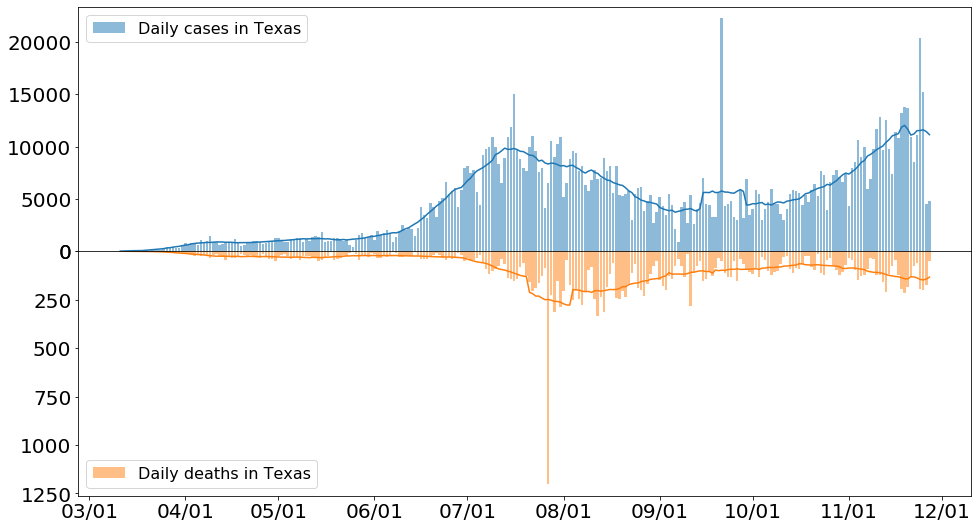

In [903]:
state = 'Texas'

fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)
cutoff = 50
axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())
axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean(), c='C1')
axs[1].invert_yaxis()
axs[0].set_ylim(bottom=0)
axs[1].set_ylim(top=0)

# axs[0].set_ylim(top=10000)
# axs[1].set_ylim(bottom=100)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

In [740]:
d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().idxmax() - c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().idxmax()

Timedelta('-108 days +00:00:00')

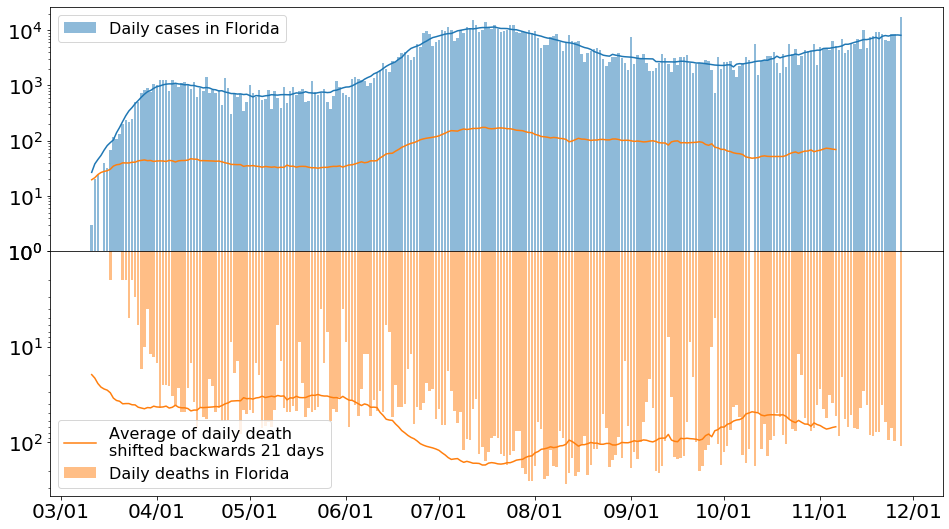

In [776]:
state = 'Florida'

fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)
cutoff = 50
axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())

axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].invert_yaxis()

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[1].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

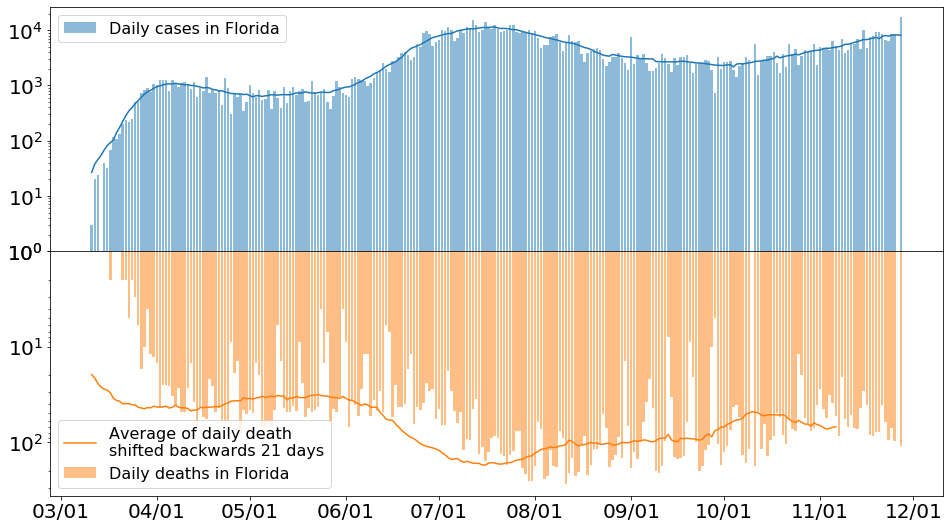

In [805]:
state = 'Florida'
cutoff = 50


fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())

axs[1].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[1].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].invert_yaxis()

axs[0].set_yscale('log')
axs[1].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[1].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[1].tick_params(labelsize=20)

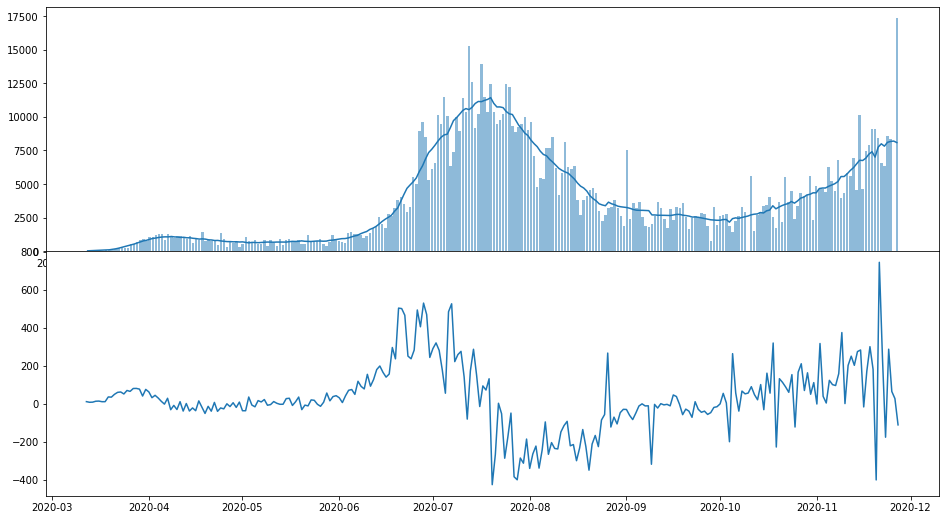

In [835]:
state = 'Florida'
cutoff = 50


fig, axs = plt.subplots(figsize=(16,9), nrows=2, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean())

# axs[1].plot(c[state][cutoff:].rolling(min_periods=1, window=13, center=True).mean())
# axs[1].plot(c[state][cutoff:].rolling(min_periods=1, window=10, center=True).mean())
# axs[1].plot(np.gradient(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()))
axs[1].plot(c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().diff())

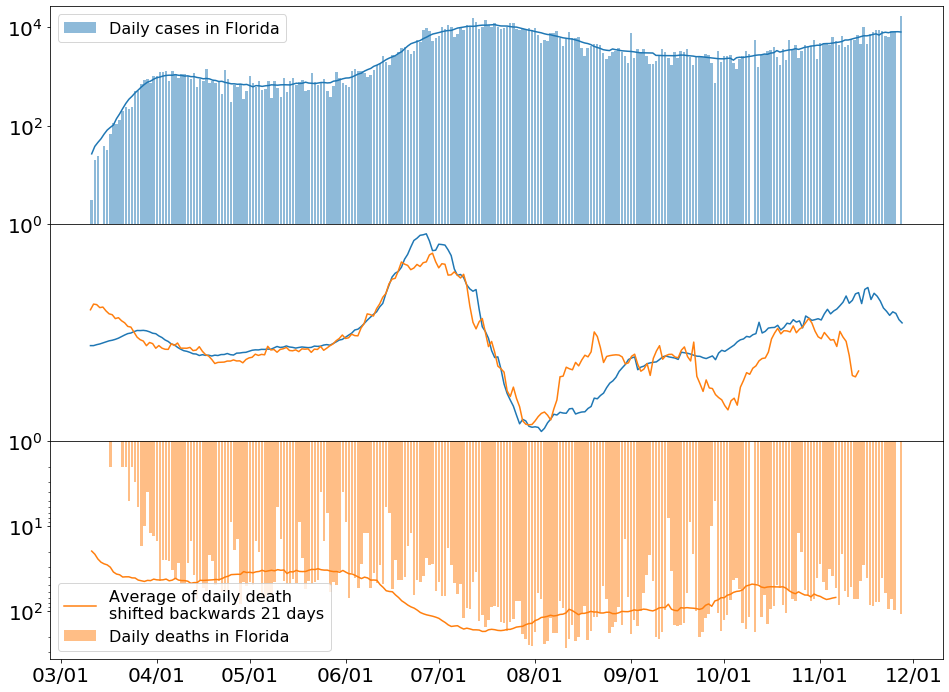

In [865]:
state = 'Florida'
cutoff = 50
window = 14
c_ = c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
d_ = d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
scale = c_.max()/d_.max()

fig, axs = plt.subplots(figsize=(16,12), nrows=3, ncols=1)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c_)

axs[2].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
shift=21
axs[2].plot(d_.shift(-shift), c='C1', label='Average of daily death\nshifted backwards %d days'%shift)
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].plot(c_.diff().rolling(min_periods=1, window=14, center=True).mean())
axs[1].plot(scale * d_.diff().shift(-shift).rolling(min_periods=1, window=14, center=True).mean())

axs[2].invert_yaxis()

axs[0].set_yscale('log')
axs[2].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[2].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[2].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)

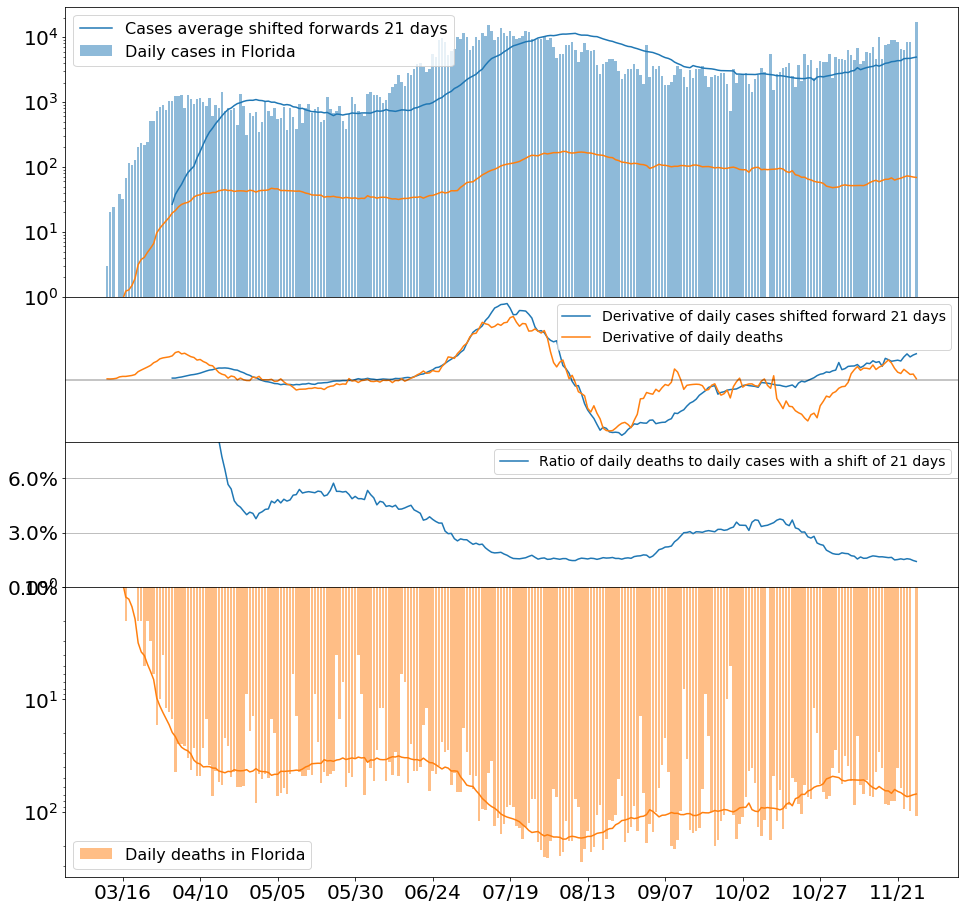

In [924]:
state = 'Florida'
cutoff = 50
window = 14
shift=21

c_ = c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
d_ = d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
scale = c_.max()/d_.max()

fig, axs = plt.subplots(figsize=(16,16), nrows=4, ncols=1, gridspec_kw={'height_ratios': [2,1,1,2]}, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c_.shift(shift), label='Cases average shifted forwards %d days'%shift, c='C0')
axs[0].plot(d_, c='C1', )

axs[3].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
axs[3].plot(d_, c='C1', )
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].plot(c_.diff().rolling(min_periods=1, window=14, center=True).mean().shift(shift), label='Derivative of daily cases shifted forward %d days'%shift)
axs[1].plot(scale * d_.diff().rolling(min_periods=1, window=14, center=True).mean(), label='Derivative of daily deaths')
axs[1].axhline(y=0, c='k', alpha=0.3)

axs[2].plot(100*d_/c_.shift(shift), label='Ratio of daily deaths to daily cases with a shift of %s days'%shift)
axs[2].set_ylim(top=8, bottom=0)
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].grid(axis='y')

axs[3].invert_yaxis()
axs[0].set_yscale('log')
axs[3].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[3].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=14)
axs[2].legend(fontsize=14)
axs[3].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[3].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)
axs[2].yaxis.set_major_locator(plt.MaxNLocator(3))
axs[3].tick_params(labelsize=20)

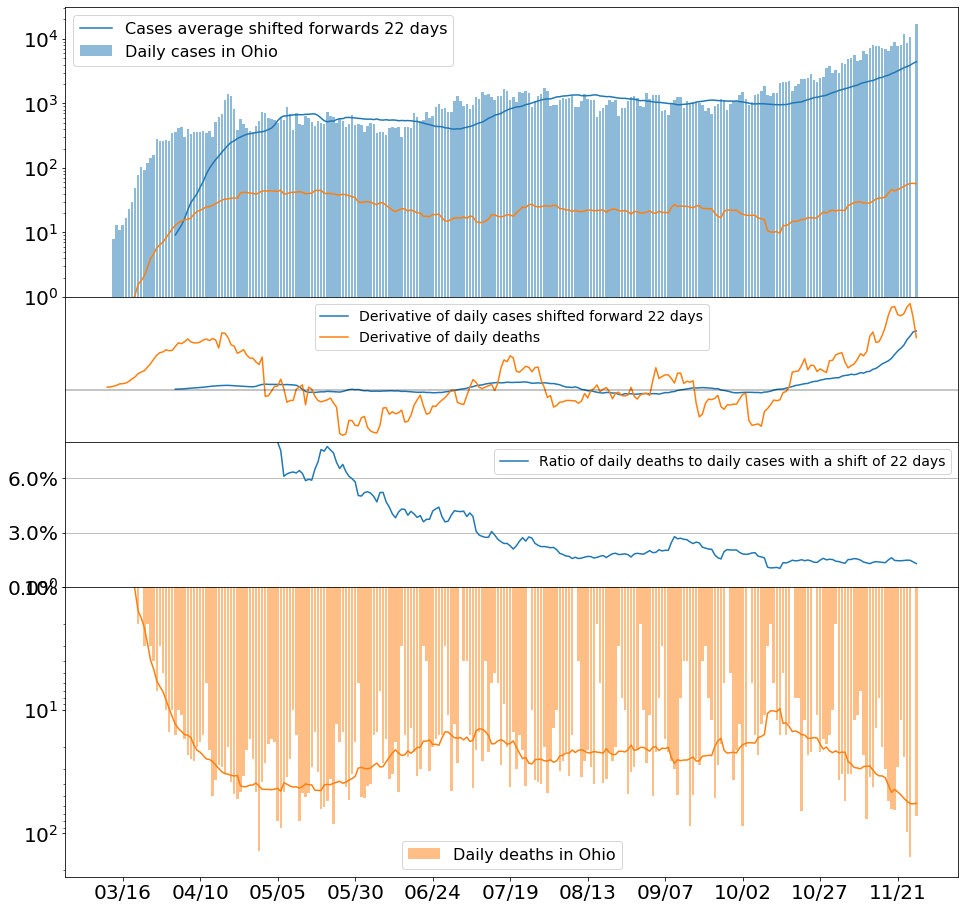

In [945]:
state = 'New Jersey'
cutoff = 50
window = 14
shift = 22

c_ = c[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
d_ = d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean()
scale = c_.max()/d_.max()

fig, axs = plt.subplots(figsize=(16,16), nrows=4, ncols=1, gridspec_kw={'height_ratios': [2,1,1,2]}, sharex=True)
plt.subplots_adjust(wspace=0, hspace=0)

axs[0].bar(x=c.index[cutoff:], height=c[state][cutoff:], label='Daily cases in %s'%state, alpha=0.5)
axs[0].plot(c_.shift(shift), label='Cases average shifted forwards %d days'%shift, c='C0')
axs[0].plot(d_, c='C1', )

axs[3].bar(x=d.index[cutoff:], height=d[state][cutoff:], color='C1', label='Daily deaths in %s'%state, alpha=0.5)
axs[3].plot(d_, c='C1', )
# axs[0].plot(d[state][cutoff:].rolling(min_periods=1, window=14, center=True).mean().shift(-shift), c='C1',)

axs[1].plot(c_.diff().rolling(min_periods=1, window=14, center=True).mean().shift(shift), label='Derivative of daily cases shifted forward %d days'%shift)
axs[1].plot(scale * d_.diff().rolling(min_periods=1, window=14, center=True).mean(), label='Derivative of daily deaths')
axs[1].axhline(y=0, c='k', alpha=0.3)

axs[2].plot(100*d_/c_.shift(shift), label='Ratio of daily deaths to daily cases with a shift of %s days'%shift)
axs[2].set_ylim(top=8, bottom=0)
axs[2].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[2].grid(axis='y')

axs[3].invert_yaxis()
axs[0].set_yscale('log')
axs[3].set_yscale('log')
axs[0].set_ylim(bottom=1)
axs[3].set_ylim(top=1)

# axs[0].set_ylim(top=15000)
# axs[1].set_ylim(bottom=400)

axs[0].legend(fontsize=16)
axs[1].legend(fontsize=14)
axs[2].legend(fontsize=14)
axs[3].legend(fontsize=16)
axs[0].set_xticks([])
axs[1].set_xticks([])
axs[1].set_yticks([])
axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
axs[3].xaxis.set_major_locator(plt.MaxNLocator(12))
axs[0].tick_params(labelsize=20)
axs[2].tick_params(labelsize=20)
axs[2].yaxis.set_major_locator(plt.MaxNLocator(3))
axs[3].tick_params(labelsize=20)

In [27]:
np.percentile(np.random.lognormal(mean=1.63, sigma=0.5, size=10000),90)

9.454652209124253